In [423]:
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

sns.set_theme()



sns.set(font_scale=1, rc={'text.usetex': True, 'text.latex.preamble': r"\usepackage{bm} \usepackage{amsmath}"})
# sns.set(rc={'text.usetex': True, 'text.latex.preamble': latex_preamble})

sns.set_style('whitegrid')
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

sns.set_context("poster")

%matplotlib inline



In [424]:
file_path = 'final_pandas_dataframes'

In [459]:
markers = ['o','s','^','d','*']
filepath = 'figures_paper/'

def load_pandas_df(file_path, file_name):
    file = file_path + '/' + file_name
    df = pd.read_pickle(file)
    
    return df
    
def filter_bound_2_3_out(df):
    
    df = df.astype({'depth': int, 'width': int, 'input_dim':int, 'output_dim':int})
    df.replace({'H_o_cond_bound1': 'upper bound', 'H_o_cond': r'$\kappa(\widehat{H}_O)$'}, inplace=True)
    df.replace({'sequential': 'FCNN', 'lin_residual_network': 'ResNet'}, inplace=True)

    df = df[df['type'] != 'H_o_cond_bound2']
    df = df[df['type'] != 'H_o_cond_bound3']
    return df

def filter_bound_3_out(df):
    
    df = df.astype({'width': int, 'input_dim':int, 'output_dim':int})
    df.replace({'H_o_cond_bound2': 'loose upper bound', 'H_o_cond_bound1': 'upper bound', 'H_o_cond': r'$\kappa(\widehat{H}_O)$'}, inplace=True)
    df.replace({'sequential': 'FCNN', 'lin_residual_network': 'ResNet'}, inplace=True)

#     df = df[df['type'] != 'H_o_cond_bound2']
    df = df[df['type'] != 'H_o_cond_bound3']
    return df

def filter_bound_1_out(df):
    
    df = df[df['type'] != 'upper bound']
    return df
        
def make_lineplot_BN_comparison(df, title, log_scale=False, filename=None, save=False):
    
    f = plt.figure(figsize=(8,5))
    
    g = sns.lineplot(df, x='width',y='H_o_cond', alpha=0.7, hue='batchnorm', style='batchnorm', markers=markers)
    g.set_xlabel('Width $m$')
    g.set_ylabel('$\kappa(\widehat{H}_O)$')
#     g.add_legend(title='') 

    g.set_title(title)
#     g.fig.subplots_adjust(top=0.90)

#     if log_scale:
#         g.set(yscale='log')
        
    if save==True:
        f.savefig(filepath+ filename + '.pdf', bbox_inches='tight')
    
    

#### Batch-norm figures

In [460]:
file_name = 'hessian_information_initialization_experiments_effect_of_w_BN_NOTwhitened_grayscale_cifar10_d=64_n=1000_linear_Net_num_init=5.pkl'
df_bn = load_pandas_df(file_path, file_name)
df_bn.insert(0,'batchnorm','BN')

In [461]:
file_name = 'hessian_information_initialization_experiments_effect_of_wo_BN_NOTwhitened_grayscale_cifar10_d=64_n=1000_linear_Net_num_init=5.pkl'
df_noBN = load_pandas_df(file_path, file_name)
df_noBN.insert(0,'batchnorm','no BN')

In [462]:
df_conc_BN = pd.concat([df_bn,df_noBN])
df_conc_BN

batchnorm  input_dim  output_dim  width  depth activ_f  epoch  H_cond  \
0         BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
1         BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
2         BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
3         BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
4         BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
5         BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
6         BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
7         BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
8         BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
9         BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
10        BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
11        BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
12        BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
13        BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
14        BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
15        BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
16        BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
17        BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
18        BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
19        BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
20        BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
21        BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
22        BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
23        BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
24        BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
0      no BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
1      no BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
2      no BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
3      no BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
4      no BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
5      no BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
6      no BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
7      no BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
8      no BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
9      no BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
10     no BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
11     no BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
12     no BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
13     no BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
14     no BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
15     no BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
16     no BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
17     no BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
18     no BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
19     no BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
20     no BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
21     no BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
22     no BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
23     no BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
24     no BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   

       H_o_cond  lam_abs_min_H  lam_abs_max_H  \
0    552.270808            NaN            NaN   
1    626.136118            N

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/3469982282.py:39: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(df, x='width',y='H_o_cond', alpha=0.7, hue='batchnorm', style='batchnorm', markers=markers)


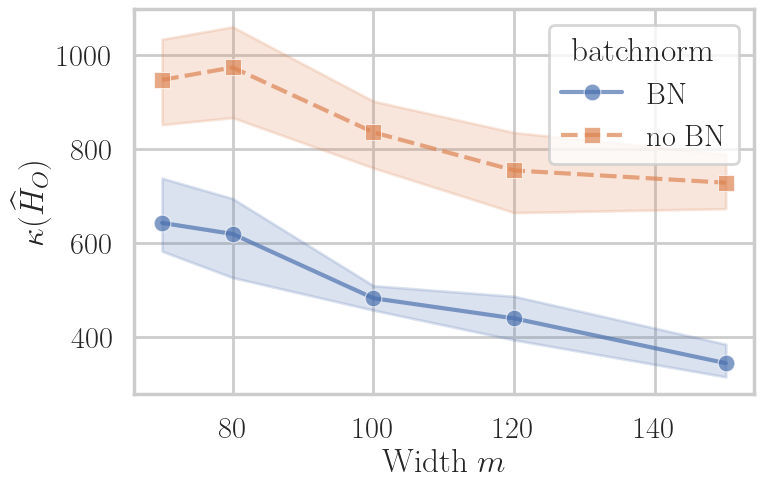

In [463]:
filename='BN_comparison_grayscale_cifar10_d=64_n=1000'
title=''

make_lineplot_BN_comparison(df_conc_BN,title,filename=filename,save=True)

### Linear networks
1. show whitened data improves conditioning: Cifar-10
2. show convex combination bound is better: MNIST, Cifar-10

3. Fixed width with depth: MNIST, Cifar-10
4. Width proportional with depth: smaller constant: MNIST
5. Width proportional with depth: larger constant: MNIST

##### 1. show whitened data improves conditioning: Cifar-10

In [464]:
def whitenend_vs_not_whitened_relplot(df,sigma,filename=None,save=False):
    g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='normalization', style='normalization', style_order=['whitened','not whitened'], markers=markers)
    g.set(yscale='log')

    g.set_axis_labels('Depth $L$','$\kappa(\widehat{H}_O)$')

    g.set_titles('Width: {col_name}')

    g.fig.suptitle('whitened: $\kappa(\Sigma)=1.0$, not whitened: $\kappa(\Sigma) = %.2e$' % sigma)
    g.fig.subplots_adjust(top=0.8)
    
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.45, -0.1), ncol=3, title=None, frameon=True)



    if save==True:
        g.savefig(filepath+ filename + '.pdf')


In [465]:
filename='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_NOTwhitened_LinNet_num_init=3.pkl'
filename2='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_LinNet_num_init=3.pkl'

df_NOTwhitened = load_pandas_df(file_path, filename)
df_NOTwhitened= filter_bound_2_3_out(df_NOTwhitened)
df_NOTwhitened = filter_bound_1_out(df_NOTwhitened)

df_whitened = load_pandas_df(file_path, filename2)
df_whitened= filter_bound_2_3_out(df_whitened)
df_whitened = filter_bound_1_out(df_whitened)

df_conc_w = pd.concat([df_whitened , df_NOTwhitened])
df_conc_w['depth'] += 1


In [466]:
sigma = df_conc_w.iloc[-1]['cond_cov_xx']

df_conc_w = df_conc_w.replace({df_conc_w.iloc[0]['cond_cov_xx']: 'whitened', df_conc_w.iloc[-1]['cond_cov_xx']: 'not whitened'})
df_conc_w = df_conc_w.rename(columns={'cond_cov_xx':'normalization'})
df_conc_w

dataset network normalization  input_dim  output_dim  width  depth  \
0    cifar-10    FCNN      whitened       3072          10   1500      2   
4    cifar-10    FCNN      whitened       3072          10   1500      2   
8    cifar-10    FCNN      whitened       3072          10   1500      2   
12   cifar-10    FCNN      whitened       3072          10   1500      3   
16   cifar-10    FCNN      whitened       3072          10   1500      3   
..        ...     ...           ...        ...         ...    ...    ...   
220  cifar-10    FCNN  not whitened       3072          10   3400      7   
224  cifar-10    FCNN  not whitened       3072          10   3400      7   
228  cifar-10    FCNN  not whitened       3072          10   3400      9   
232  cifar-10    FCNN  not whitened       3072          10   3400      9   
236  cifar-10    FCNN  not whitened       3072          10   3400      9   

    activ_f  epoch                     type         value  
0    linear    0.0  $\kappa(\widehat{H}_O)$  4.608356e+00  
4    linear    0.0  $\kappa(\widehat{H}_O)$  4.515629e+00  
8    linear    0.0  $\kappa(\widehat{H}_O)$  4.598849e+00  
12   linear    0.0  $\kappa(\widehat{H}_O)$  1.096650e+01  
16   linear    0.0  $\kappa(\widehat{H}_O)$  1.080896e+01  
..      ...    ...                      ...           ...  
220  linear    0.0  $\kappa(\widehat{H}_O)$  2.626290e+08  
224  linear    0.0  $\kappa(\widehat{H}_O)$  2.823578e+08  
228  linear    0.0  $\kappa(\widehat{H}_O)$  3.945665e+08  
232  linear    0.0  $\kappa(\widehat{H}_O)$  3.901396e+08  
236  linear    0.0  $\kappa(\widehat{H}_O)$  3.567917e+08  

[120 rows x 11 columns]

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/996990481.py:2: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='normalization', style='normalization', style_order=['whitened','not whitened'], markers=markers)


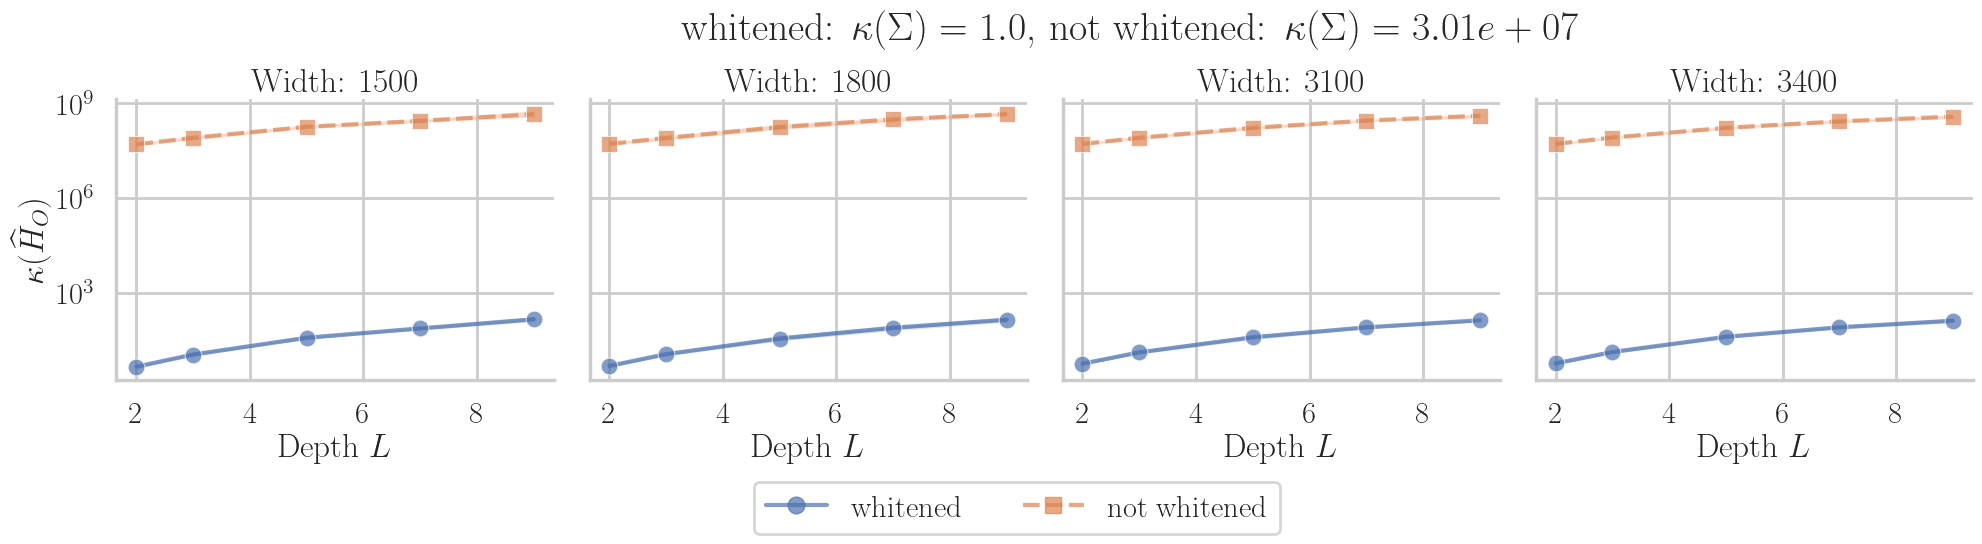

In [467]:
filename='whitenend_vs_not_whitened_cifar10_linNet'

whitenend_vs_not_whitened_relplot(df_conc_w, sigma, filename=filename, save=True)

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/2899335512.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(df_conc_w, x='depth',y='value', alpha=0.7, hue='normalization', style='normalization', size='width', style_order=['whitened','not whitened'], markers=markers)


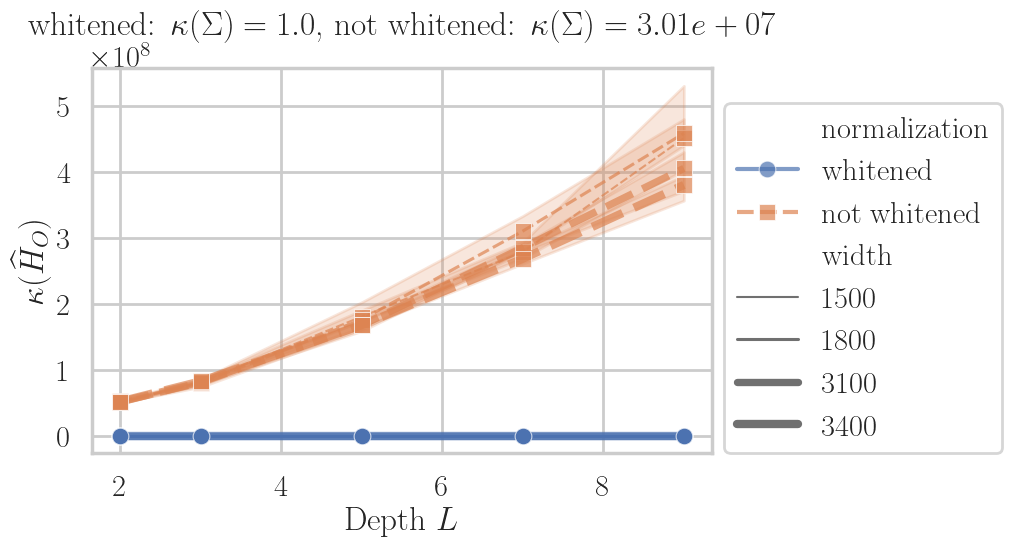

In [468]:
f = plt.figure(figsize=(8,5))

g = sns.lineplot(df_conc_w, x='depth',y='value', alpha=0.7, hue='normalization', style='normalization', size='width', style_order=['whitened','not whitened'], markers=markers)

# g.set(yscale='log')

g.set_xlabel('Depth $L$')
g.set_ylabel('$\kappa(\widehat{H}_O)$')

g.set_title('whitened: $\kappa(\Sigma)=1.0$, not whitened: $\kappa(\Sigma) = %.2e$' % sigma)

g.legend(loc=(1.02,0))

# f.savefig('whitenend_vs_not_whitened_cifar10_linNet_combined_plot.pdf', bbox_inches='tight')

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/4000664878.py:5: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(df_conc_w_fil, x='depth',y='value', alpha=1, hue='normalization', style='normalization', style_order=['whitened','not whitened'], markers=markers)


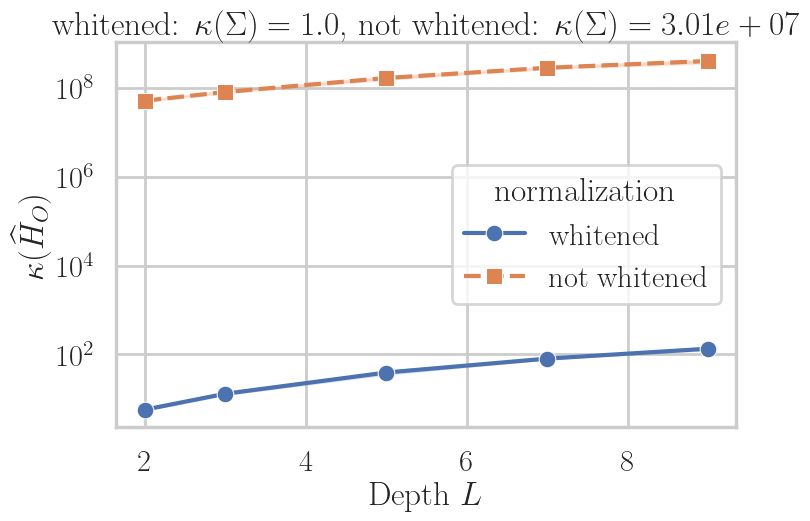

In [469]:
df_conc_w_fil = df_conc_w[df_conc_w['width']==3100]

f = plt.figure(figsize=(8,5))

g = sns.lineplot(df_conc_w_fil, x='depth',y='value', alpha=1, hue='normalization', style='normalization', style_order=['whitened','not whitened'], markers=markers)

g.set(yscale='log')

g.set_xlabel('Depth $L$')
g.set_ylabel('$\kappa(\widehat{H}_O)$')

g.set_title('whitened: $\kappa(\Sigma)=1.0$, not whitened: $\kappa(\Sigma) = %.2e$' % sigma)

# g.legend(loc=(1.02,0))

# g.fig.suptitle('whitened: $\kappa(\Sigma)=1.0$, not whitened: $\kappa(\Sigma) = %.2e$' % sigma)
# g.fig.subplots_adjust(top=0.8)

f.savefig('whitenend_vs_not_whitened_cifar10_linNet_single_plot_width3100.pdf', bbox_inches='tight')

##### 2. show convex combination bound is better: Cifar-10


In [470]:
def upperbound_comparison_relplot(df,title,filename=None,save=False):

    g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='type', style='type', markers=markers)
    g.set(yscale='log')

    g.set_axis_labels('Depth $L$','$\kappa(\widehat{H}_O)$')
    
    g.fig.suptitle(title)
    g.fig.subplots_adjust(top=0.8)
    
    g.set_titles('Width: {col_name}')
    
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.38, -0.1), ncol=3, title=None, frameon=True)

    
    if save==True:
        g.savefig(filepath+ filename + '.pdf')

In [471]:
filename='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_NOTwhitened_LinNet_num_init=3.pkl'
filename2='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_LinNet_num_init=3.pkl'

df_whitened = load_pandas_df(file_path, filename2)
df_whitened_cifar10 = filter_bound_3_out(df_whitened)

df_whitened_cifar10['depth'] +=1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/1498022409.py:3: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='type', style='type', markers=markers)


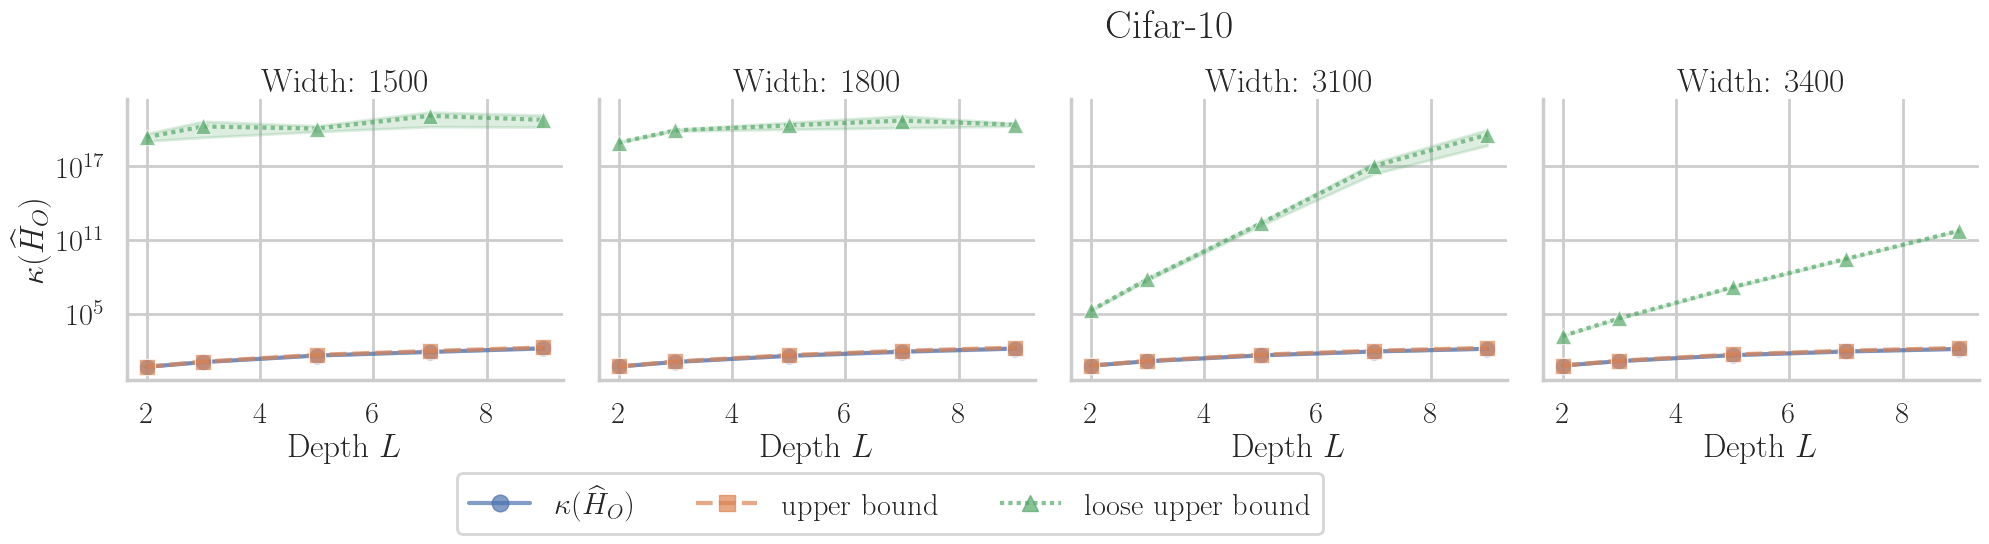

In [472]:
filename = 'upperbound_comparison_relplot_Cifar10_whitened'
title = 'Cifar-10'
upperbound_comparison_relplot(df_whitened_cifar10, title, filename=filename,save=True)

In [473]:
filename='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_NOTwhitened_LinNet_num_init=20.pkl'
filename2='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_LinNet_num_init=20.pkl'

df_whitened = load_pandas_df(file_path, filename2)
df_whitened_MNIST = filter_bound_3_out(df_whitened)

df_whitened_MNIST['depth'] += 1 

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/1498022409.py:3: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='type', style='type', markers=markers)


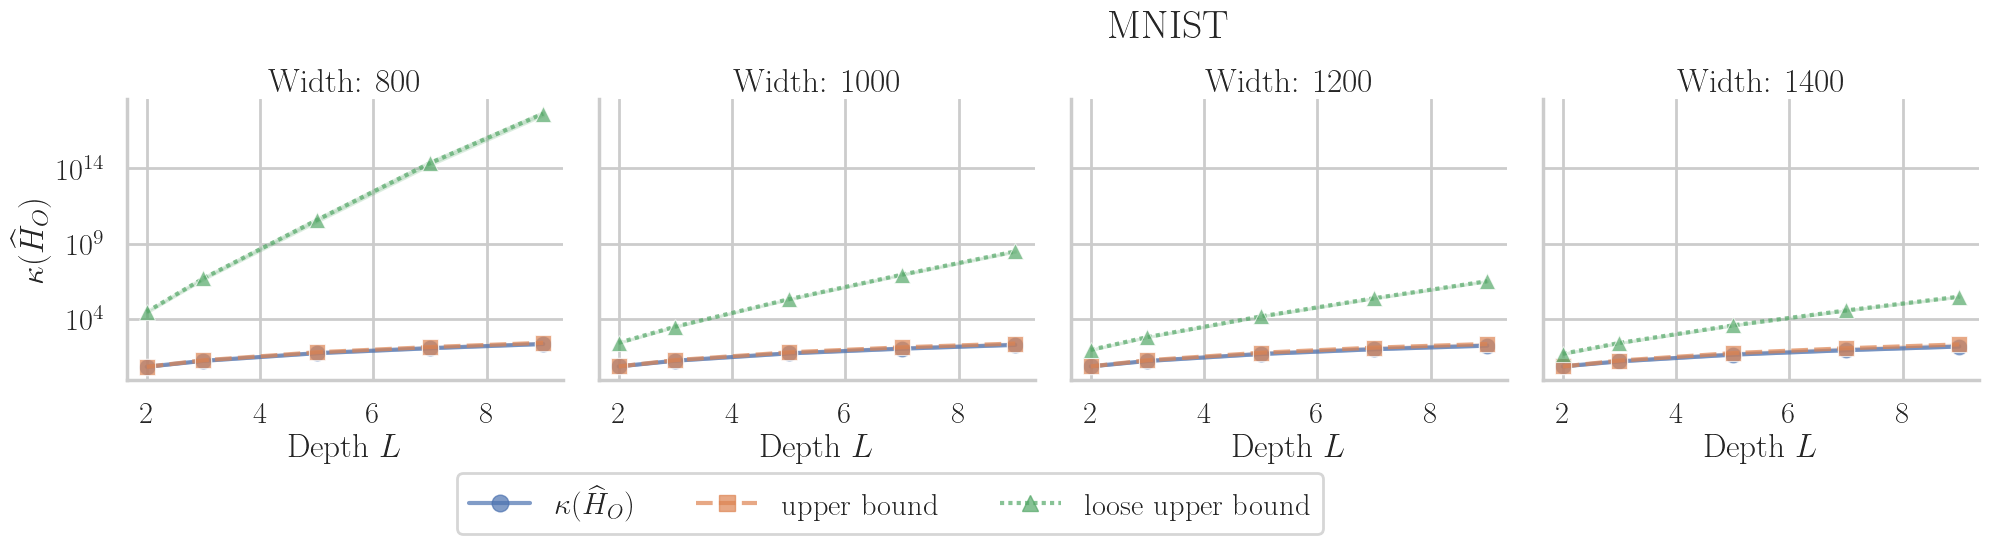

In [474]:
filename = 'upperbound_comparison_relplot_MNIST_whitened'
title = 'MNIST'
upperbound_comparison_relplot(df_whitened_MNIST, title, filename=filename,save=True)

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/1498022409.py:3: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='type', style='type', markers=markers)


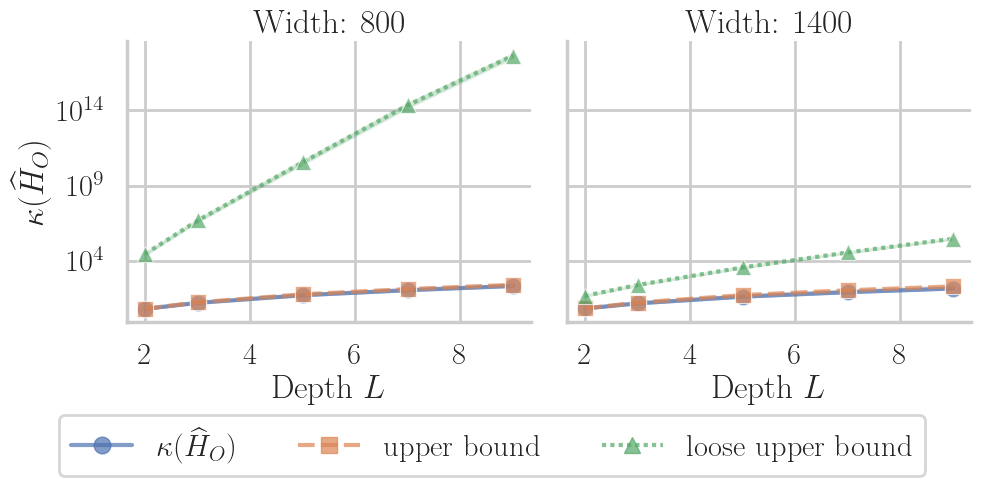

In [475]:
df_whitened_MNIST_fil = df_whitened_MNIST[df_whitened_MNIST['width'] != 1000]
df_whitened_MNIST_fil = df_whitened_MNIST_fil[df_whitened_MNIST_fil['width'] != 1200]


filename = 'upperbound_comparison_relplot_MNIST_whitened_two_subplots'
title = ''
upperbound_comparison_relplot(df_whitened_MNIST_fil, title, filename=filename,save=True)

##### 3. Fixed width with depth: MNIST, Cifar-10

In [485]:
def make_relplot_col_depth(df, title, log_scale=False, filename=None, save=False):
        
    g = sns.relplot(data=df, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers, legend='auto')
    
    g.set_axis_labels('Depth $L$','$\kappa(\widehat{H}_O)$')
    
    sig = df['cond_cov_xx'][0]
    g.set_titles(r'Width: {col_name}')
#     g.set_titles(r'Width: {col_name}, $\kappa(\Sigma)= %.1e$' %sig)
    
#     g.fig.suptitle(r'test', y=0.5)

    g.fig.suptitle(title)
    g.fig.subplots_adjust(top=0.8)
    
    if log_scale:
        g.set(yscale='log')
        
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.47, -0.1), ncol=3, title=None, frameon=True)

        
    if save==True:
        g.savefig(filepath+ filename + '.pdf')

In [486]:
filename2='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_LinNet_num_init=20.pkl'

df_whitened = load_pandas_df(file_path, filename2)
df_whitened_MNIST = filter_bound_2_3_out(df_whitened)

df_whitened_MNIST['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/2982836583.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers, legend='auto')


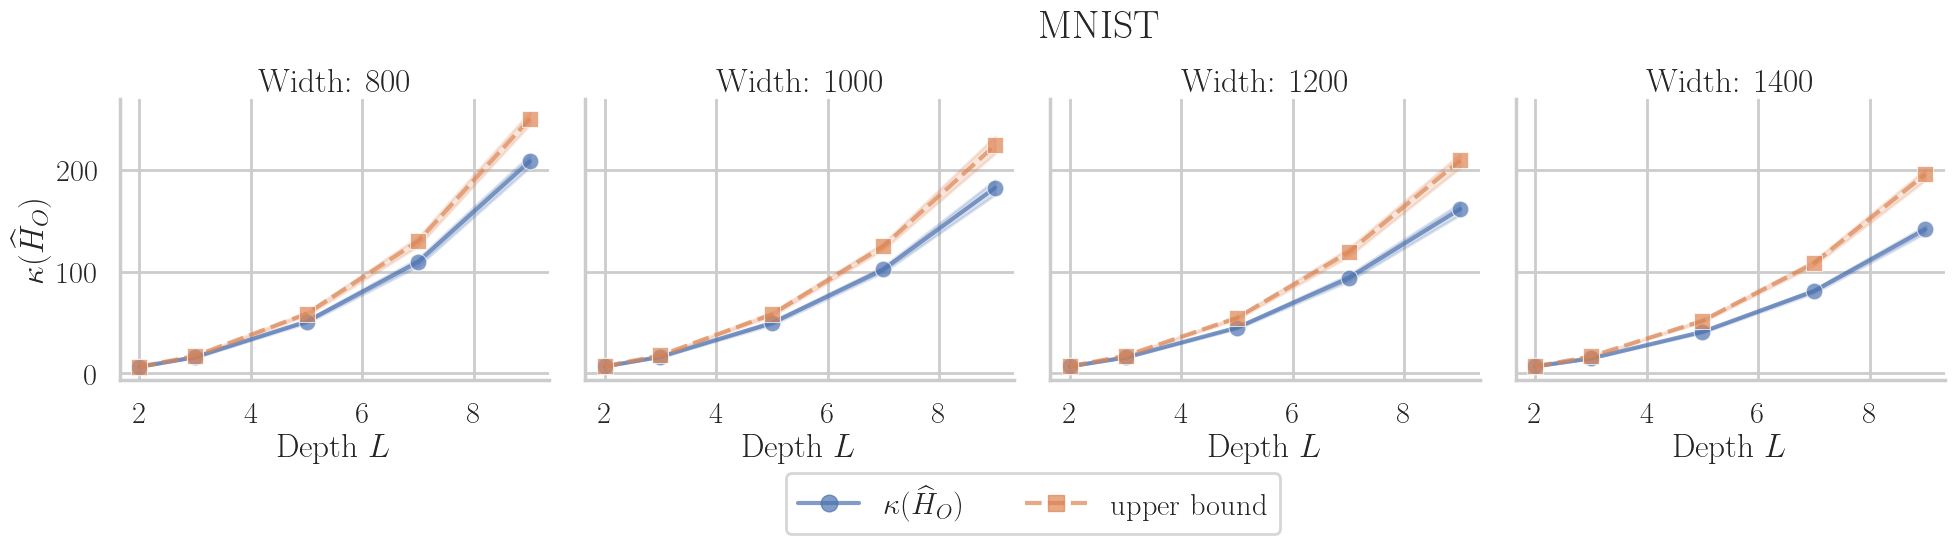

In [487]:
filename = 'fixed_width_w_depth_MNIST_whitened'
title = 'MNIST'

make_relplot_col_depth(df_whitened_MNIST, title, filename=filename, save=True)

<Axes: xlabel='width', ylabel='value'>

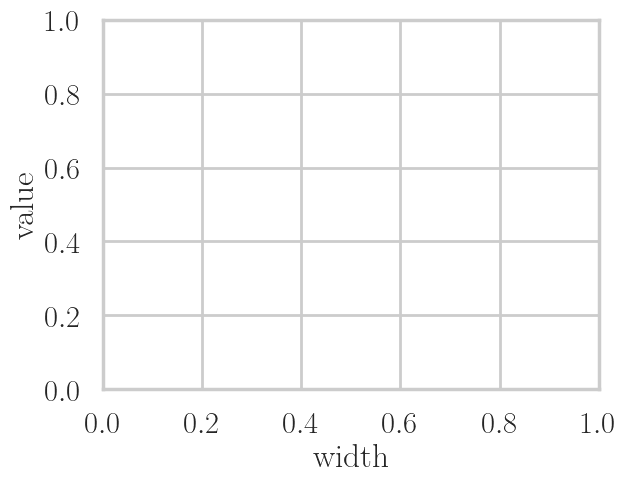

In [488]:
df_whitened_MNIST_fil_depth = df_whitened_MNIST[df_whitened_MNIST['depth']==1]

sns.lineplot(df_whitened_MNIST_fil_depth, x='width', y='value', hue='type')

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/2603654705.py:8: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df_whitened_MNIST_fil, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers)


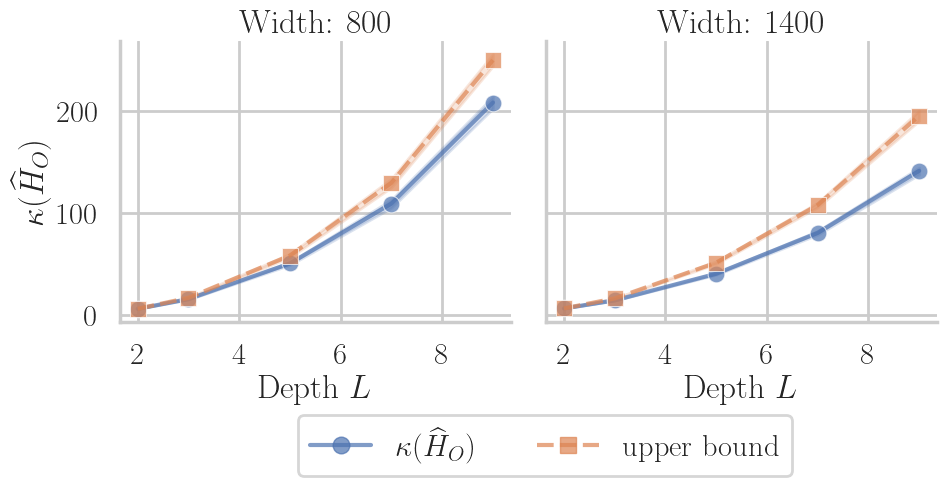

In [489]:
df_whitened_MNIST_fil = df_whitened_MNIST[df_whitened_MNIST['width'] != 1000]
df_whitened_MNIST_fil = df_whitened_MNIST_fil[df_whitened_MNIST_fil['width'] != 1200]

filename = 'fixed_width_w_depth_MNIST_whitened_two_plots'
title = 'MNIST'


g = sns.relplot(data=df_whitened_MNIST_fil, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers)
    
g.set_axis_labels('Depth $L$','$\kappa(\widehat{H}_O)$')

g.set_titles(r'Width: {col_name}')
#     g.set_titles(r'Width: {col_name}, $\kappa(\Sigma)= %.1e$' %sig)

#     g.fig.suptitle(r'test', y=0.5)

g.fig.subplots_adjust(top=0.8)
                
sns.move_legend(g, "lower center", bbox_to_anchor=(0.47, -0.1), ncol=3, title=None, frameon=True)

g.savefig(filepath + filename + '.pdf')

In [490]:
filename2='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_Cifar10_whitened_LinNet_num_init=3.pkl'

df_whitened = load_pandas_df(file_path, filename2)
df_whitened_cifar10 = filter_bound_2_3_out(df_whitened)

df_whitened_cifar10['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/2982836583.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers, legend='auto')


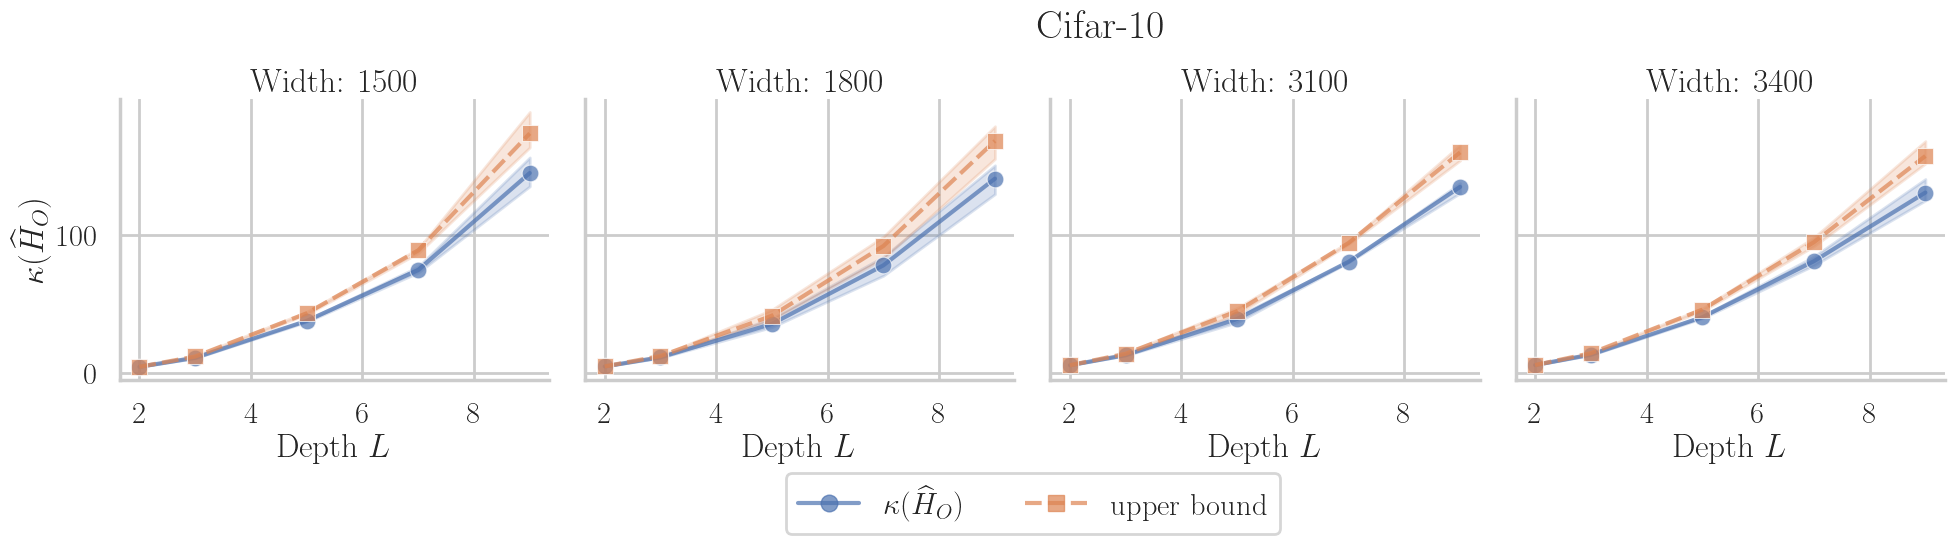

In [491]:
filename = 'fixed_width_w_depth_Cifar10_whitened'
title = 'Cifar-10'
make_relplot_col_depth(df_whitened_cifar10, title, filename=filename, save=True)

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/2982836583.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers, legend='auto')


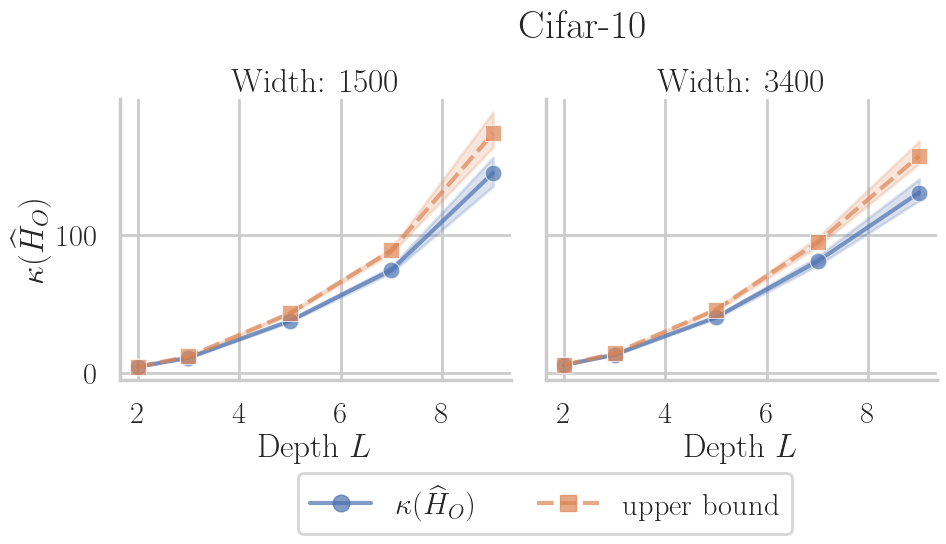

In [492]:
df_whitened_cifar10_fil = df_whitened_cifar10[df_whitened_cifar10['width'] != 1800]
df_whitened_cifar10_fil = df_whitened_cifar10_fil[df_whitened_cifar10_fil['width'] != 3100]

filename = 'fixed_width_w_depth_Cifar10_whitened_two_plots'
title = 'Cifar-10'
make_relplot_col_depth(df_whitened_cifar10_fil, title, filename=filename, save=True)

##### 4. Width proportional with depth: smaller constant: MNIST


In [493]:
def make_relplot_width_prop_w_depth(df, title, filename=None, save=False):
    f = plt.figure(figsize=(8,5))

    g = sns.lineplot(data=df, x='depth',y='value', alpha=0.7, hue='type', style='type', markers=markers, legend='auto')

#     g.set(yscale='log')
#     g.set(ylim=[5,25])
    g.set_xlabel('Depth $L$') 
    g.set_ylabel('$\kappa(\widehat{H}_O)$')

    g.set_title(title)
    
#     sns.move_legend(g, "lower center", bbox_to_anchor=(0.47, -0.5), ncol=3, title=None, frameon=True)

    
#     print(g)
    if save==True:
        f.savefig(filepath+ filename + '.pdf', bbox_inches='tight')

In [494]:
filename = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_smaller_factor.pkl'
df1 = load_pandas_df(file_path, filename)

filename = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_smaller_factor_L=8.pkl'
df2 = load_pandas_df(file_path, filename)

df_width_scaled_w_depth_1 = pd.concat([df1,df2])

df_width_scaled_w_depth_1 = filter_bound_2_3_out(df_width_scaled_w_depth_1)



df_width_scaled_w_depth_1['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/2986407645.py:4: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(data=df, x='depth',y='value', alpha=0.7, hue='type', style='type', markers=markers, legend='auto')


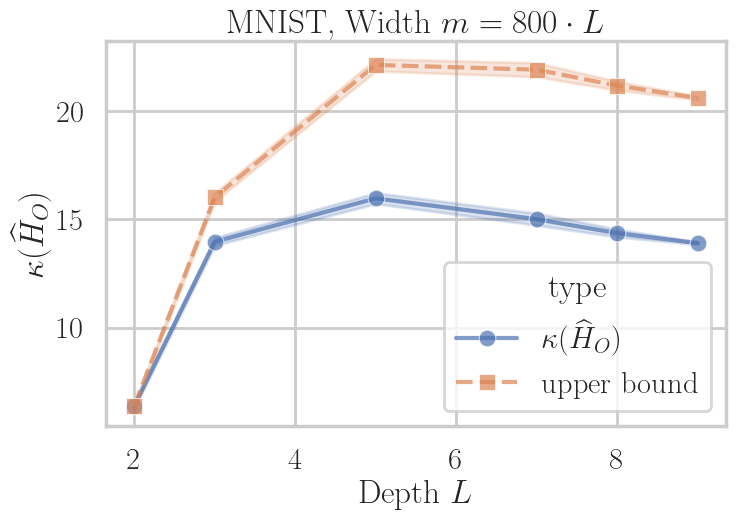

In [495]:
filename = 'width_prop_w_depth_small_factor_MNIST_whitened'

title = 'MNIST, Width $m= 800 \cdot L$'

make_relplot_width_prop_w_depth(df_width_scaled_w_depth_1, title, filename=filename, save=True)

##### 5. Width proportional with depth: larger constant: MNIST

In [496]:
def filter_l_out(df):
    df = df[df['l']!=1]
    df = df[df['l']!=2]
    df = df[df['l']!=3]
    df = df[df['l']!=4]
    df = df[df['l']!=5]
    df = df[df['l']!=6]
    return df

In [497]:
filename1 = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_L=1.pkl'
filename2 = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_L=2.pkl'
filename3 = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_L=4.pkl'
filename4 = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_L=6.pkl'
filename5 = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_L=8.pkl'

df1 = load_pandas_df(file_path, filename1)
df2 = load_pandas_df(file_path, filename2)
df3 = load_pandas_df(file_path, filename3)
df4 = load_pandas_df(file_path, filename4)
df5 = load_pandas_df(file_path, filename5)


df_width_scaled_w_depth_2 = pd.concat([df1,df2,df3,df4,df5])



df_width_scaled_w_depth_2 = filter_bound_2_3_out(df_width_scaled_w_depth_2)
df_width_scaled_w_depth_2 = filter_l_out(df_width_scaled_w_depth_2)

df_width_scaled_w_depth_2['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/2986407645.py:4: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(data=df, x='depth',y='value', alpha=0.7, hue='type', style='type', markers=markers, legend='auto')


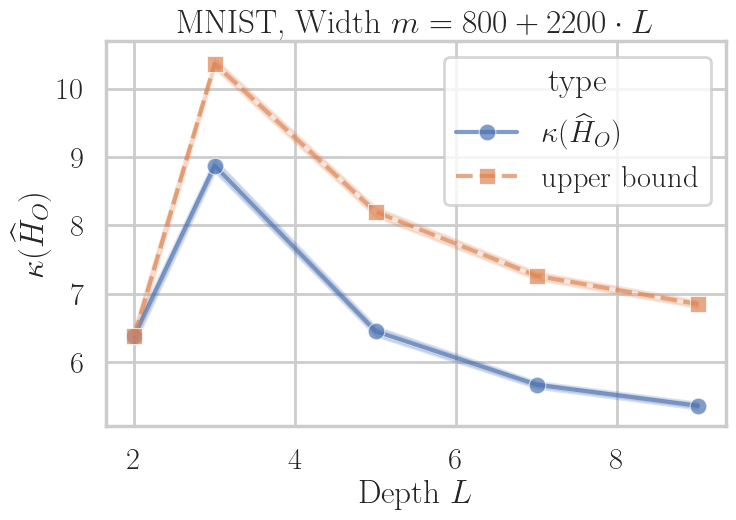

In [498]:
filename = 'width_prop_w_depth_larger_factor_MNIST_whitened'

title = 'MNIST, Width $m = 800 + 2200\cdot L$'
make_relplot_width_prop_w_depth(df_width_scaled_w_depth_2, title=title, filename=filename, save=True)

In [499]:
df_width_scaled_w_depth_1.insert(0,'scaling','$800 \cdot (L-1)$')
df_width_scaled_w_depth_2.insert(0,'scaling','$800 + 2200 \cdot (L-1)$')


df_width_scaled_w_depth_conc = pd.concat([df_width_scaled_w_depth_1,df_width_scaled_w_depth_2])

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/2858879585.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(df_width_scaled_w_depth_conc, alpha=0.7, x='depth', y='value', col='scaling', hue='type', markers=markers, style='type', kind='line')


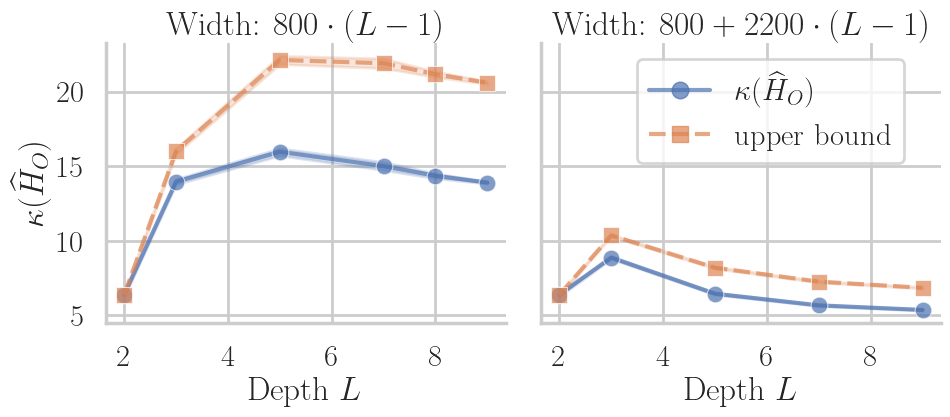

In [501]:
filename = 'width_prop_w_depth_MNIST_whitened'

g = sns.relplot(df_width_scaled_w_depth_conc, alpha=0.7, x='depth', y='value', col='scaling', hue='type', markers=markers, style='type', kind='line')

g.set_titles('Width: {col_name}')

g.set_axis_labels('Depth $L$','$\kappa(\widehat{H}_O)$')

# g.fig.suptitle('MNIST')

g.fig.subplots_adjust(top=0.8)

sns.move_legend(g, "lower center", bbox_to_anchor=(0.645, 0.53), ncol=1, title=None, frameon=True)

       
g.savefig(filepath+ filename + '.pdf')

### Linear vs. Residual networks

##### 1. ResNet, beta comparison: MNIST, Cifar-10


In [502]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_num_init=20.pkl'
df = load_pandas_df(file_path, file_name)
df_res = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_L_num_init=20.pkl'
df = load_pandas_df(file_path, file_name)
df_res_1L = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_sqrt(L)_num_init=20.pkl'
df = load_pandas_df(file_path, file_name)
df_res_1sqrtL = filter_bound_2_3_out(df)

df_res.insert(2,'beta','$1$')
df_res_1sqrtL.insert(2,'beta','$1/\sqrt{L}$')
df_res_1L.insert(2,'beta','$1/L$')

df_conc_res_MNIST = pd.concat([df_res,df_res_1sqrtL,df_res_1L])
df_conc_res_MNIST['depth'] += 1

In [503]:
def make_relplot_Res_beta_comparison_col_depth(df, title, log_scale=False, filename=None, save=False):
        
    g = sns.relplot(data=df, x='depth',y='value',col='width',alpha=0.7, hue='beta', style='type', kind='line', markers=markers, legend='auto')
    
    g.set_axis_labels('Depth $L$','$\kappa(\widehat{H}_O)$')
    
    g.set_titles('Width: {col_name}')
    
    g.fig.suptitle(title)
#     g.add_legend(title="")
    g.fig.subplots_adjust(top=0.8)
    
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.45, -0.43), ncol=2, title=None, frameon=True)

    
    
    if log_scale:
        g.set(yscale='log')
        
    if save==True:
        g.savefig(filepath+ filename + '.pdf')

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/1840449697.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value',col='width',alpha=0.7, hue='beta', style='type', kind='line', markers=markers, legend='auto')


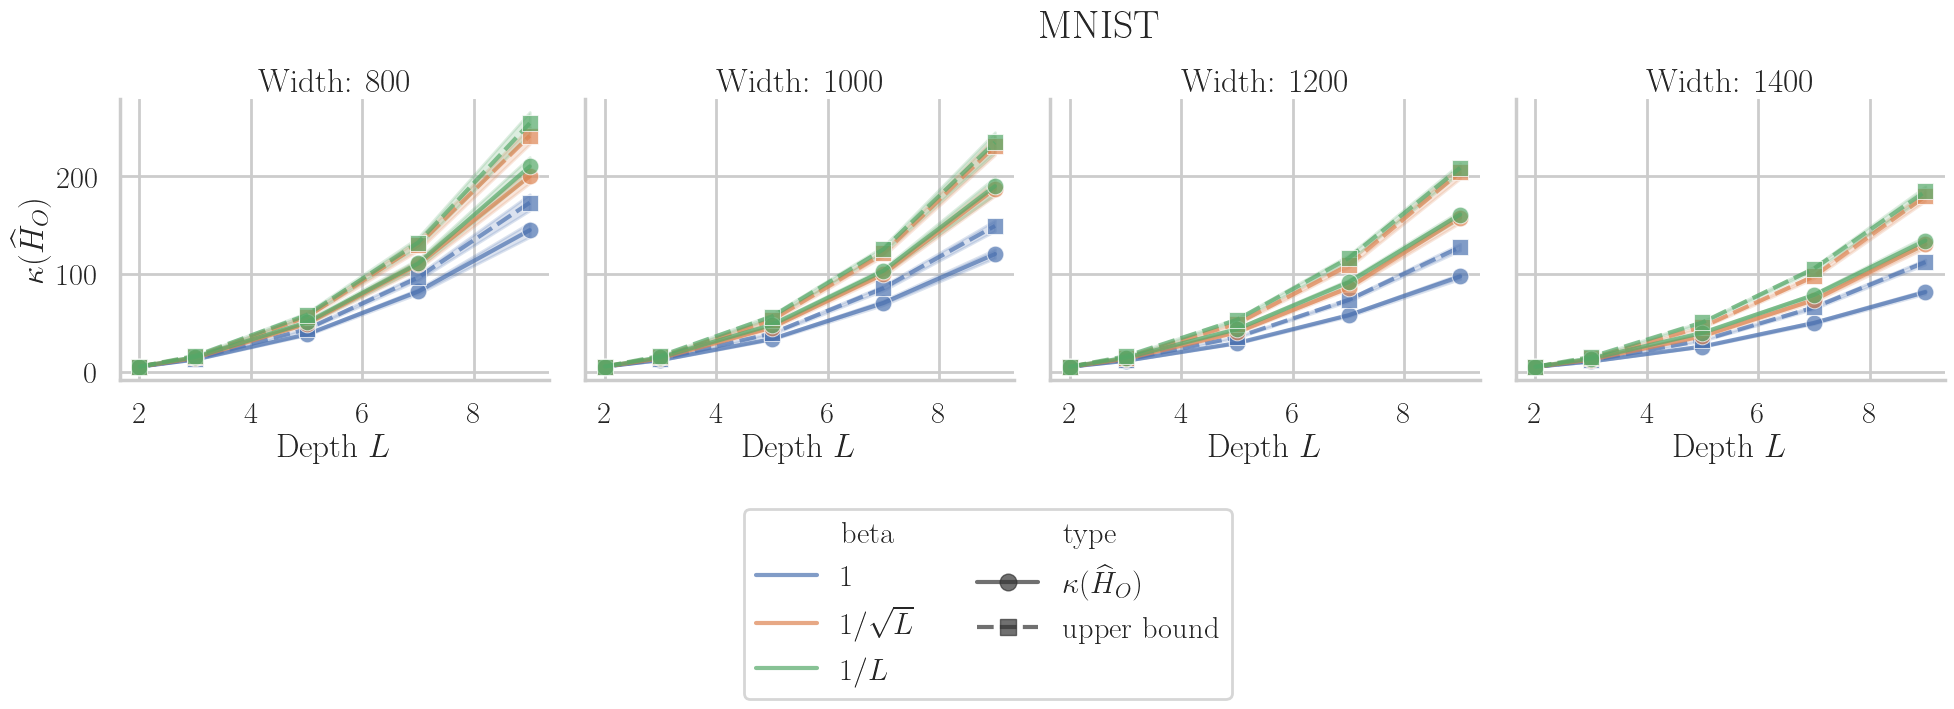

In [504]:
filename='MNIST_whitened_Resnet_beta_comparison'
title='MNIST'

make_relplot_Res_beta_comparison_col_depth(df_conc_res_MNIST,title, filename=filename,save=True)

In [505]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_ResNet_beta=1_num_init=3.pkl'
df = load_pandas_df(file_path, file_name)
df_res = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_ResNet_beta=1_L_num_init=3.pkl'
df = load_pandas_df(file_path, file_name)
df_res_1L = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_ResNet_beta=1_sqrt(L)_num_init=3.pkl'
df = load_pandas_df(file_path, file_name)
df_res_1sqrtL = filter_bound_2_3_out(df)

df_res.insert(2,'beta','$1$')
df_res_1sqrtL.insert(2,'beta','$1/\sqrt{L}$')
df_res_1L.insert(2,'beta','$1/L$')

df_conc_res_Cifar10 = pd.concat([df_res,df_res_1sqrtL,df_res_1L])
df_conc_res_Cifar10['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/1840449697.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value',col='width',alpha=0.7, hue='beta', style='type', kind='line', markers=markers, legend='auto')


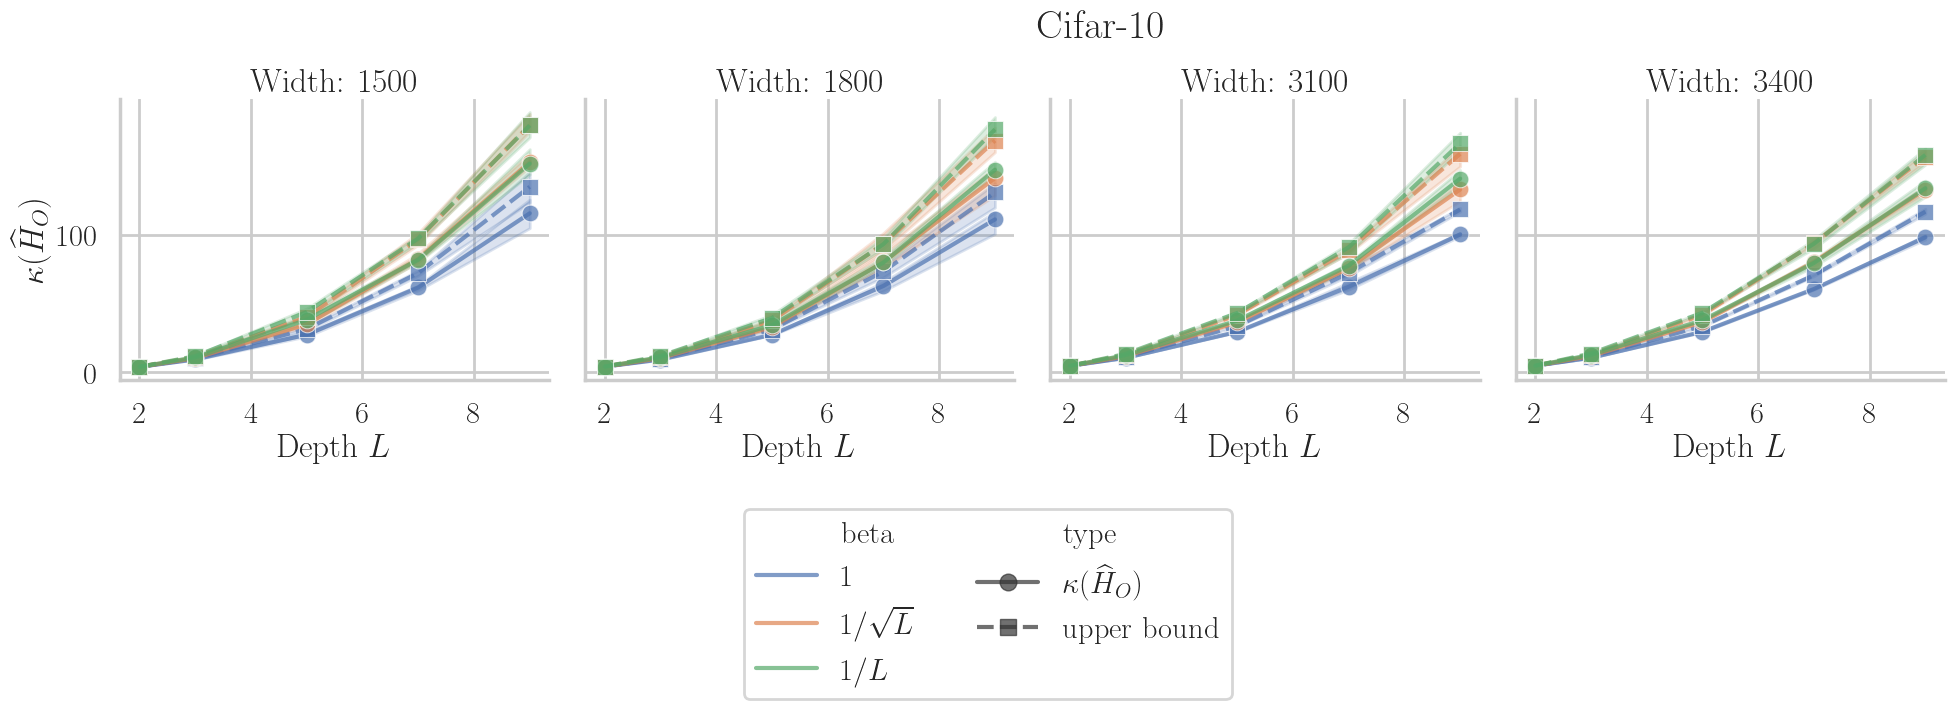

In [506]:
filename='Cifar10_whitened_Resnet_beta_comparison'
title='Cifar-10'
make_relplot_Res_beta_comparison_col_depth(df_conc_res_Cifar10,title,filename=filename,save=True)

##### 2. Linear vs. ResNet beta=1: MNIST, Cifar-10

In [507]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_ResNet_beta=1_num_init=3.pkl'
df = load_pandas_df(file_path, file_name)
df_res = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_LinNet_num_init=3.pkl'
df = load_pandas_df(file_path, file_name)
df_lin = filter_bound_2_3_out(df)

# df_res.insert(2,'beta','$1$')
# df_res_1sqrtL.insert(2,'beta','$1/\sqrt{L}$')
# df_res_1L.insert(2,'beta','$1/L$')

df_conc_lin_vs_res_Cifar10 = pd.concat([df_res,df_lin])
df_conc_lin_vs_res_Cifar10['depth'] += 1

In [508]:
def make_relplot_LinvsRes_col_depth(df, title, log_scale=False, filename=None, save=False):
        
    g = sns.relplot(data=df, x='depth',y='value',col='width', style='type', hue='network', kind='line', markers=markers, legend='brief')
    
    g.set_axis_labels('Depth $L$','$\kappa(\widehat{H}_O)$')
    
    g.set_titles('Width: {col_name}')
    
    g.fig.suptitle(title)
#     g.add_legend(title="")
    g.fig.subplots_adjust(top=0.8)
    
    if log_scale:
        g.set(yscale='log')
        
    # Access the underlying FacetGrid and remove column titles from the legend
    for ax in g.axes.flat:
        legend = ax.get_legend()
        if legend:
            print('test')
            legend.set_title('')
            legend.set_bbox_to_anchor((1, 1))  # Adjust legend position if needed
        
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.48, -0.28), ncol=2, title=None, frameon=True)

        
#     g.set(ylim=[1,1e10])
    if save==True:
        g.savefig(filepath+ filename + '.pdf')

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/3114204154.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value',col='width', style='type', hue='network', kind='line', markers=markers, legend='brief')


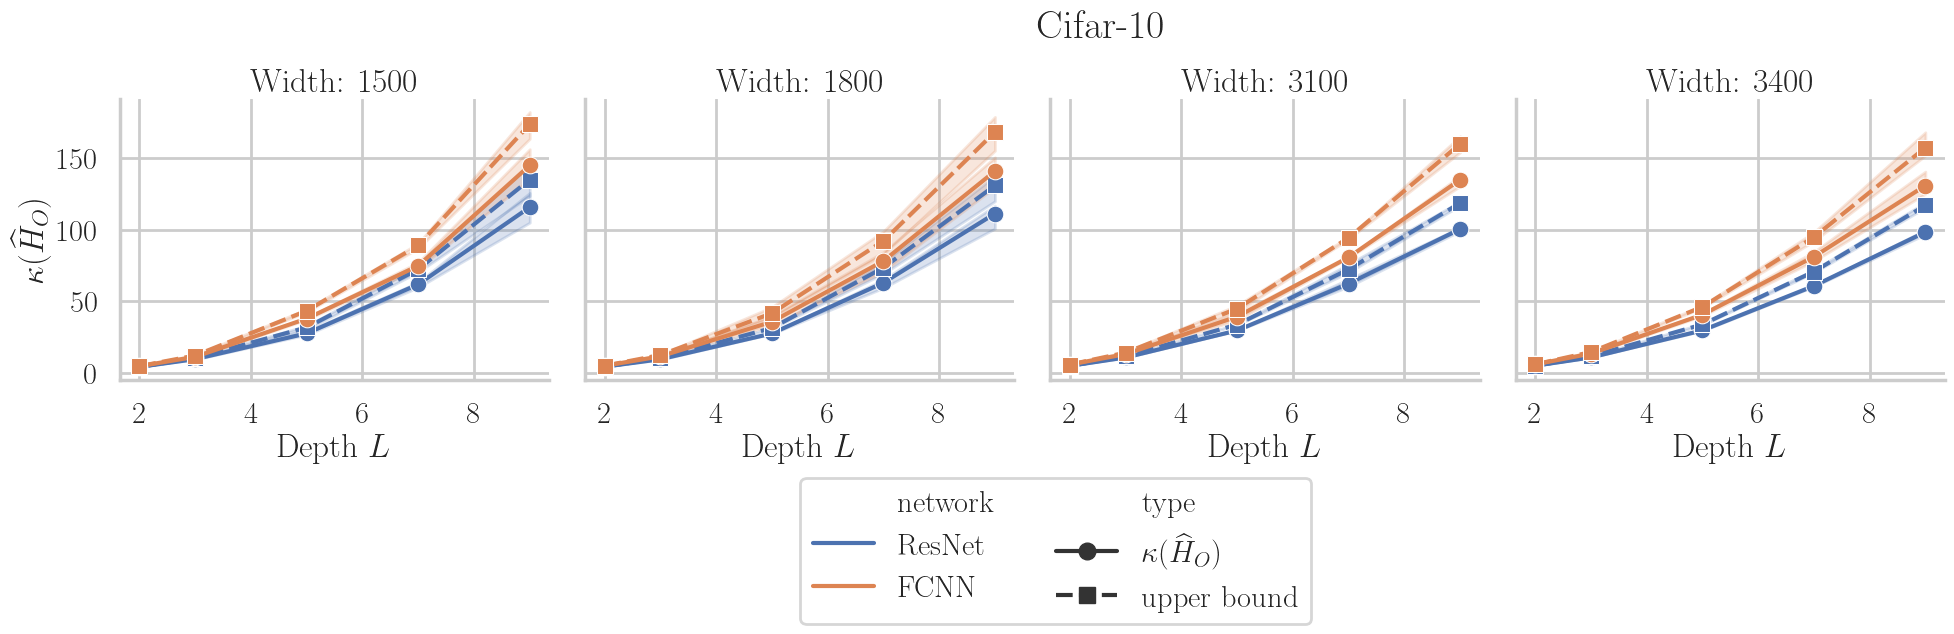

In [509]:
filename='Cifar10_whitened_LinNet_vs_ResNet_beta=1_comparison'
title='Cifar-10'
# 
make_relplot_LinvsRes_col_depth(df_conc_lin_vs_res_Cifar10, title,filename=filename, save=True)


In [510]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_num_init=20.pkl'
df = load_pandas_df(file_path, file_name)
df_res = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_LinNet_num_init=20.pkl'
df = load_pandas_df(file_path, file_name)
df_lin = filter_bound_2_3_out(df)

# df_res.insert(2,'beta','$1$')
# df_res_1sqrtL.insert(2,'beta','$1/\sqrt{L}$')
# df_res_1L.insert(2,'beta','$1/L$')

df_conc_lin_vs_res_MNIST = pd.concat([df_res,df_lin])
df_conc_lin_vs_res_MNIST['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/3114204154.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value',col='width', style='type', hue='network', kind='line', markers=markers, legend='brief')


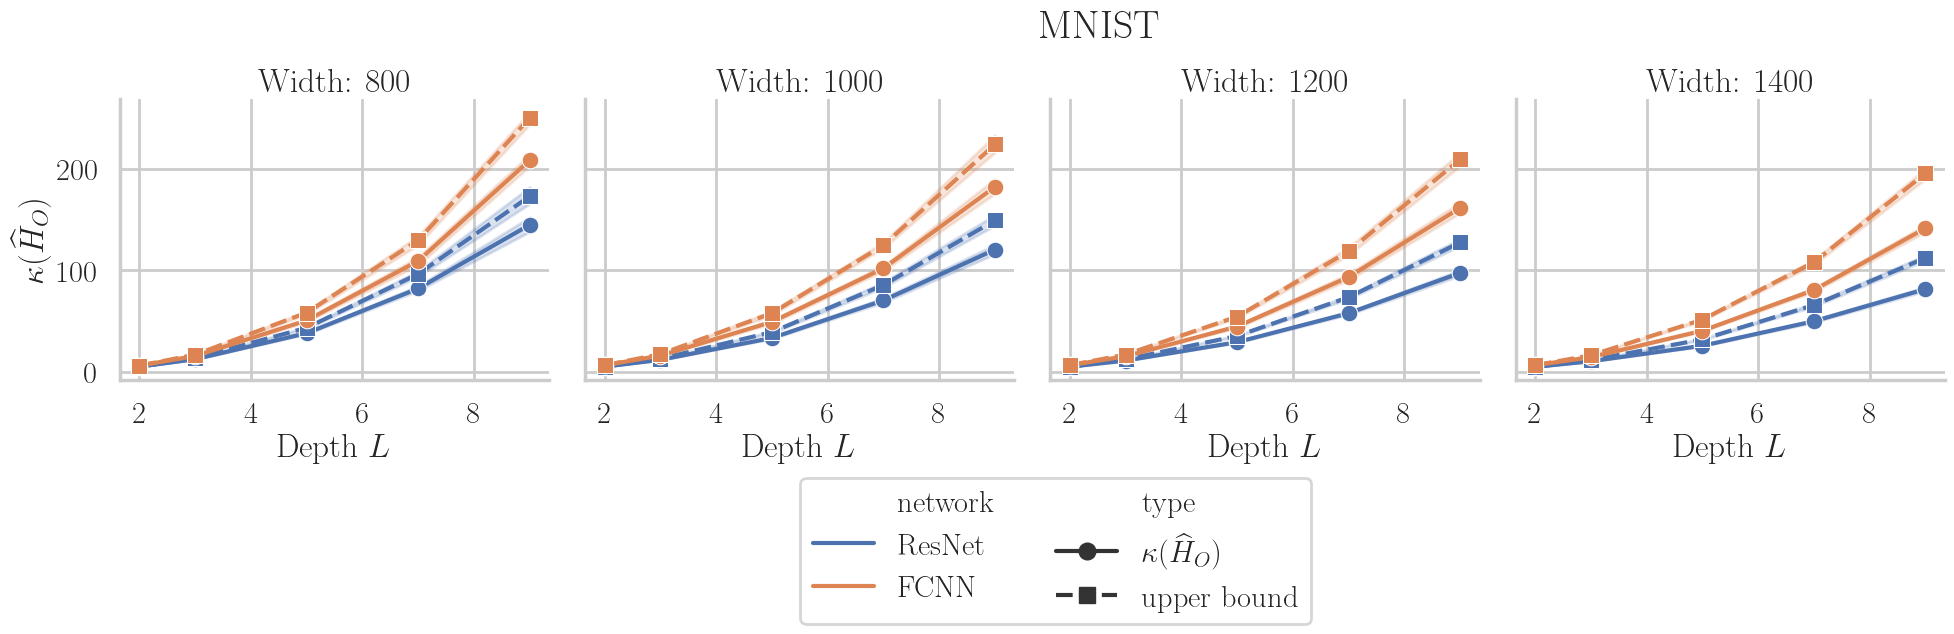

In [511]:
filename='MNIST_whitened_LinNet_vs_ResNet_beta=1_comparison'
title='MNIST'
# 
make_relplot_LinvsRes_col_depth(df_conc_lin_vs_res_MNIST, title,filename=filename, save=True)


/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/3114204154.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value',col='width', style='type', hue='network', kind='line', markers=markers, legend='brief')


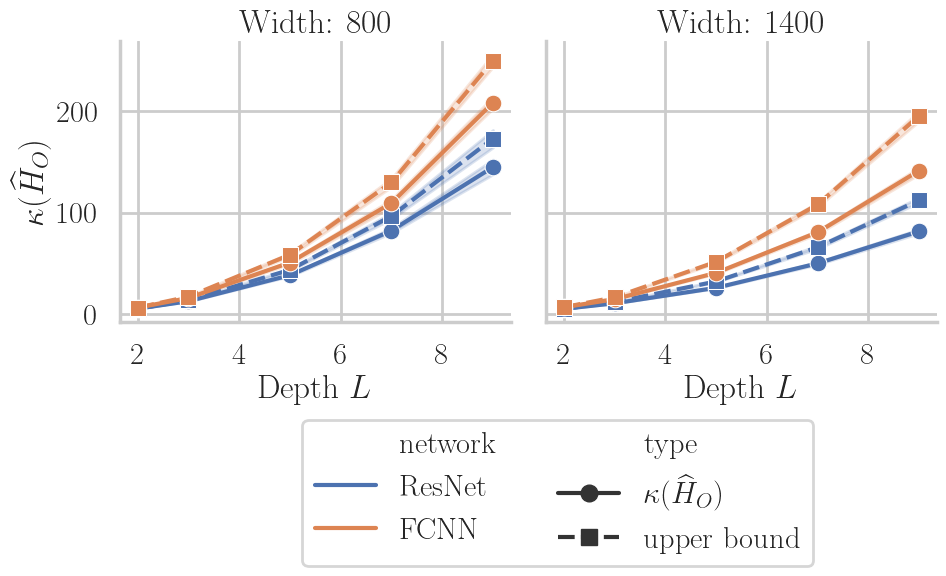

In [512]:
df_conc_lin_vs_res_MNIST_fil = df_conc_lin_vs_res_MNIST[df_conc_lin_vs_res_MNIST['width'] != 1000]
df_conc_lin_vs_res_MNIST_fil = df_conc_lin_vs_res_MNIST_fil[df_conc_lin_vs_res_MNIST_fil['width'] != 1200]

filename='MNIST_whitened_LinNet_vs_ResNet_beta=1_comparison_two_subplots'
title=''
# 
make_relplot_LinvsRes_col_depth(df_conc_lin_vs_res_MNIST_fil, title,filename=filename, save=True)


In [513]:
df_conc_lin_vs_res_MNIST_fil

dataset network  cond_cov_xx  input_dim  output_dim  width  depth  \
0      mnist  ResNet     1.000001        784          10    800      2   
1      mnist  ResNet     1.000001        784          10    800      2   
4      mnist  ResNet     1.000001        784          10    800      2   
5      mnist  ResNet     1.000001        784          10    800      2   
8      mnist  ResNet     1.000001        784          10    800      2   
...      ...     ...          ...        ...         ...    ...    ...   
1589   mnist    FCNN     1.000001        784          10   1400      9   
1592   mnist    FCNN     1.000001        784          10   1400      9   
1593   mnist    FCNN     1.000001        784          10   1400      9   
1596   mnist    FCNN     1.000001        784          10   1400      9   
1597   mnist    FCNN     1.000001        784          10   1400      9   

     activ_f  epoch                     type       value  
0     linear    0.0  $\kappa(\widehat{H}_O)$    5.471584  
1     linear    0.0              upper bound    5.471590  
4     linear    0.0  $\kappa(\widehat{H}_O)$    4.970114  
5     linear    0.0              upper bound    4.970119  
8     linear    0.0  $\kappa(\widehat{H}_O)$    5.306767  
...      ...    ...                      ...         ...  
1589  linear    0.0              upper bound  214.119554  
1592  linear    0.0  $\kappa(\widehat{H}_O)$  139.222087  
1593  linear    0.0              upper bound  192.370263  
1596  linear    0.0  $\kappa(\widehat{H}_O)$  136.515225  
1597  linear    0.0              upper bound  195.373114  

[800 rows x 11 columns]

### Leaky ReLU

In [514]:
def make_LeakyReLU_width_comparison(df, title, leg_loc, filename=None, save=False):
    f = plt.figure(figsize=(8,5))
    
    g = sns.lineplot(df, x='width', y='value', hue='type', style='type', markers=markers)
    g.set(yscale='log')
    g.set_xlabel('Width $m$')
    g.set_ylabel('$\kappa(\widehat{H}_O)$')
    plt.legend(loc=leg_loc)
    plt.title(title)
    
    if save:
        f.savefig(filepath + filename + '.pdf', bbox_inches='tight')
    

In [515]:
file_name = 'outer_prod_hessian_information_initialization_experiments_LeakyReLU_MNIST_whitened_num_init=20_n=500_more_widths.pkl'
df = load_pandas_df(file_path, file_name)
df_leakyrelu_MNIST = filter_bound_3_out(df)
df_leakyrelu_MNIST

dataset network  cond_cov_xx  input_dim  output_dim  width  depth  \
0     mnist    FCNN     1.000001        784          10    800    1.0   
1     mnist    FCNN     1.000001        784          10    800    1.0   
2     mnist    FCNN     1.000001        784          10    800    1.0   
3     mnist    FCNN     1.000001        784          10    800    1.0   
4     mnist    FCNN     1.000001        784          10    800    1.0   
..      ...     ...          ...        ...         ...    ...    ...   
415   mnist    FCNN     1.000001        784          10   9000    1.0   
416   mnist    FCNN     1.000001        784          10   9000    1.0   
417   mnist    FCNN     1.000001        784          10   9000    1.0   
418   mnist    FCNN     1.000001        784          10   9000    1.0   
419   mnist    FCNN     1.000001        784          10   9000    1.0   

        activ_f  epoch                     type         value  alpha  
0    leaky_relu    0.0  $\kappa(\widehat{H}_O)$    214.541692   0.01  
1    leaky_relu    0.0              upper bound   4918.974294   0.01  
2    leaky_relu    0.0        loose upper bound  53306.524953   0.01  
3    leaky_relu    0.0  $\kappa(\widehat{H}_O)$    207.101859   0.01  
4    leaky_relu    0.0              upper bound   5014.244872   0.01  
..          ...    ...                      ...           ...    ...  
415  leaky_relu    0.0              upper bound    414.904694   0.01  
416  leaky_relu    0.0        loose upper bound  24222.464134   0.01  
417  leaky_relu    0.0  $\kappa(\widehat{H}_O)$    339.463344   0.01  
418  leaky_relu    0.0              upper bound    409.291947   0.01  
419  leaky_relu    0.0        loose upper bound  24039.954873   0.01  

[420 rows x 12 columns]

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/1802687061.py:4: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  g = sns.lineplot(df, x='width', y='value', hue='type', style='type', markers=markers)


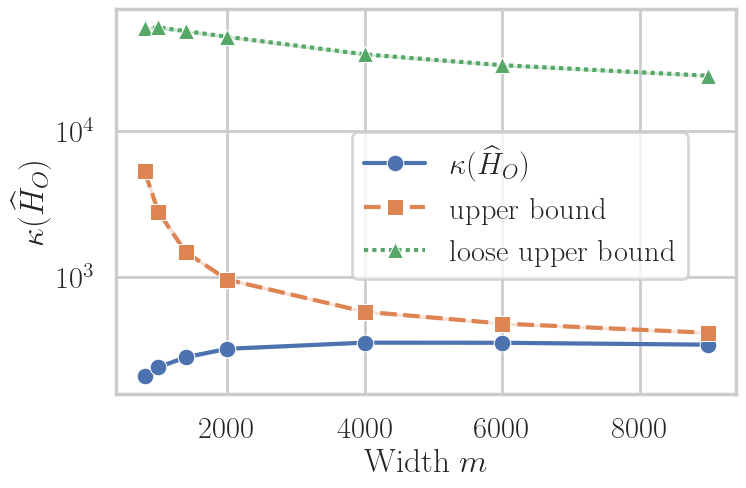

In [516]:
filename = 'Leaky_ReLU_MNIST_whitened_comparison_width'
title = ''
leg_loc = (0.38,0.3)

make_LeakyReLU_width_comparison(df_leakyrelu_MNIST, title, leg_loc=leg_loc, filename=filename, save=True)

In [517]:
file_name1 = 'outer_prod_hessian_information_initialization_experiments_LeakyReLU_Cifar10_whitened_num_init=3_n=500.pkl'
file_name2 = 'outer_prod_hessian_information_initialization_experiments_LeakyReLU_Cifar10_whitened_num_init=3_n=500_2.pkl'
file_name3 = 'outer_prod_hessian_information_initialization_experiments_LeakyReLU_Cifar10_whitened_num_init=3_n=500_3.pkl'

df1 = load_pandas_df(file_path, file_name1)
df2 = load_pandas_df(file_path, file_name2)
df3 = load_pandas_df(file_path, file_name3)

df_leakyrelu_Cifar10 = pd.concat([df1,df2,df3])

df_leakyrelu_Cifar10 = filter_bound_3_out(df_leakyrelu_Cifar10)

# df_lin = filter_bound_2_3_out(df)
df_leakyrelu_Cifar10


dataset network  cond_cov_xx  input_dim  output_dim  width  depth  \
0   cifar-10    FCNN          1.0       3072          10   1500    1.0   
1   cifar-10    FCNN          1.0       3072          10   1500    1.0   
2   cifar-10    FCNN          1.0       3072          10   1500    1.0   
3   cifar-10    FCNN          1.0       3072          10   1500    1.0   
4   cifar-10    FCNN          1.0       3072          10   1500    1.0   
..       ...     ...          ...        ...         ...    ...    ...   
13  cifar-10    FCNN          1.0       3072          10   9000    1.0   
14  cifar-10    FCNN          1.0       3072          10   9000    1.0   
15  cifar-10    FCNN          1.0       3072          10   9000    1.0   
16  cifar-10    FCNN          1.0       3072          10   9000    1.0   
17  cifar-10    FCNN          1.0       3072          10   9000    1.0   

       activ_f  epoch                     type         value  alpha  
0   leaky_relu    0.0  $\kappa(\widehat{H}_O)$     92.008260   0.01  
1   leaky_relu    0.0              upper bound   1370.904944   0.01  
2   leaky_relu    0.0        loose upper bound  24335.155472   0.01  
3   leaky_relu    0.0  $\kappa(\widehat{H}_O)$     89.480866   0.01  
4   leaky_relu    0.0              upper bound   1318.659116   0.01  
..         ...    ...                      ...           ...    ...  
13  leaky_relu    0.0              upper bound    418.497038   0.01  
14  leaky_relu    0.0        loose upper bound  20645.063362   0.01  
15  leaky_relu    0.0  $\kappa(\widehat{H}_O)$    229.666034   0.01  
16  leaky_relu    0.0              upper bound    417.662452   0.01  
17  leaky_relu    0.0        loose upper bound  20613.924831   0.01  

[72 rows x 12 columns]

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/1802687061.py:4: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  g = sns.lineplot(df, x='width', y='value', hue='type', style='type', markers=markers)


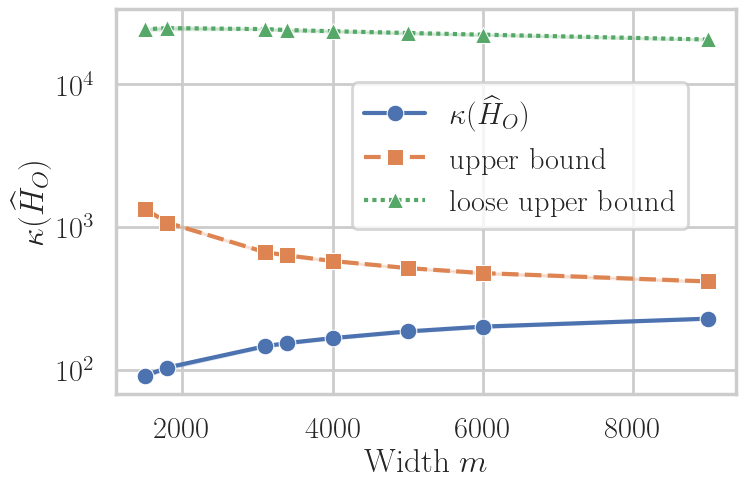

In [518]:
# sns.set(rc={'figure.figsize':(5,5)})

filename = 'Leaky_ReLU_Cifar10_whitened_comparison_width'
title = ''
leg_loc = (0.38,0.43)

make_LeakyReLU_width_comparison(df_leakyrelu_Cifar10, title, leg_loc, filename=filename, save=True)

##### Leaky ReLU 2

In [519]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_leakyReLU_alpha=0.0_num_init=3_MNIST_whitened_n=500_d=784_test2.pkl'
df1 = load_pandas_df(file_path, file_name)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_leakyReLU_alpha=0.1_num_init=3_MNIST_whitened_n=500_d=784_test2.pkl'
df2 = load_pandas_df(file_path, file_name)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_leakyReLU_alpha=0.3_num_init=3_MNIST_whitened_n=500_d=784_test2.pkl'
df3 = load_pandas_df(file_path, file_name)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_leakyReLU_alpha=0.5_num_init=3_MNIST_whitened_n=500_d=784_test2.pkl'
df4 = load_pandas_df(file_path, file_name)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_leakyReLU_alpha=1_num_init=3_MNIST_whitened_n=500_d=784_test2.pkl'
df5 = load_pandas_df(file_path, file_name)



df = pd.concat([df1,df2,df3,df4,df5])

df_leakyrelu_MNIST = filter_bound_2_3_out(df)
df_leakyrelu_MNIST = filter_bound_1_out(df_leakyrelu_MNIST)

df_leakyrelu_MNIST

dataset network  cond_cov_xx  input_dim  output_dim  width  depth  \
0   mnist    FCNN     1.000001        784          10   1000      1   
2   mnist    FCNN     1.000001        784          10   2000      1   
4   mnist    FCNN     1.000001        784          10   3000      1   
6   mnist    FCNN     1.000001        784          10   5000      1   
0   mnist    FCNN     1.000001        784          10   1000      1   
2   mnist    FCNN     1.000001        784          10   2000      1   
4   mnist    FCNN     1.000001        784          10   3000      1   
6   mnist    FCNN     1.000001        784          10   5000      1   
0   mnist    FCNN     1.000001        784          10   1000      1   
2   mnist    FCNN     1.000001        784          10   3000      1   
4   mnist    FCNN     1.000001        784          10   5000      1   
0   mnist    FCNN     1.000001        784          10   1000      1   
2   mnist    FCNN     1.000001        784          10   2000      1   
4   mnist    FCNN     1.000001        784          10   3000      1   
6   mnist    FCNN     1.000001        784          10   5000      1   
0   mnist    FCNN     1.000001        784          10   1000      1   
2   mnist    FCNN     1.000001        784          10   2000      1   
4   mnist    FCNN     1.000001        784          10   3000      1   
6   mnist    FCNN     1.000001        784          10   5000      1   

      activ_f  epoch                     type       value  alpha  
0  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  226.775087    0.0  
2  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  314.513344    0.0  
4  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  336.551848    0.0  
6  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  342.413045    0.0  
0  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  273.404196    0.1  
2  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  388.200894    0.1  
4  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  422.021649    0.1  
6  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  437.234961    0.1  
0  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  357.568951    0.3  
2  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  599.505456    0.3  
4  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  638.850725    0.3  
0  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  413.451529    0.5  
2  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  643.869408    0.5  
4  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  748.490275    0.5  
6  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  815.940614    0.5  
0  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  453.482545    1.0  
2  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  736.267794    1.0  
4  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  875.149262    1.0  
6  leaky_relu    0.0  $\kappa(\widehat{H}_O)$  997.065699    1.0

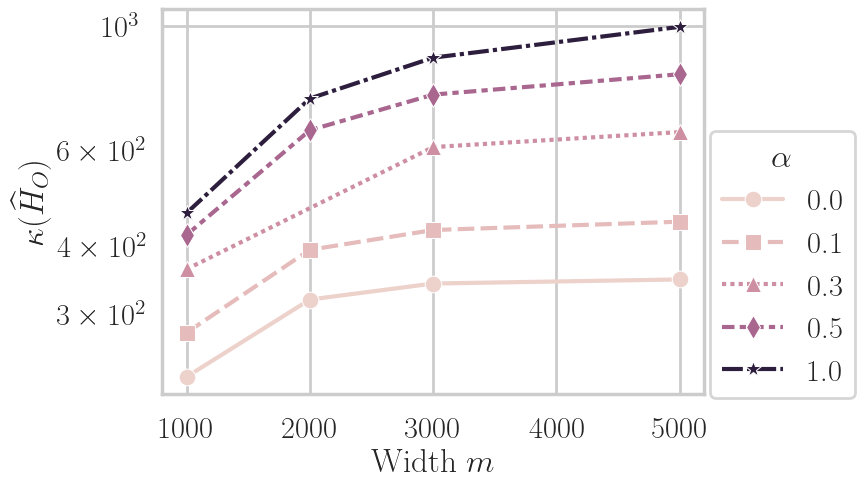

In [520]:
f = plt.figure(figsize=(7,5))
g = sns.lineplot(df_leakyrelu_MNIST, x='width', y='value', alpha = 1, hue='alpha', style='alpha', markers=markers)
g.set(yscale='log')
g.set_xlabel('Width $m$')
g.set_ylabel('$\kappa(\widehat{H}_O)$')

plt.legend(title=r'$\alpha$', loc=(1.01,-0.01))
plt.title(title)

# if save:
f.savefig('LeakyReLU_comparison_alpha.pdf', bbox_inches='tight')

### Training bimodal gaussian

In [521]:
file_name1 = 'outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_bimodal_gaussian_NOTwhitened_SGD_eta=0.002_d=50_k=1_n=2000_L=3_m=100.pkl'
file_name2 = 'outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_bimodal_gaussian_whitened_SGD_eta=0.002_d=50_k=1_n=2000_L=3_m=100.pkl'

df_trained_NOTwhitened = load_pandas_df(file_path, file_name1)
df_trained_whitened = load_pandas_df(file_path, file_name2)

# df_leakyrelu_Cifar10 = pd.concat([df1,df2,df3])

df_trained_NOTwhitened = filter_bound_2_3_out(df_trained_NOTwhitened)
df_trained_whitened = filter_bound_2_3_out(df_trained_whitened)

# df_lin = filter_bound_2_3_out(df)
# df_leakyrelu_Cifar10


In [522]:
# df_trained_NOTwhitened_fil

In [523]:
# # df_trained_NOTwhitened_fil = df_trained_NOTwhitened[df_trained_NOTwhitened['depth']==1]

# g = sns.relplot(df_trained_NOTwhitened_fil,x='epoch',y='value',col='width', row='depth', hue='type', style='type', markers=markers, markevery=15, kind='line')

# g.set_axis_labels('Epochs', '$\kappa(H_O)$')
# g.set_titles('Depth: {row_name} |  Width: {col_name}')

# g.fig.text(0.87, 0.9,'$\kappa(\Sigma)= %.2f$' %sigma, fontsize=24) #add text

# g.savefig('Condition_number_throughout_training_bimodal_gaussian_NOTwhit_d=50_n=2000_over_width.pdf')

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/798469625.py:4: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(df_trained_NOTwhitened_fil,x='epoch',y='value', hue='type', style='type', markers=markers, markevery=15)


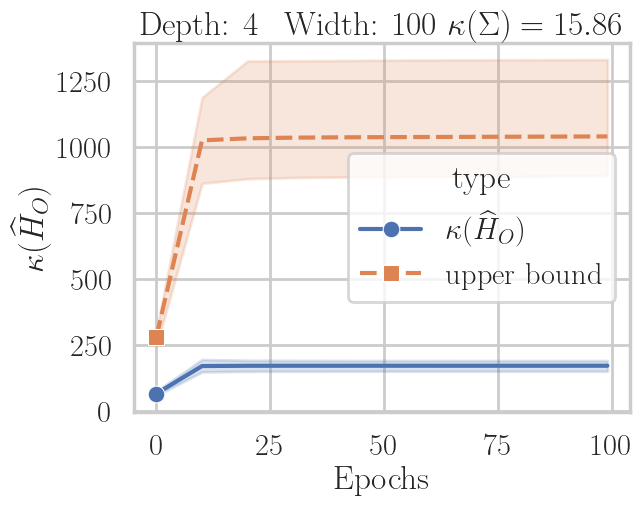

In [524]:
sigma = df_trained_NOTwhitened['cond_cov_xx'][0]
df_trained_NOTwhitened_fil = df_trained_NOTwhitened[df_trained_NOTwhitened['width']==100]

g = sns.lineplot(df_trained_NOTwhitened_fil,x='epoch',y='value', hue='type', style='type', markers=markers, markevery=15)

g.set_xlabel('Epochs')
g.set_ylabel('$\kappa(\widehat{H}_O)$')
g.set_title(r'Depth: 4 \, Width: 100 $\kappa(\Sigma)= %.2f$' %sigma)

# g.text(10, 10,'$\kappa(\Sigma)= %.2f$' %sigma, fontsize=24) #add text


plt.savefig('Condition_number_throughout_training_bimodal_gaussian_NOTwhit_d=50_n=2000.pdf', bbox_inches='tight')

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_69184/2386426447.py:2: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(df_trained_whitened,x='epoch',y='value', hue='type', style='type', markers=markers, markevery=15)


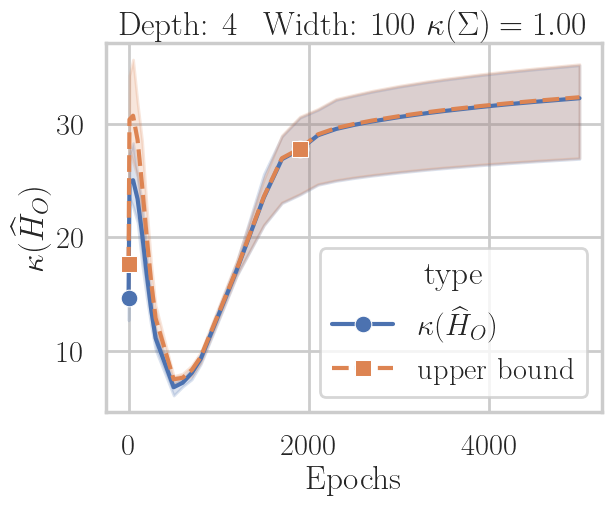

In [525]:
sigma = df_trained_whitened['cond_cov_xx'][0]
g = sns.lineplot(df_trained_whitened,x='epoch',y='value', hue='type', style='type', markers=markers, markevery=15)

g.set_xlabel('Epochs')
g.set_ylabel('$\kappa(\widehat{H}_O)$')
g.set_title(r'Depth: 4 \, Width: 100 $\kappa(\Sigma)= %.2f$' %sigma)

# g.text(10, 10,'$\kappa(\Sigma)= %.2f$' %sigma, fontsize=24) #add text


plt.savefig('Condition_number_throughout_training_bimodal_gaussian_whit_d=50_n=2000.pdf', bbox_inches='tight')

In [343]:
file_name1 = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_NOTwhitened_data.pkl'
file_name2 = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_whitened_data.pkl'

df_train_NOTwhitened = load_pandas_df(file_path, file_name1)
df_train_whitened = load_pandas_df(file_path, file_name2)

# df_leakyrelu_Cifar10 = pd.concat([df1,df2,df3])

# df_train_NOTwhitened = filter_bound_2_3_out(df_trained_NOTwhitened)
# df_train_whitened = filter_bound_2_3_out(df_trained_whitened)

# df_lin = filter_bound_2_3_out(df)
# df_leakyrelu_Cifar10
df_train_whitened

width  depth activ_f   epoch       loss  grad_norm_squared
0      100.0    3.0  linear     0.0   1.337310         938.543986
1      100.0    3.0  linear     0.0   1.337310        1005.096727
2      100.0    3.0  linear     0.0   2.296484        3770.468160
3      100.0    3.0  linear     0.0   5.656781       12511.578156
4      100.0    3.0  linear     0.0  15.085427       39840.748619
...      ...    ...     ...     ...        ...                ...
49996  100.0    3.0  linear  4999.0   0.087098           0.598556
49997  100.0    3.0  linear  4999.0   0.086419           0.974537
49998  100.0    3.0  linear  4999.0   0.087693           4.890523
49999  100.0    3.0  linear  4999.0   0.089969           8.123486
50000  100.0    3.0  linear  4999.0   0.090483          10.332487

[50001 rows x 6 columns]

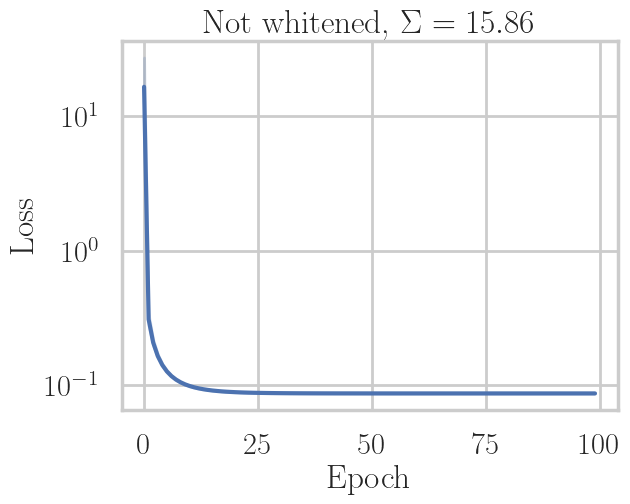

In [364]:
g = sns.lineplot(df_train_NOTwhitened, y='loss', x='epoch')
g.set(yscale='log')
g.set_title('Not whitened, $\Sigma=15.86$')
g.set_xlabel('Epoch')
g.set_ylabel('Loss')

plt.savefig('Training_loss_NOTwhitened.pdf', bbox_inches='tight')

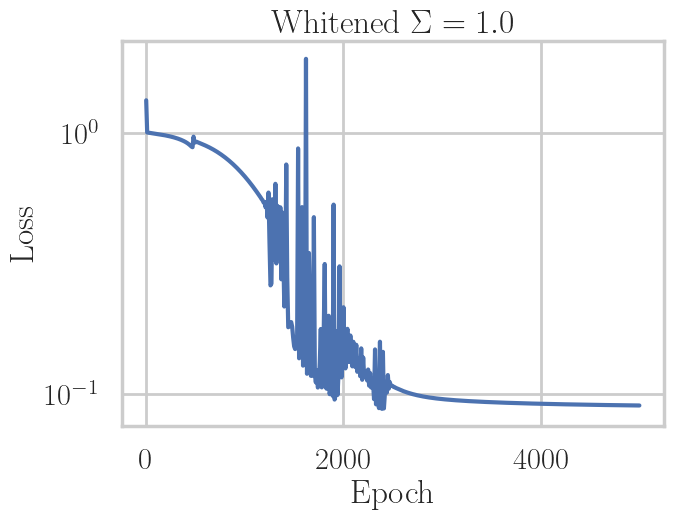

In [363]:
import numpy as np 
f = plt.figure(figsize=(7,5))
plt.semilogy(np.arange(0,5001,10),df_train_whitened['loss'][::100])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Whitened $\Sigma=1.0$')

plt.savefig('Training_loss_whitened.pdf', bbox_inches='tight')

#### Convex vs. Max Bound 

In [400]:
file_name = 'outer_prod_hessian_information_initialization_experiments_downsampled_MNIST_whitened_num_init=10_d=196_n=50000_convex_comb_vs_max_bound_fixed_width.pkl'
df_conv_vs_max = load_pandas_df(file_path, file_name)

df_conv_vs_max = df_conv_vs_max[df_conv_vs_max['type']== 'H_o_cond']

df_conv_vs_max['l'] += 1

In [401]:
df_conv_vs_max = df_conv_vs_max[df_conv_vs_max['width']==300]

In [402]:
alpha = df_conv_vs_max['alpha_l']
alpha
sum(alpha[0:1])

0.652645974060597

In [403]:
alpha[2:4]

6    0.732385
9    0.058340
Name: alpha_l, dtype: float64

In [404]:
sum(alpha[-24:-16])

0.49249287280407766

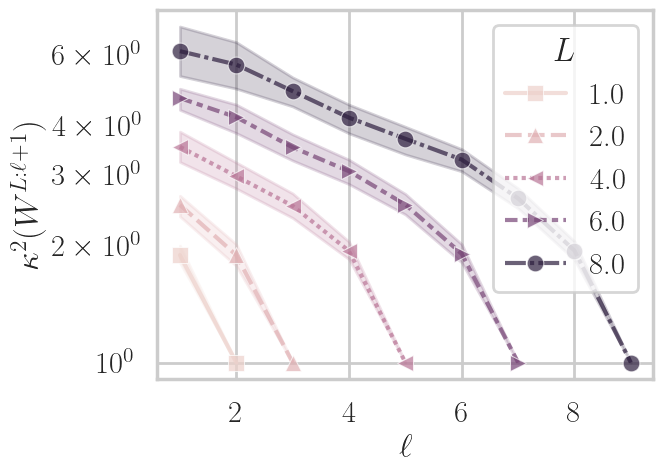

In [405]:
# f = plt.figure(figsize=(8,5))
g = sns.lineplot(df_conv_vs_max,x='l', y='kappa_1', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\kappa^2(W^{L:\ell+1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'kappa^2(W_L_ell+1).pdf', bbox_inches='tight')

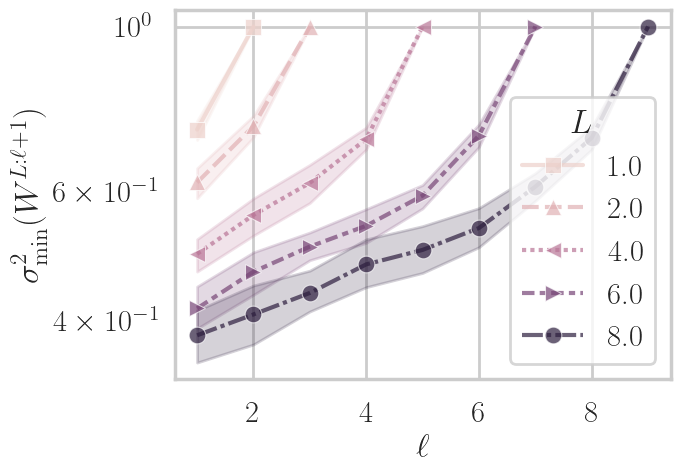

In [406]:
g = sns.lineplot(df_conv_vs_max,x='l', y='alpha_l1', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\sigma^2_{\min}(W^{L:\ell+1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'sigma^2_min(W_L_ell+1).pdf', bbox_inches='tight')

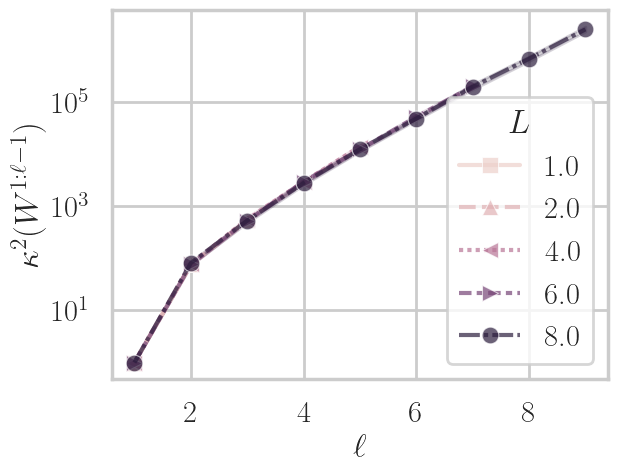

In [407]:
g = sns.lineplot(df_conv_vs_max,x='l', y='kappa_2', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\kappa^2(W^{1:\ell-1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'kappa^2(W_1_ell-1).pdf', bbox_inches='tight')

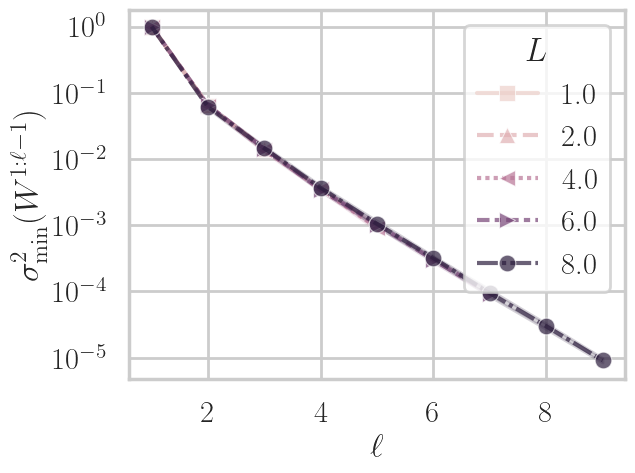

In [417]:
g = sns.lineplot(df_conv_vs_max,x='l', y='alpha_l2', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\sigma^2_{\min}(W^{1:\ell-1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'sigma^2_min(W_1_ell-1).pdf', bbox_inches='tight')

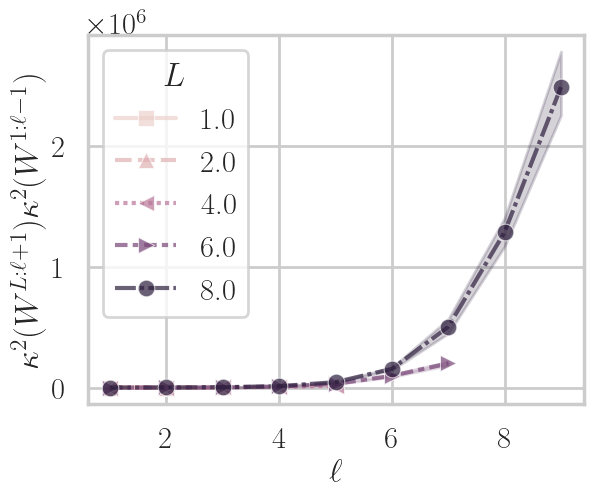

In [422]:
g = sns.lineplot(df_conv_vs_max,x='l', y='kappa', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\kappa^2(W^{L:\ell+1})\kappa^2(W^{1:\ell-1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'kappa^2(W_L_ell+1)kappa^2(W_1_ell-1).pdf', bbox_inches='tight')

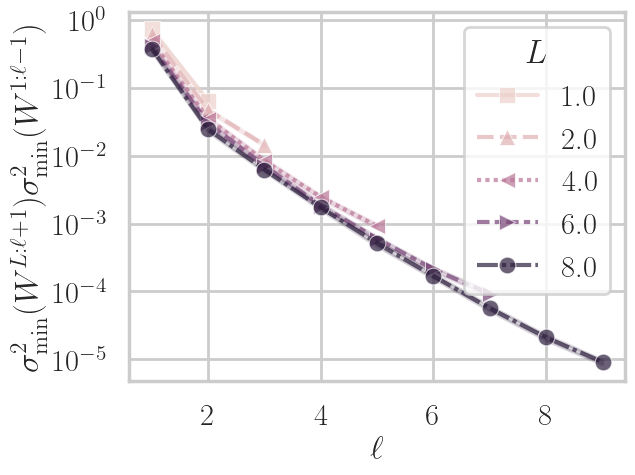

In [419]:
g = sns.lineplot(df_conv_vs_max,x='l', y='alpha_l', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\sigma^2_{\min}(W^{L:\ell+1})\sigma^2_{\min}(W^{1:\ell-1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'sigma^2_min(W_L:ell+1)sigma^2_min(W_1:ell-1).pdf', bbox_inches='tight')

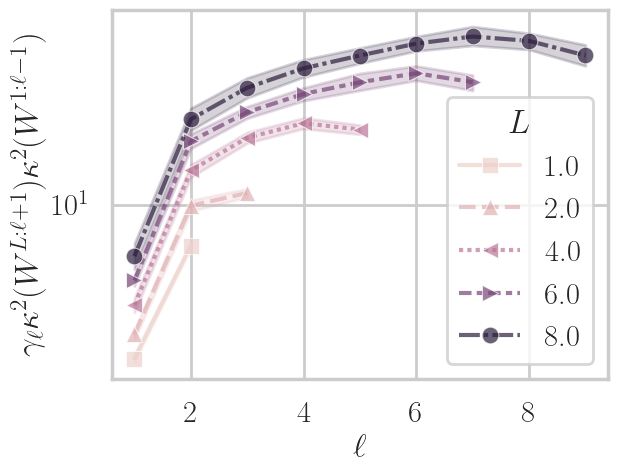

In [420]:
g = sns.lineplot(df_conv_vs_max,x='l', y='alpha_l*kappa/sum_alpha_l', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
# g.set_ylabel(r'$\frac$')
g.set_ylabel(r'$\gamma_{\ell} \kappa^2(W^{L:\ell+1}) \kappa^2(W^{1:\ell-1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'gamma_ell_kappa^2(W_L:ell+1)_kappa^2(W_1:ell-1).pdf', bbox_inches='tight')

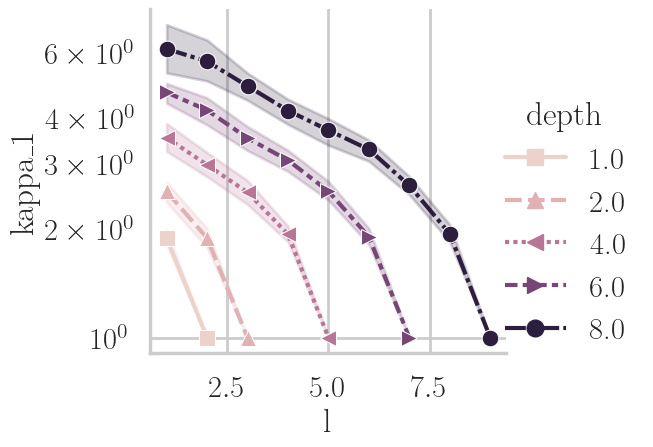

In [416]:
g = sns.relplot(df_conv_vs_max,x='l', y='kappa_1',hue='depth', kind='line', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

In [82]:
# df_resnet_1 = filter_bound_2_3_out(df_resnet_1)

# make_relplot_col_depth(df_resnet_1)

In [84]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_sqrt(L)_num_init=20.pkl'
df_resnet_1_sqrtL = load_pandas_df(file_path, file_name)
df_resnet_1_sqrtL

dataset               network  cond_cov_xx  input_dim  output_dim  \
0      mnist  lin_residual_network     1.000001      784.0        10.0   
1      mnist  lin_residual_network     1.000001      784.0        10.0   
2      mnist  lin_residual_network     1.000001      784.0        10.0   
3      mnist  lin_residual_network     1.000001      784.0        10.0   
4      mnist  lin_residual_network     1.000001      784.0        10.0   
...      ...                   ...          ...        ...         ...   
1595   mnist  lin_residual_network     1.000001      784.0        10.0   
1596   mnist  lin_residual_network     1.000001      784.0        10.0   
1597   mnist  lin_residual_network     1.000001      784.0        10.0   
1598   mnist  lin_residual_network     1.000001      784.0        10.0   
1599   mnist  lin_residual_network     1.000001      784.0        10.0   

       width  depth activ_f  epoch             type         value  
0      800.0    1.0  linear    0.0         H_o_cond  5.471584e+00  
1      800.0    1.0  linear    0.0  H_o_cond_bound1  5.471590e+00  
2      800.0    1.0  linear    0.0  H_o_cond_bound2  8.235655e+03  
3      800.0    1.0  linear    0.0  H_o_cond_bound3  3.785762e+01  
4      800.0    1.0  linear    0.0         H_o_cond  4.970114e+00  
...      ...    ...     ...    ...              ...           ...  
1595  1400.0    8.0  linear    0.0  H_o_cond_bound3  1.284422e+07  
1596  1400.0    8.0  linear    0.0         H_o_cond  1.343515e+02  
1597  1400.0    8.0  linear    0.0  H_o_cond_bound1  1.806891e+02  
1598  1400.0    8.0  linear    0.0  H_o_cond_bound2  2.715941e+05  
1599  1400.0    8.0  linear    0.0  H_o_cond_bound3  1.337669e+07  

[1600 rows x 11 columns]

In [85]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_L_num_init=20.pkl'
df_resnet_1_L = load_pandas_df(file_path, file_name)
df_resnet_1_L

dataset               network  cond_cov_xx  input_dim  output_dim  \
0      mnist  lin_residual_network     1.000001      784.0        10.0   
1      mnist  lin_residual_network     1.000001      784.0        10.0   
2      mnist  lin_residual_network     1.000001      784.0        10.0   
3      mnist  lin_residual_network     1.000001      784.0        10.0   
4      mnist  lin_residual_network     1.000001      784.0        10.0   
...      ...                   ...          ...        ...         ...   
1595   mnist  lin_residual_network     1.000001      784.0        10.0   
1596   mnist  lin_residual_network     1.000001      784.0        10.0   
1597   mnist  lin_residual_network     1.000001      784.0        10.0   
1598   mnist  lin_residual_network     1.000001      784.0        10.0   
1599   mnist  lin_residual_network     1.000001      784.0        10.0   

       width  depth activ_f  epoch             type         value  
0      800.0    1.0  linear    0.0         H_o_cond  5.471584e+00  
1      800.0    1.0  linear    0.0  H_o_cond_bound1  5.471590e+00  
2      800.0    1.0  linear    0.0  H_o_cond_bound2  8.235655e+03  
3      800.0    1.0  linear    0.0  H_o_cond_bound3  3.785762e+01  
4      800.0    1.0  linear    0.0         H_o_cond  4.970114e+00  
...      ...    ...     ...    ...              ...           ...  
1595  1400.0    8.0  linear    0.0  H_o_cond_bound3  6.831583e+07  
1596  1400.0    8.0  linear    0.0         H_o_cond  1.506606e+02  
1597  1400.0    8.0  linear    0.0  H_o_cond_bound1  1.999815e+02  
1598  1400.0    8.0  linear    0.0  H_o_cond_bound2  2.772655e+05  
1599  1400.0    8.0  linear    0.0  H_o_cond_bound3  7.166189e+07  

[1600 rows x 11 columns]

In [86]:
df_resnet_1.insert(2,'beta','1')
df_resnet_1_sqrtL.insert(2,'beta','1/sqrt(L)')
df_resnet_1_L.insert(2,'beta','1/L')

In [69]:
df_c = pd.concat([df_resnet_1,df_resnet_1_sqrtL,df_resnet_1_L])
df_c = filter_bound_2_3_out(df_c)

In [70]:
df_c

dataset               network beta  cond_cov_xx  input_dim  output_dim  \
0      mnist  lin_residual_network    1     1.000001      784.0        10.0   
1      mnist  lin_residual_network    1     1.000001      784.0        10.0   
4      mnist  lin_residual_network    1     1.000001      784.0        10.0   
5      mnist  lin_residual_network    1     1.000001      784.0        10.0   
8      mnist  lin_residual_network    1     1.000001      784.0        10.0   
...      ...                   ...  ...          ...        ...         ...   
1589   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1592   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1593   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1596   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1597   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   

       width  depth activ_f  epoch             type       value  
0      800.0    1.0  linear    0.0         H_o_cond    5.471584  
1      800.0    1.0  linear    0.0  H_o_cond_bound1    5.471590  
4      800.0    1.0  linear    0.0         H_o_cond    4.970114  
5      800.0    1.0  linear    0.0  H_o_cond_bound1    4.970119  
8      800.0    1.0  linear    0.0         H_o_cond    5.306767  
...      ...    ...     ...    ...              ...         ...  
1589  1400.0    8.0  linear    0.0  H_o_cond_bound1  201.917473  
1592  1400.0    8.0  linear    0.0         H_o_cond  119.040728  
1593  1400.0    8.0  linear    0.0  H_o_cond_bound1  163.163764  
1596  1400.0    8.0  linear    0.0         H_o_cond  150.660572  
1597  1400.0    8.0  linear    0.0  H_o_cond_bound1  199.981497  

[2400 rows x 12 columns]

In [87]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_LinNet_num_init=20.pkl'
df_linnet = load_pandas_df(file_path, file_name)
df_linnet

dataset     network  cond_cov_xx  input_dim  output_dim   width  depth  \
0      mnist  sequential     1.000001      784.0        10.0   800.0    1.0   
1      mnist  sequential     1.000001      784.0        10.0   800.0    1.0   
2      mnist  sequential     1.000001      784.0        10.0   800.0    1.0   
3      mnist  sequential     1.000001      784.0        10.0   800.0    1.0   
4      mnist  sequential     1.000001      784.0        10.0   800.0    1.0   
...      ...         ...          ...        ...         ...     ...    ...   
1595   mnist  sequential     1.000001      784.0        10.0  1400.0    8.0   
1596   mnist  sequential     1.000001      784.0        10.0  1400.0    8.0   
1597   mnist  sequential     1.000001      784.0        10.0  1400.0    8.0   
1598   mnist  sequential     1.000001      784.0        10.0  1400.0    8.0   
1599   mnist  sequential     1.000001      784.0        10.0  1400.0    8.0   

     activ_f  epoch             type         value  
0     linear    0.0         H_o_cond  6.587534e+00  
1     linear    0.0  H_o_cond_bound1  6.587542e+00  
2     linear    0.0  H_o_cond_bound2  2.535511e+04  
3     linear    0.0  H_o_cond_bound3  6.587542e+00  
4     linear    0.0         H_o_cond  6.407954e+00  
...      ...    ...              ...           ...  
1595  linear    0.0  H_o_cond_bound3  2.720125e+08  
1596  linear    0.0         H_o_cond  1.365152e+02  
1597  linear    0.0  H_o_cond_bound1  1.953731e+02  
1598  linear    0.0  H_o_cond_bound2  3.269371e+05  
1599  linear    0.0  H_o_cond_bound3  2.969100e+08  

[1600 rows x 11 columns]

In [88]:
df_linnet.insert(2,'beta','-')

In [89]:
df_c = pd.concat([df_resnet_1,df_resnet_1_sqrtL,df_resnet_1_L,df_linnet])
df_c = filter_bound_2_3_out(df_c)

In [90]:
df_c

dataset               network beta  cond_cov_xx  input_dim  output_dim  \
0      mnist  lin_residual_network    1     1.000001      784.0        10.0   
1      mnist  lin_residual_network    1     1.000001      784.0        10.0   
4      mnist  lin_residual_network    1     1.000001      784.0        10.0   
5      mnist  lin_residual_network    1     1.000001      784.0        10.0   
8      mnist  lin_residual_network    1     1.000001      784.0        10.0   
...      ...                   ...  ...          ...        ...         ...   
1589   mnist            sequential    -     1.000001      784.0        10.0   
1592   mnist            sequential    -     1.000001      784.0        10.0   
1593   mnist            sequential    -     1.000001      784.0        10.0   
1596   mnist            sequential    -     1.000001      784.0        10.0   
1597   mnist            sequential    -     1.000001      784.0        10.0   

       width  depth activ_f  epoch             type       value  
0      800.0    1.0  linear    0.0         H_o_cond    5.471584  
1      800.0    1.0  linear    0.0  H_o_cond_bound1    5.471590  
4      800.0    1.0  linear    0.0         H_o_cond    4.970114  
5      800.0    1.0  linear    0.0  H_o_cond_bound1    4.970119  
8      800.0    1.0  linear    0.0         H_o_cond    5.306767  
...      ...    ...     ...    ...              ...         ...  
1589  1400.0    8.0  linear    0.0  H_o_cond_bound1  214.119554  
1592  1400.0    8.0  linear    0.0         H_o_cond  139.222087  
1593  1400.0    8.0  linear    0.0  H_o_cond_bound1  192.370263  
1596  1400.0    8.0  linear    0.0         H_o_cond  136.515225  
1597  1400.0    8.0  linear    0.0  H_o_cond_bound1  195.373114  

[3200 rows x 12 columns]

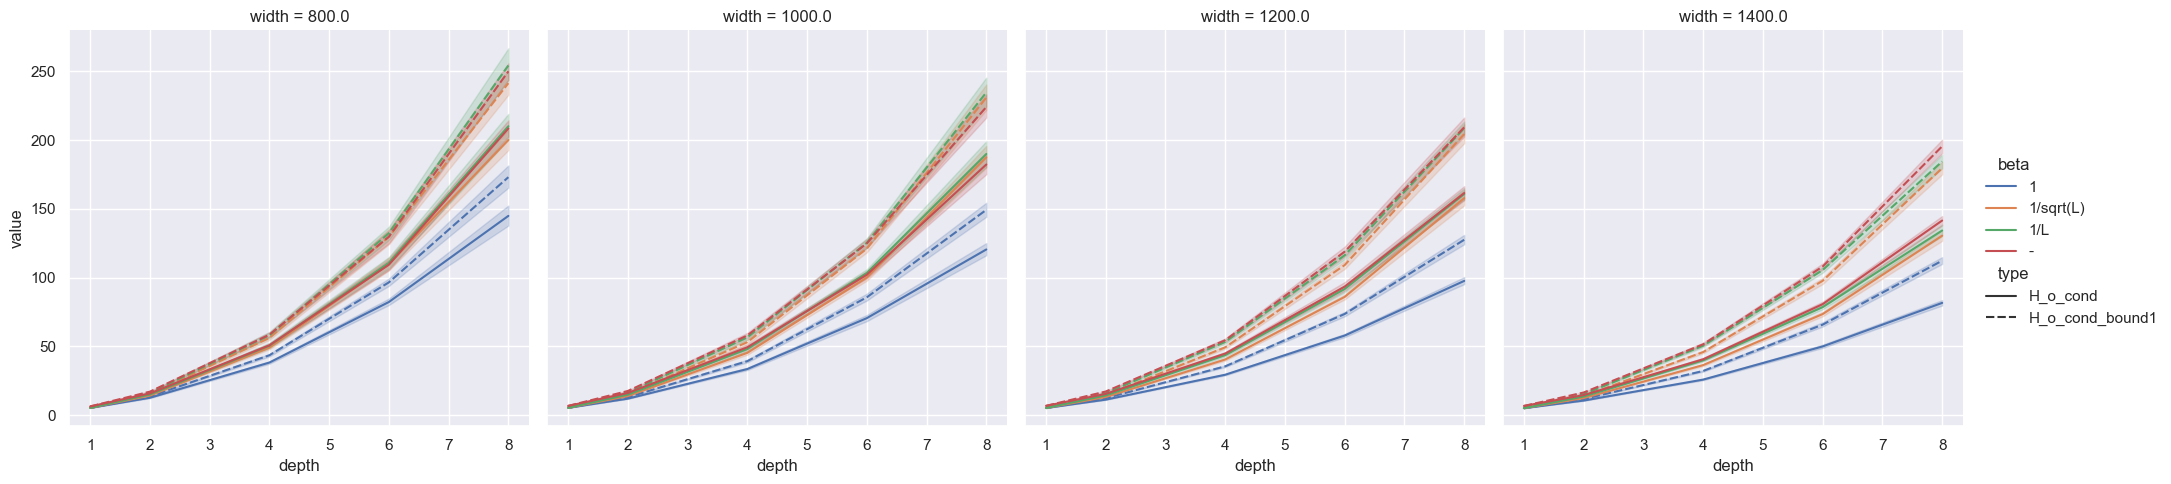

In [91]:
sns.relplot(df_c, x='depth', y='value', col='width', style='type', hue='beta', kind='line')

In [109]:
filename = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_LinNet_num_init=3.pkl'
df_linnet = load_pandas_df(file_path, filename)
df_linnet
# df_resnet_1_L = load_pandas_df(file_path, file_name_mnist_whitened_resnet_1_L)

dataset     network  cond_cov_xx  input_dim  output_dim   width  depth  \
0    cifar-10  sequential          1.0     3072.0        10.0  1500.0    1.0   
1    cifar-10  sequential          1.0     3072.0        10.0  1500.0    1.0   
2    cifar-10  sequential          1.0     3072.0        10.0  1500.0    1.0   
3    cifar-10  sequential          1.0     3072.0        10.0  1500.0    1.0   
4    cifar-10  sequential          1.0     3072.0        10.0  1500.0    1.0   
..        ...         ...          ...        ...         ...     ...    ...   
235  cifar-10  sequential          1.0     3072.0        10.0  3400.0    8.0   
236  cifar-10  sequential          1.0     3072.0        10.0  3400.0    8.0   
237  cifar-10  sequential          1.0     3072.0        10.0  3400.0    8.0   
238  cifar-10  sequential          1.0     3072.0        10.0  3400.0    8.0   
239  cifar-10  sequential          1.0     3072.0        10.0  3400.0    8.0   

    activ_f  epoch             type         value  
0    linear    0.0         H_o_cond  4.608356e+00  
1    linear    0.0  H_o_cond_bound1  4.608356e+00  
2    linear    0.0  H_o_cond_bound2  1.346225e+19  
3    linear    0.0  H_o_cond_bound3  4.160955e+00  
4    linear    0.0         H_o_cond  4.515629e+00  
..      ...    ...              ...           ...  
235  linear    0.0  H_o_cond_bound3  7.420331e+17  
236  linear    0.0         H_o_cond  1.267879e+02  
237  linear    0.0  H_o_cond_bound1  1.517927e+02  
238  linear    0.0  H_o_cond_bound2  5.785156e+11  
239  linear    0.0  H_o_cond_bound3  7.291047e+17  

[240 rows x 11 columns]

In [110]:
filename = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_ResNet_beta=1_num_init=3.pkl'
df_resnet_1 = load_pandas_df(file_path, filename)
df_resnet_1

dataset               network  cond_cov_xx  input_dim  output_dim  \
0    cifar-10  lin_residual_network          1.0     3072.0        10.0   
1    cifar-10  lin_residual_network          1.0     3072.0        10.0   
2    cifar-10  lin_residual_network          1.0     3072.0        10.0   
3    cifar-10  lin_residual_network          1.0     3072.0        10.0   
4    cifar-10  lin_residual_network          1.0     3072.0        10.0   
..        ...                   ...          ...        ...         ...   
235  cifar-10  lin_residual_network          1.0     3072.0        10.0   
236  cifar-10  lin_residual_network          1.0     3072.0        10.0   
237  cifar-10  lin_residual_network          1.0     3072.0        10.0   
238  cifar-10  lin_residual_network          1.0     3072.0        10.0   
239  cifar-10  lin_residual_network          1.0     3072.0        10.0   

      width  depth activ_f  epoch             type         value  
0    1500.0    1.0  linear    0.0         H_o_cond  4.085157e+00  
1    1500.0    1.0  linear    0.0  H_o_cond_bound1  4.085157e+00  
2    1500.0    1.0  linear    0.0  H_o_cond_bound2  4.634623e+19  
3    1500.0    1.0  linear    0.0  H_o_cond_bound3  2.933052e+01  
4    1500.0    1.0  linear    0.0         H_o_cond  4.107525e+00  
..      ...    ...     ...    ...              ...           ...  
235  3400.0    8.0  linear    0.0  H_o_cond_bound3  5.241715e+08  
236  3400.0    8.0  linear    0.0         H_o_cond  9.666667e+01  
237  3400.0    8.0  linear    0.0  H_o_cond_bound1  1.153324e+02  
238  3400.0    8.0  linear    0.0  H_o_cond_bound2  8.177722e+08  
239  3400.0    8.0  linear    0.0  H_o_cond_bound3  5.390670e+08  

[240 rows x 11 columns]

In [111]:
filename = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_ResNet_beta=1_L_num_init=3.pkl'
df_resnet_1_L = load_pandas_df(file_path, filename)
df_resnet_1_L

dataset               network  cond_cov_xx  input_dim  output_dim  \
0    cifar-10  lin_residual_network          1.0     3072.0        10.0   
1    cifar-10  lin_residual_network          1.0     3072.0        10.0   
2    cifar-10  lin_residual_network          1.0     3072.0        10.0   
3    cifar-10  lin_residual_network          1.0     3072.0        10.0   
4    cifar-10  lin_residual_network          1.0     3072.0        10.0   
..        ...                   ...          ...        ...         ...   
235  cifar-10  lin_residual_network          1.0     3072.0        10.0   
236  cifar-10  lin_residual_network          1.0     3072.0        10.0   
237  cifar-10  lin_residual_network          1.0     3072.0        10.0   
238  cifar-10  lin_residual_network          1.0     3072.0        10.0   
239  cifar-10  lin_residual_network          1.0     3072.0        10.0   

      width  depth activ_f  epoch             type         value  
0    1500.0    1.0  linear    0.0         H_o_cond  4.085157e+00  
1    1500.0    1.0  linear    0.0  H_o_cond_bound1  4.085157e+00  
2    1500.0    1.0  linear    0.0  H_o_cond_bound2  4.634623e+19  
3    1500.0    1.0  linear    0.0  H_o_cond_bound3  2.933052e+01  
4    1500.0    1.0  linear    0.0         H_o_cond  4.107525e+00  
..      ...    ...     ...    ...              ...           ...  
235  3400.0    8.0  linear    0.0  H_o_cond_bound3  5.653050e+14  
236  3400.0    8.0  linear    0.0         H_o_cond  1.345880e+02  
237  3400.0    8.0  linear    0.0  H_o_cond_bound1  1.605542e+02  
238  3400.0    8.0  linear    0.0  H_o_cond_bound2  5.184787e+11  
239  3400.0    8.0  linear    0.0  H_o_cond_bound3  5.900597e+14  

[240 rows x 11 columns]

In [112]:
filename = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_ResNet_beta=1_sqrt(L)_num_init=3.pkl'
df_resnet_1_sqrtL = load_pandas_df(file_path, filename)
df_resnet_1_sqrtL

dataset               network  cond_cov_xx  input_dim  output_dim  \
0    cifar-10  lin_residual_network          1.0     3072.0        10.0   
1    cifar-10  lin_residual_network          1.0     3072.0        10.0   
2    cifar-10  lin_residual_network          1.0     3072.0        10.0   
3    cifar-10  lin_residual_network          1.0     3072.0        10.0   
4    cifar-10  lin_residual_network          1.0     3072.0        10.0   
..        ...                   ...          ...        ...         ...   
235  cifar-10  lin_residual_network          1.0     3072.0        10.0   
236  cifar-10  lin_residual_network          1.0     3072.0        10.0   
237  cifar-10  lin_residual_network          1.0     3072.0        10.0   
238  cifar-10  lin_residual_network          1.0     3072.0        10.0   
239  cifar-10  lin_residual_network          1.0     3072.0        10.0   

      width  depth activ_f  epoch             type         value  
0    1500.0    1.0  linear    0.0         H_o_cond  4.085157e+00  
1    1500.0    1.0  linear    0.0  H_o_cond_bound1  4.085157e+00  
2    1500.0    1.0  linear    0.0  H_o_cond_bound2  4.634623e+19  
3    1500.0    1.0  linear    0.0  H_o_cond_bound3  2.933052e+01  
4    1500.0    1.0  linear    0.0         H_o_cond  4.107525e+00  
..      ...    ...     ...    ...              ...           ...  
235  3400.0    8.0  linear    0.0  H_o_cond_bound3  1.203262e+12  
236  3400.0    8.0  linear    0.0         H_o_cond  1.358683e+02  
237  3400.0    8.0  linear    0.0  H_o_cond_bound1  1.608353e+02  
238  3400.0    8.0  linear    0.0  H_o_cond_bound2  5.341428e+11  
239  3400.0    8.0  linear    0.0  H_o_cond_bound3  1.249558e+12  

[240 rows x 11 columns]

In [113]:
df_resnet_1.insert(2,'beta','1')
df_resnet_1_sqrtL.insert(2,'beta','1/sqrt(L)')
df_resnet_1_L.insert(2,'beta','1/L')
df_linnet.insert(2,'beta','-')

In [114]:
df_cifar10 = pd.concat([df_resnet_1,df_resnet_1_sqrtL,df_resnet_1_L,df_linnet])

In [117]:
df_cifar10 = filter_bound_2_3_out(df_cifar10)

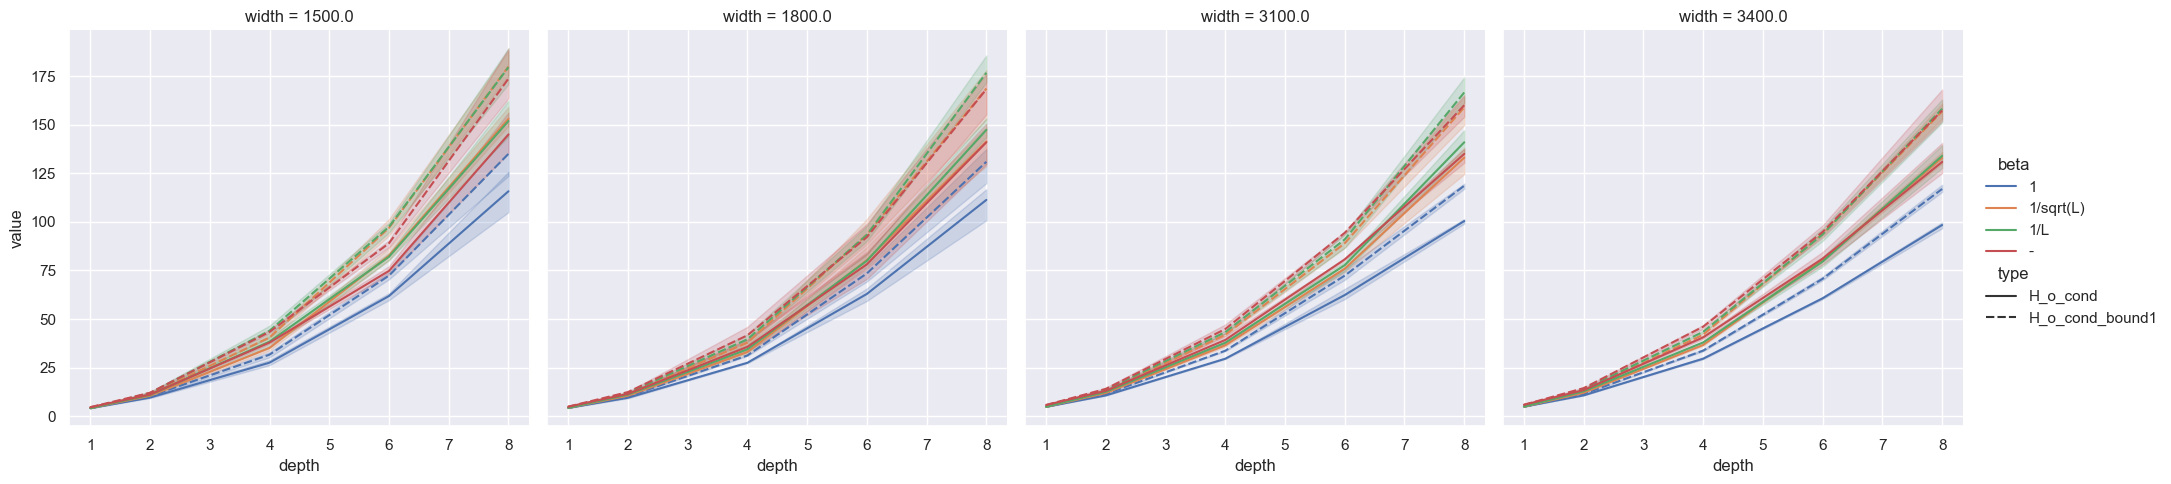

In [118]:
g = sns.relplot(data=df_cifar10, x="depth", y="value", style="type", hue='beta', col="width", kind='line')


In [120]:
filename = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_NOTwhitened_ResNet_beta=1_num_init=3.pkl'
df_tmp = load_pandas_df(file_path, filename)
df_tmp

dataset               network   cond_cov_xx  input_dim  output_dim  \
0      mnist  lin_residual_network  4.098971e+10      784.0        10.0   
1      mnist  lin_residual_network  4.098971e+10      784.0        10.0   
2      mnist  lin_residual_network  4.098971e+10      784.0        10.0   
3      mnist  lin_residual_network  4.098971e+10      784.0        10.0   
4      mnist  lin_residual_network  4.098971e+10      784.0        10.0   
...      ...                   ...           ...        ...         ...   
1595   mnist  lin_residual_network  4.098971e+10      784.0        10.0   
1596   mnist  lin_residual_network  4.098971e+10      784.0        10.0   
1597   mnist  lin_residual_network  4.098971e+10      784.0        10.0   
1598   mnist  lin_residual_network  4.098971e+10      784.0        10.0   
1599   mnist  lin_residual_network  4.098971e+10      784.0        10.0   

       width  depth activ_f  epoch             type         value  
0      800.0    1.0  linear    0.0         H_o_cond  6.446947e+05  
1      800.0    1.0  linear    0.0  H_o_cond_bound1  2.242787e+11  
2      800.0    1.0  linear    0.0  H_o_cond_bound2  3.375767e+14  
3      800.0    1.0  linear    0.0  H_o_cond_bound3  1.551771e+12  
4      800.0    1.0  linear    0.0         H_o_cond  6.609609e+05  
...      ...    ...     ...    ...              ...           ...  
1595  1400.0    8.0  linear    0.0  H_o_cond_bound3  3.178691e+16  
1596  1400.0    8.0  linear    0.0         H_o_cond  3.778705e+05  
1597  1400.0    8.0  linear    0.0  H_o_cond_bound1  4.707944e+12  
1598  1400.0    8.0  linear    0.0  H_o_cond_bound2  1.248316e+15  
1599  1400.0    8.0  linear    0.0  H_o_cond_bound3  3.252207e+16  

[1600 rows x 11 columns]

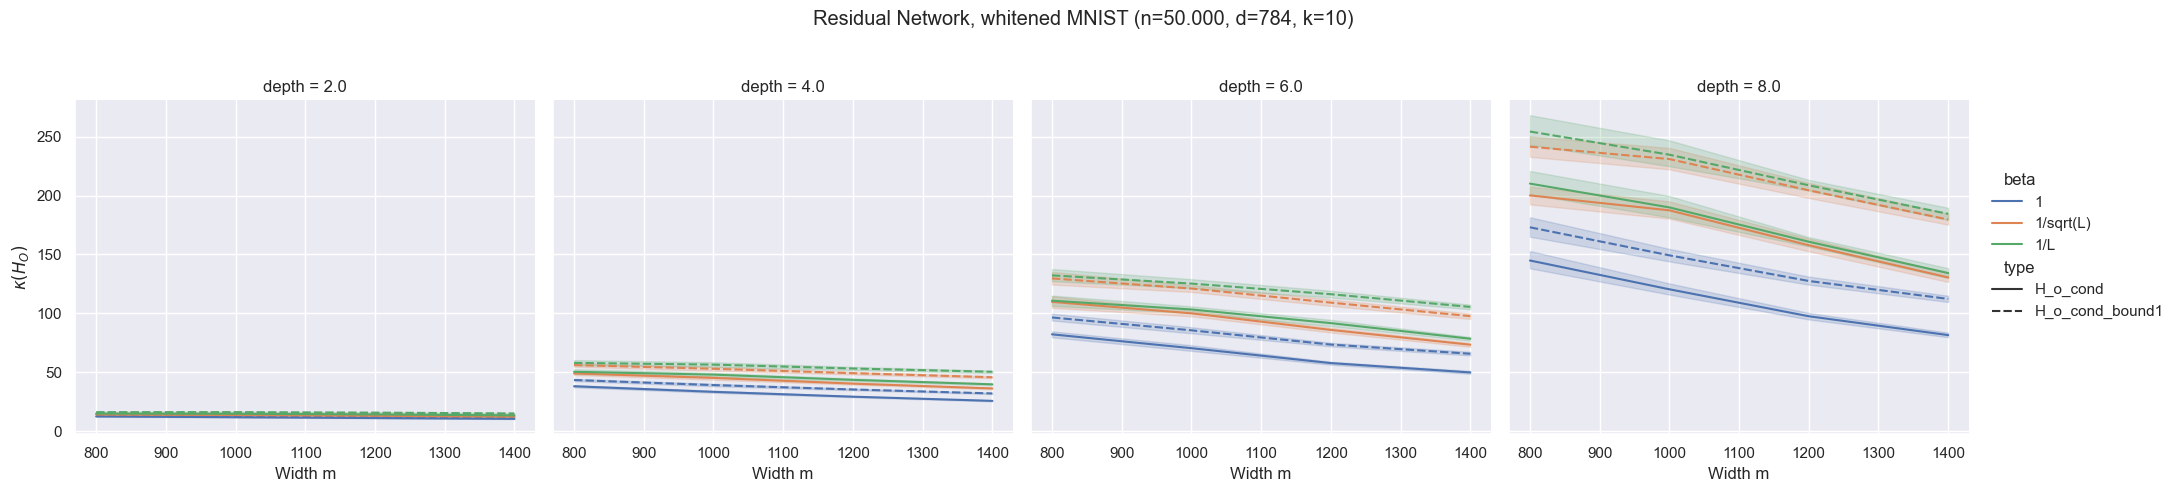

In [264]:
g = sns.relplot(data=df_resnet[df_resnet['depth']!= 1], x="width", y="value", style="type", hue='beta', col="depth", kind='line')
# g.set(yscale='log')
g.set_axis_labels('Width m','$\kappa(H_O)$')
# g.set(ylim=[1,10e16])

g.fig.suptitle(r'Residual Network, whitened MNIST (n=50.000, d=784, k=10)')
g.fig.subplots_adjust(top=0.8)

g.fig.savefig('Residualnet_whitened_MNIST_comparison_beta_depth.pdf')

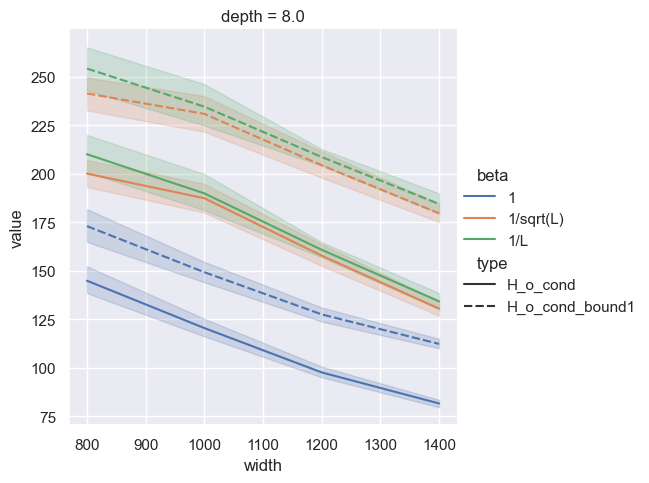

In [265]:
g = sns.relplot(data=df_resnet[df_resnet['depth']==8], x="width", y="value", style="type", hue='beta', col="depth", kind='line')
# g.set(yscale='log')

In [92]:
file_name_mnist_whitened_linnet = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_tightness_of_L_layer_condnum_bounds_MNIST_whitened_LinNet_num_init=20.pkl'

file_name_mnist_whitened_resnet_1 = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_L_num_init=20.pkl'

file_name_mnist_whitened_resnet_1 = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_num_init=20.pkl'

In [93]:
file = file_path + '/' + file_name_mnist_whitened_linnet

df_linnet_1 = pd.read_pickle(file)

file = file_path + '/' + file_name_mnist_whitened_resnet_1
df_resnet_1 = pd.read_pickle(file)

file = file_path + '/' + file_name_mnist_whitened_resnet_1_L
df_resnet_1_L = pd.read_pickle(file)

In [94]:
df_linnet_1 = df_linnet_1[df_linnet_1['type'] != 'H_o_cond_bound2']
df_linnet_1 = df_linnet_1[df_linnet_1['type'] != 'H_o_cond_bound3']

df_resnet_1 = df_resnet_1[df_resnet_1['type'] != 'H_o_cond_bound2']
df_resnet_1 = df_resnet_1[df_resnet_1['type'] != 'H_o_cond_bound3']

df_resnet_1_L = df_resnet_1_L[df_resnet_1_L['type'] != 'H_o_cond_bound2']
df_resnet_1_L = df_resnet_1_L[df_resnet_1_L['type'] != 'H_o_cond_bound3']

In [95]:
df_linnet_1.insert(2,'beta','-')
df_resnet_1.insert(2,'beta','1')
df_resnet_1_L.insert(2,'beta','1/L')

In [104]:
df_networks = pd.concat([df_linnet_1,df_resnet_1])

In [105]:
df_networks

dataset               network beta  cond_cov_xx  input_dim  output_dim  \
0      mnist            sequential    -     1.000001      784.0        10.0   
1      mnist            sequential    -     1.000001      784.0        10.0   
4      mnist            sequential    -     1.000001      784.0        10.0   
5      mnist            sequential    -     1.000001      784.0        10.0   
8      mnist            sequential    -     1.000001      784.0        10.0   
...      ...                   ...  ...          ...        ...         ...   
1589   mnist  lin_residual_network    1     1.000001      784.0        10.0   
1592   mnist  lin_residual_network    1     1.000001      784.0        10.0   
1593   mnist  lin_residual_network    1     1.000001      784.0        10.0   
1596   mnist  lin_residual_network    1     1.000001      784.0        10.0   
1597   mnist  lin_residual_network    1     1.000001      784.0        10.0   

       width  depth activ_f  epoch             type       value  
0      800.0    1.0  linear    0.0         H_o_cond    6.587534  
1      800.0    1.0  linear    0.0  H_o_cond_bound1    6.587542  
4      800.0    1.0  linear    0.0         H_o_cond    6.407954  
5      800.0    1.0  linear    0.0  H_o_cond_bound1    6.407962  
8      800.0    1.0  linear    0.0         H_o_cond    6.433465  
...      ...    ...     ...    ...              ...         ...  
1589  1400.0    8.0  linear    0.0  H_o_cond_bound1  116.464753  
1592  1400.0    8.0  linear    0.0         H_o_cond   83.413876  
1593  1400.0    8.0  linear    0.0  H_o_cond_bound1  114.721424  
1596  1400.0    8.0  linear    0.0         H_o_cond   82.524356  
1597  1400.0    8.0  linear    0.0  H_o_cond_bound1  114.856845  

[1600 rows x 12 columns]

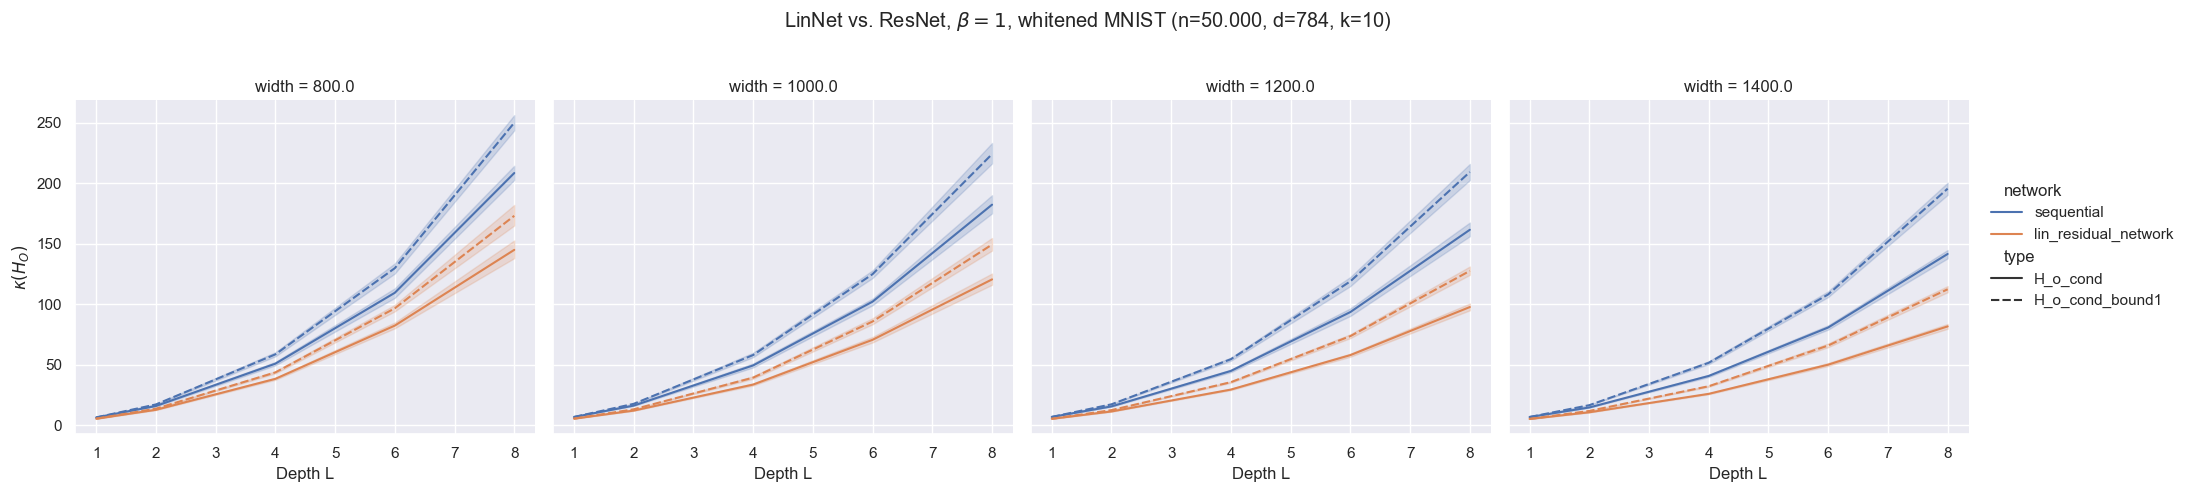

In [106]:
g = sns.relplot(data=df_networks, x="depth", y="value", style="type", hue='network', col="width", kind='line')
# g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
# g.set(ylim=[1,10e16])

g.fig.suptitle(r'LinNet vs. ResNet, $\beta=1$, whitened MNIST (n=50.000, d=784, k=10)')
g.fig.subplots_adjust(top=0.8)

g.fig.savefig('LinNet_vs_Resnet_beta=1_whitened_MNIST.pdf')

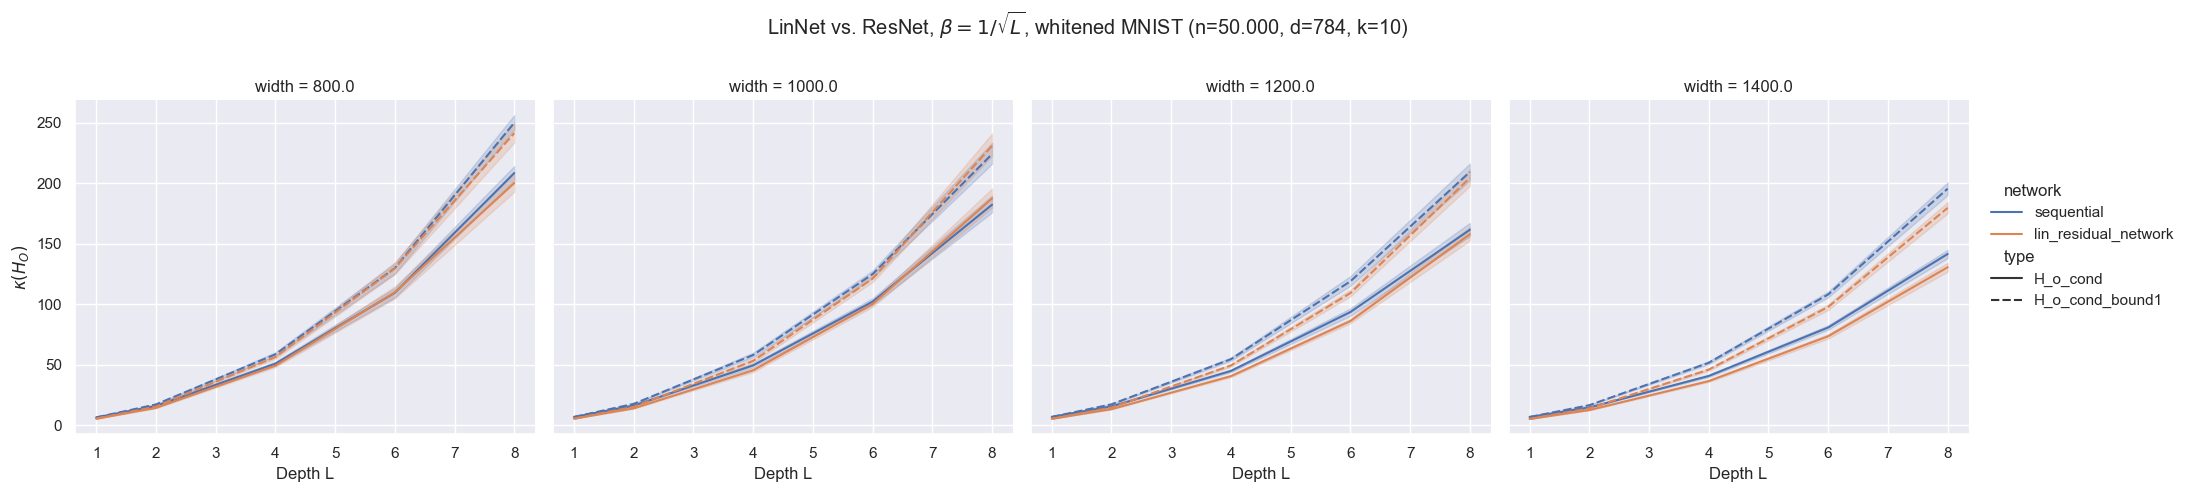

In [107]:
df_networks = pd.concat([df_linnet_1,df_resnet_1_sqrtL])

g = sns.relplot(data=df_networks, x="depth", y="value", style="type", hue='network', col="width", kind='line')
# g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
# g.set(ylim=[1,10e16])

g.fig.suptitle(r'LinNet vs. ResNet, $\beta=1/\sqrt{L}$, whitened MNIST (n=50.000, d=784, k=10)')
g.fig.subplots_adjust(top=0.8)

g.fig.savefig('LinNet_vs_Resnet_beta=1_sqrt(L)_whitened_MNIST.pdf')

In [110]:
df_linnet_1

dataset     network beta  cond_cov_xx  input_dim  output_dim   width  \
0      mnist  sequential    -     1.000001      784.0        10.0   800.0   
1      mnist  sequential    -     1.000001      784.0        10.0   800.0   
4      mnist  sequential    -     1.000001      784.0        10.0   800.0   
5      mnist  sequential    -     1.000001      784.0        10.0   800.0   
8      mnist  sequential    -     1.000001      784.0        10.0   800.0   
...      ...         ...  ...          ...        ...         ...     ...   
1589   mnist  sequential    -     1.000001      784.0        10.0  1400.0   
1592   mnist  sequential    -     1.000001      784.0        10.0  1400.0   
1593   mnist  sequential    -     1.000001      784.0        10.0  1400.0   
1596   mnist  sequential    -     1.000001      784.0        10.0  1400.0   
1597   mnist  sequential    -     1.000001      784.0        10.0  1400.0   

      depth activ_f  epoch             type       value  
0       1.0  linear    0.0         H_o_cond    6.587534  
1       1.0  linear    0.0  H_o_cond_bound1    6.587542  
4       1.0  linear    0.0         H_o_cond    6.407954  
5       1.0  linear    0.0  H_o_cond_bound1    6.407962  
8       1.0  linear    0.0         H_o_cond    6.433465  
...     ...     ...    ...              ...         ...  
1589    8.0  linear    0.0  H_o_cond_bound1  214.119554  
1592    8.0  linear    0.0         H_o_cond  139.222087  
1593    8.0  linear    0.0  H_o_cond_bound1  192.370263  
1596    8.0  linear    0.0         H_o_cond  136.515225  
1597    8.0  linear    0.0  H_o_cond_bound1  195.373114  

[800 rows x 12 columns]

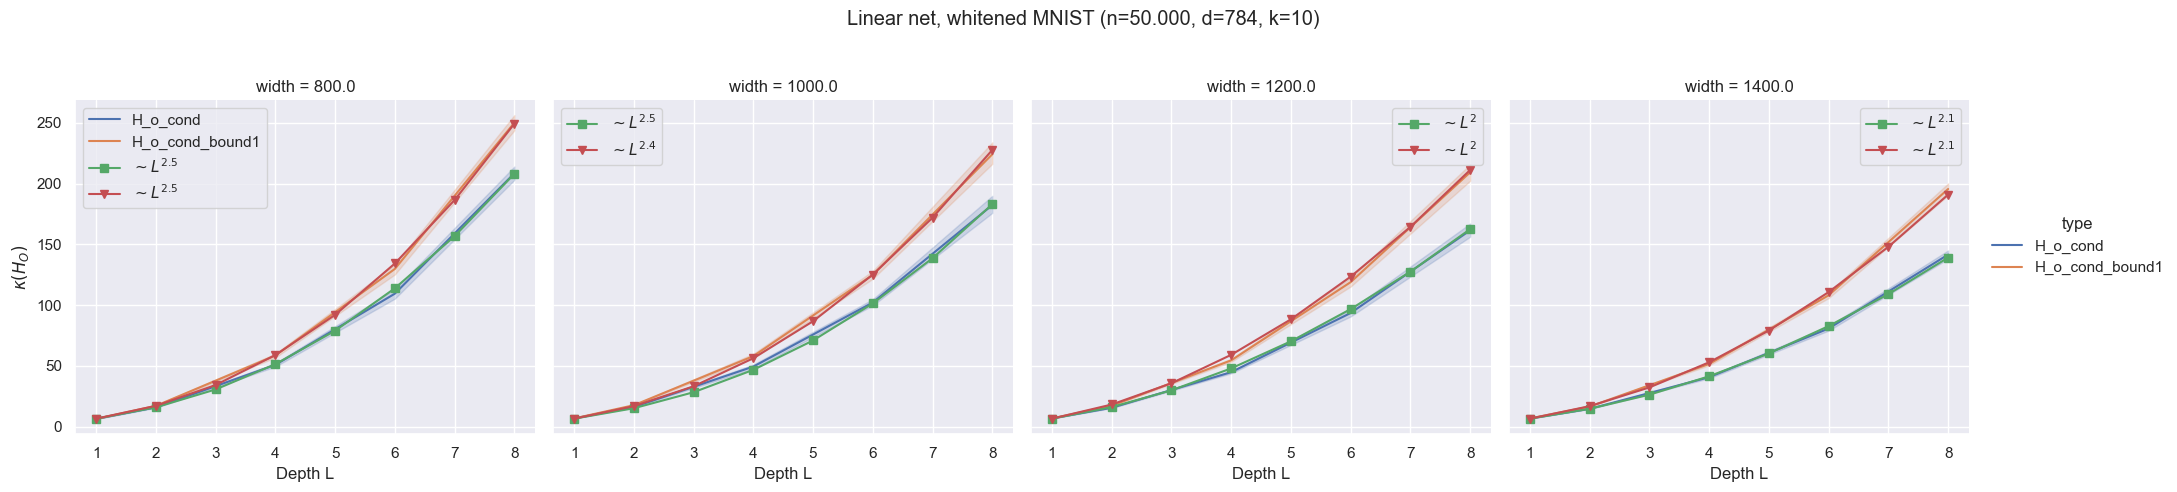

In [243]:
import numpy as np
g = sns.relplot(data=df_linnet_1, x='depth', y='value', col='width', hue='type', kind='line')


plt.subplot(141)
plt.plot(np.linspace(1,8,8),6.5*np.linspace(1,4,8)**2.5, 's-', label=r'$\sim L^{2.5}$')
plt.plot(np.linspace(1,8,8),6.5*np.linspace(1,4.3,8)**2.5, 'v-', label=r'$\sim L^{2.5}$')

plt.legend()

plt.subplot(142)
plt.plot(np.linspace(1,8,8),6.5*np.linspace(1,3.8,8)**2.5, 's-', label=r'$\sim L^{2.5}$')
plt.plot(np.linspace(1,8,8),6.5*np.linspace(1,4.4,8)**2.4, 'v-', label=r'$\sim L^{2.4}$')

plt.legend()

plt.subplot(143)
plt.plot(np.linspace(1,8,8),6.5*np.linspace(1,5,8)**2, 's-', label=r'$\sim L^{2}$')
plt.plot(np.linspace(1,8,8),6.5*np.linspace(1,5.7,8)**2, 'v-', label=r'$\sim L^{2}$')

plt.legend()

plt.subplot(144)
plt.plot(np.linspace(1,8,8),6.5*np.linspace(1,4.3,8)**2.1, 's-', label=r'$\sim L^{2.1}$')
plt.plot(np.linspace(1,8,8),6.5*np.linspace(1,5,8)**2.1, 'v-', label=r'$\sim L^{2.1}$')

plt.legend()

g.fig.subplots_adjust(top=0.8)

g.set_axis_labels('Depth L','$\kappa(H_O)$')

g.fig.suptitle(r'Linear net, whitened MNIST (n=50.000, d=784, k=10)')

g.savefig('LinearNet_whitened_MNIST_fitted_curve.pdf')

In [327]:
file_name_cifar10_whitened_resnet_1 = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_num_init=20.pkl'

file_name_cifar10_whitened_resnet_1_sqrtL = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_sqrt(L)_num_init=20.pkl'

file_name_cifar10_whitened_resnet_1_L = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_L_num_init=20.pkl'

In [328]:
file = file_path + '/' + file_name_cifar10_whitened_resnet_1
df_resnet_1 = pd.read_pickle(file)

file = file_path + '/' + file_name_cifar10_whitened_resnet_1_sqrtL
df_resnet_1_sqrtL = pd.read_pickle(file)

file = file_path + '/' + file_name_cifar10_whitened_resnet_1_L
df_resnet_1_L = pd.read_pickle(file)

In [329]:
df_resnet_1 = df_resnet_1[df_resnet_1['type'] != 'H_o_cond_bound2']
df_resnet_1 = df_resnet_1[df_resnet_1['type'] != 'H_o_cond_bound3']

df_resnet_1_sqrtL = df_resnet_1_sqrtL[df_resnet_1_sqrtL['type'] != 'H_o_cond_bound2']
df_resnet_1_sqrtL = df_resnet_1_sqrtL[df_resnet_1_sqrtL['type'] != 'H_o_cond_bound3']

df_resnet_1_L = df_resnet_1_L[df_resnet_1_L['type'] != 'H_o_cond_bound2']
df_resnet_1_L = df_resnet_1_L[df_resnet_1_L['type'] != 'H_o_cond_bound3']

In [330]:
df_resnet_1.insert(2,'beta','1')
df_resnet_1_sqrtL.insert(2,'beta','1/sqrt(L)')
df_resnet_1_L.insert(2,'beta','1/L')


In [331]:
df_resnet = pd.concat([df_resnet_1,df_resnet_1_sqrtL,df_resnet_1_L])

In [332]:
df_resnet

dataset               network beta  cond_cov_xx  input_dim  output_dim  \
0      mnist  lin_residual_network    1     1.000001      784.0        10.0   
1      mnist  lin_residual_network    1     1.000001      784.0        10.0   
4      mnist  lin_residual_network    1     1.000001      784.0        10.0   
5      mnist  lin_residual_network    1     1.000001      784.0        10.0   
8      mnist  lin_residual_network    1     1.000001      784.0        10.0   
...      ...                   ...  ...          ...        ...         ...   
1589   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1592   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1593   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1596   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1597   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   

       width  depth activ_f  epoch             type       value  
0      800.0    1.0  linear    0.0         H_o_cond    5.471584  
1      800.0    1.0  linear    0.0  H_o_cond_bound1    5.471590  
4      800.0    1.0  linear    0.0         H_o_cond    4.970114  
5      800.0    1.0  linear    0.0  H_o_cond_bound1    4.970119  
8      800.0    1.0  linear    0.0         H_o_cond    5.306767  
...      ...    ...     ...    ...              ...         ...  
1589  1400.0    8.0  linear    0.0  H_o_cond_bound1  201.917473  
1592  1400.0    8.0  linear    0.0         H_o_cond  119.040728  
1593  1400.0    8.0  linear    0.0  H_o_cond_bound1  163.163764  
1596  1400.0    8.0  linear    0.0         H_o_cond  150.660572  
1597  1400.0    8.0  linear    0.0  H_o_cond_bound1  199.981497  

[2400 rows x 12 columns]

In [333]:
df_resnet.insert(11,'abs_error',0)
df_resnet.insert(12,'rel_error',0)

df_resnet_H_o_cond = df_resnet[df_resnet['type']=='H_o_cond']
df_resnet_H_o_cond_bound1 = df_resnet[df_resnet['type']=='H_o_cond_bound1']

In [334]:
df_resnet_H_o_cond.loc[:,('abs_error')] = (df_resnet_H_o_cond_bound1['value'].values - df_resnet_H_o_cond['value'].values)
df_resnet_H_o_cond.loc[:,('rel_error')] = (df_resnet_H_o_cond_bound1['value'].values - df_resnet_H_o_cond['value'].values)/df_resnet_H_o_cond['value'].values

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_67404/397753192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resnet_H_o_cond.loc[:,('abs_error')] = (df_resnet_H_o_cond_bound1['value'].values - df_resnet_H_o_cond['value'].values)
/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_67404/397753192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resnet_H_o_cond.loc[:,('rel_error')] = (df_resnet_H_o_cond_bound1['value'].values - df_resnet_H_o_cond['value'].values)/df_resnet_H_

In [335]:
df_resnet_H_o_cond

dataset               network beta  cond_cov_xx  input_dim  output_dim  \
0      mnist  lin_residual_network    1     1.000001      784.0        10.0   
4      mnist  lin_residual_network    1     1.000001      784.0        10.0   
8      mnist  lin_residual_network    1     1.000001      784.0        10.0   
12     mnist  lin_residual_network    1     1.000001      784.0        10.0   
16     mnist  lin_residual_network    1     1.000001      784.0        10.0   
...      ...                   ...  ...          ...        ...         ...   
1580   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1584   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1588   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1592   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   
1596   mnist  lin_residual_network  1/L     1.000001      784.0        10.0   

       width  depth activ_f  epoch      type  abs_error  rel_error       value  
0      800.0    1.0  linear    0.0  H_o_cond   0.000006   0.000001    5.471584  
4      800.0    1.0  linear    0.0  H_o_cond   0.000006   0.000001    4.970114  
8      800.0    1.0  linear    0.0  H_o_cond   0.000006   0.000001    5.306767  
12     800.0    1.0  linear    0.0  H_o_cond   0.000006   0.000001    5.285300  
16     800.0    1.0  linear    0.0  H_o_cond   0.000006   0.000001    5.352026  
...      ...    ...     ...    ...       ...        ...        ...         ...  
1580  1400.0    8.0  linear    0.0  H_o_cond  47.505678   0.380229  124.939621  
1584  1400.0    8.0  linear    0.0  H_o_cond  47.987020   0.386339  124.209772  
1588  1400.0    8.0  linear    0.0  H_o_cond  55.002301   0.374381  146.915172  
1592  1400.0    8.0  linear    0.0  H_o_cond  44.123036   0.370655  119.040728  
1596  1400.0    8.0  linear    0.0  H_o_cond  49.320926   0.327365  150.660572  

[1200 rows x 14 columns]

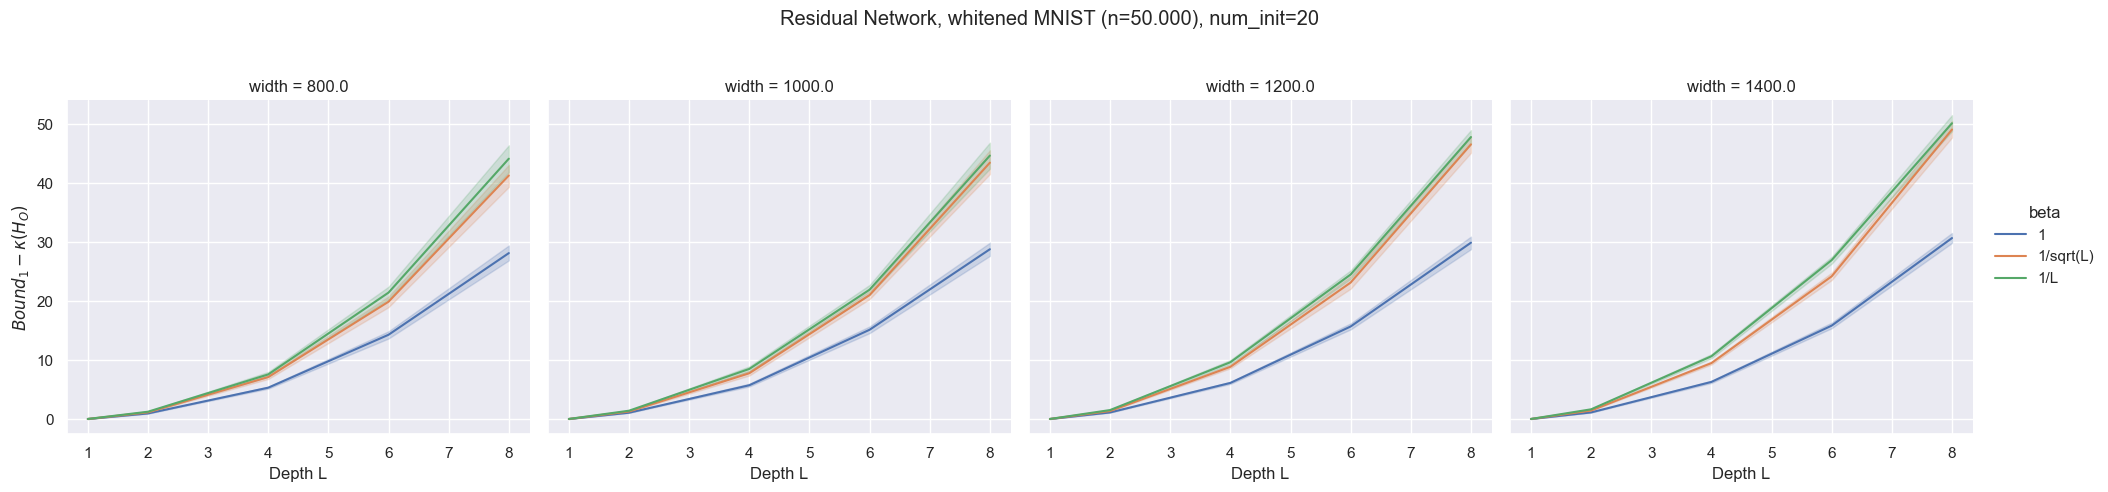

In [336]:
g = sns.relplot(data=df_resnet_H_o_cond, x="depth", y="abs_error", hue='beta', col="width", kind='line')
# g.set(yscale='log')
g.set_axis_labels('Depth L','$Bound_1 - \kappa(H_O)$')
# g.set(ylim=[1,250])

g.fig.suptitle(r'Residual Network, whitened MNIST (n=50.000), num_init=20')
g.fig.subplots_adjust(top=0.8)

g.savefig('figures/ResidualNetwork_whitened_MNIST_k(H_O)_bound_abs_difs_num_init=20_comparing_beta.pdf')

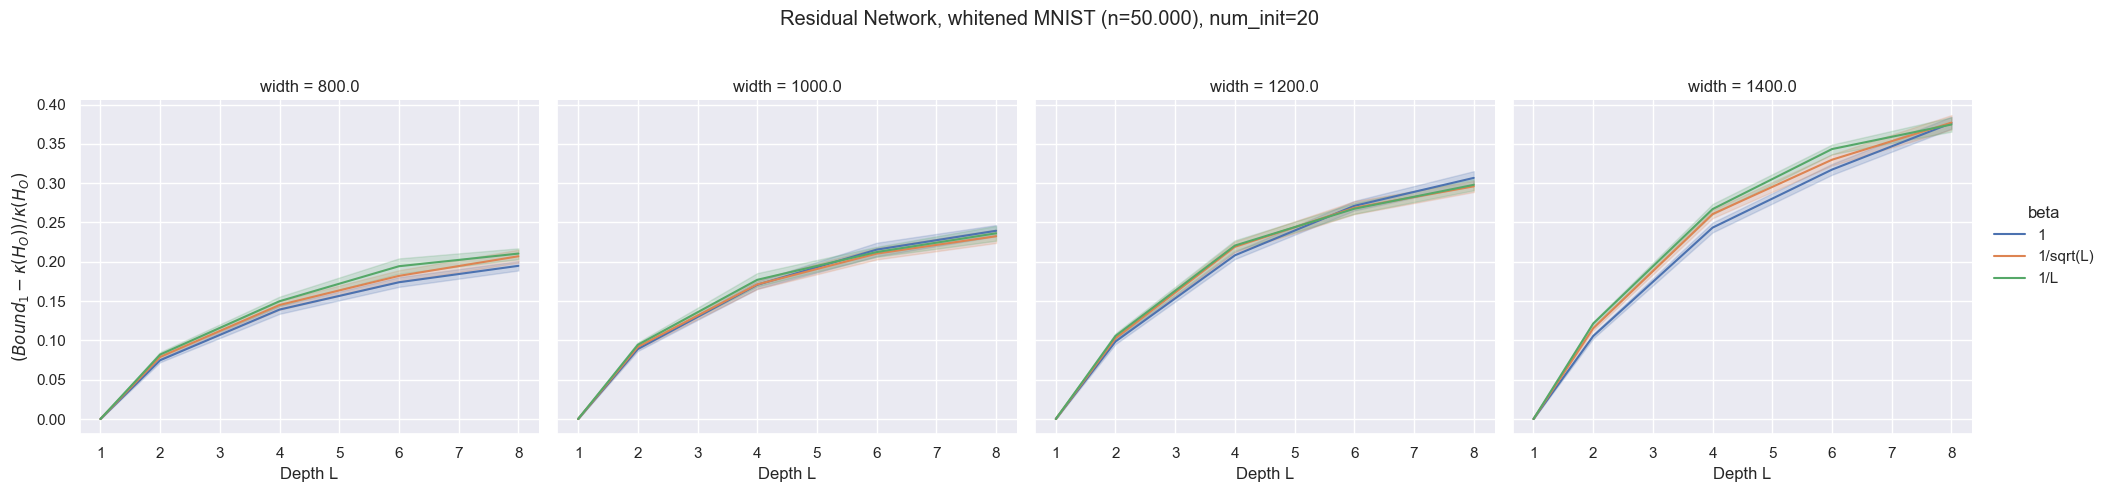

In [337]:
g = sns.relplot(data=df_resnet_H_o_cond, x="depth", y="rel_error", col="width", hue='beta', kind='line')
# g.set(yscale='log')
g.set_axis_labels('Depth L','$(Bound_1 - \kappa(H_O))/\kappa(H_O)$')
# g.set(ylim=[1,250])

g.fig.suptitle(r'Residual Network, whitened MNIST (n=50.000), num_init=20')
g.fig.subplots_adjust(top=0.8)

g.savefig('figures/ResidualNetwork_whitened_MNIST_k(H_O)_bound_rel_difs_num_init=20_comparing_beta.pdf')

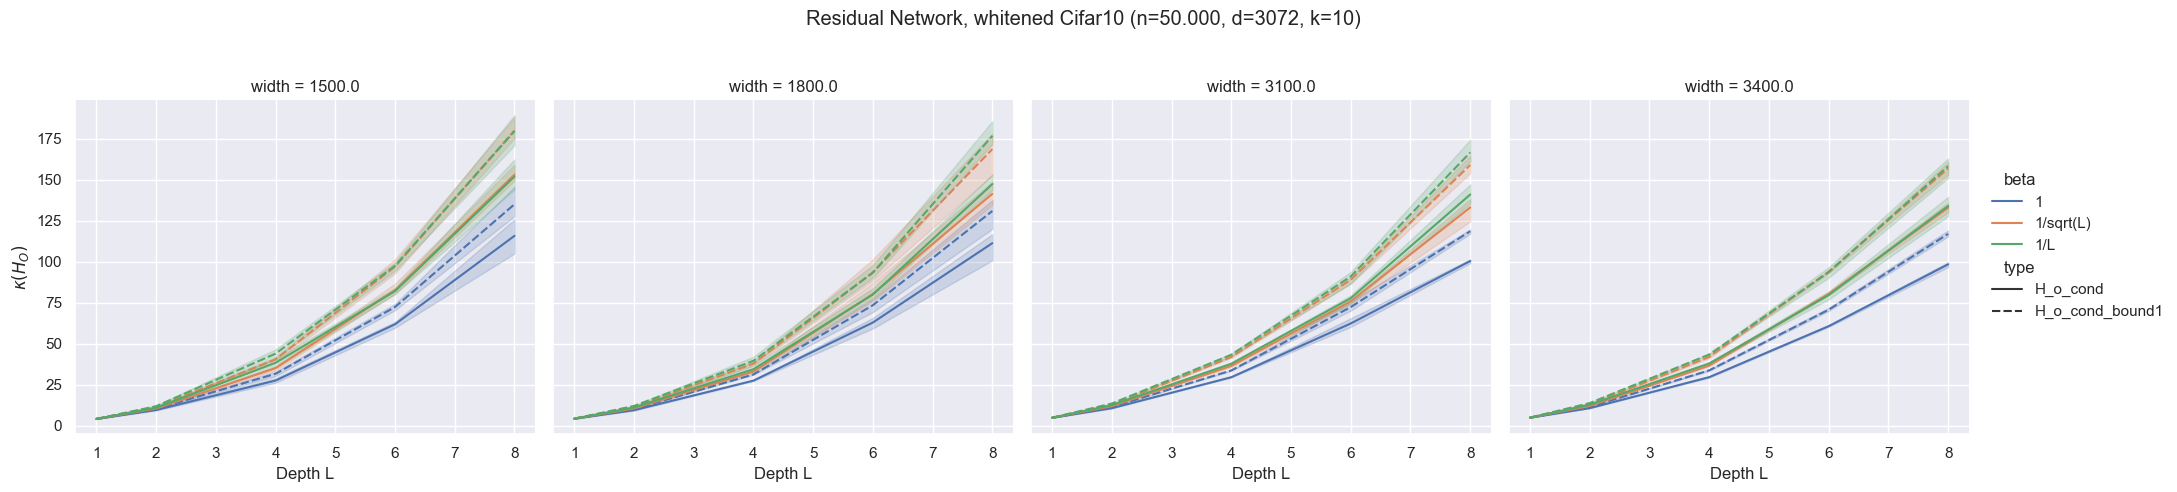

In [274]:
g = sns.relplot(data=df_resnet, x="depth", y="value", style="type", hue='beta', col="width", kind='line')
# g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
# g.set(ylim=[1,10e16])

g.fig.suptitle(r'Residual Network, whitened Cifar10 (n=50.000, d=3072, k=10)')
g.fig.subplots_adjust(top=0.8)

g.fig.savefig('Residualnet_whitened_Cifar10_comparison_beta.pdf')

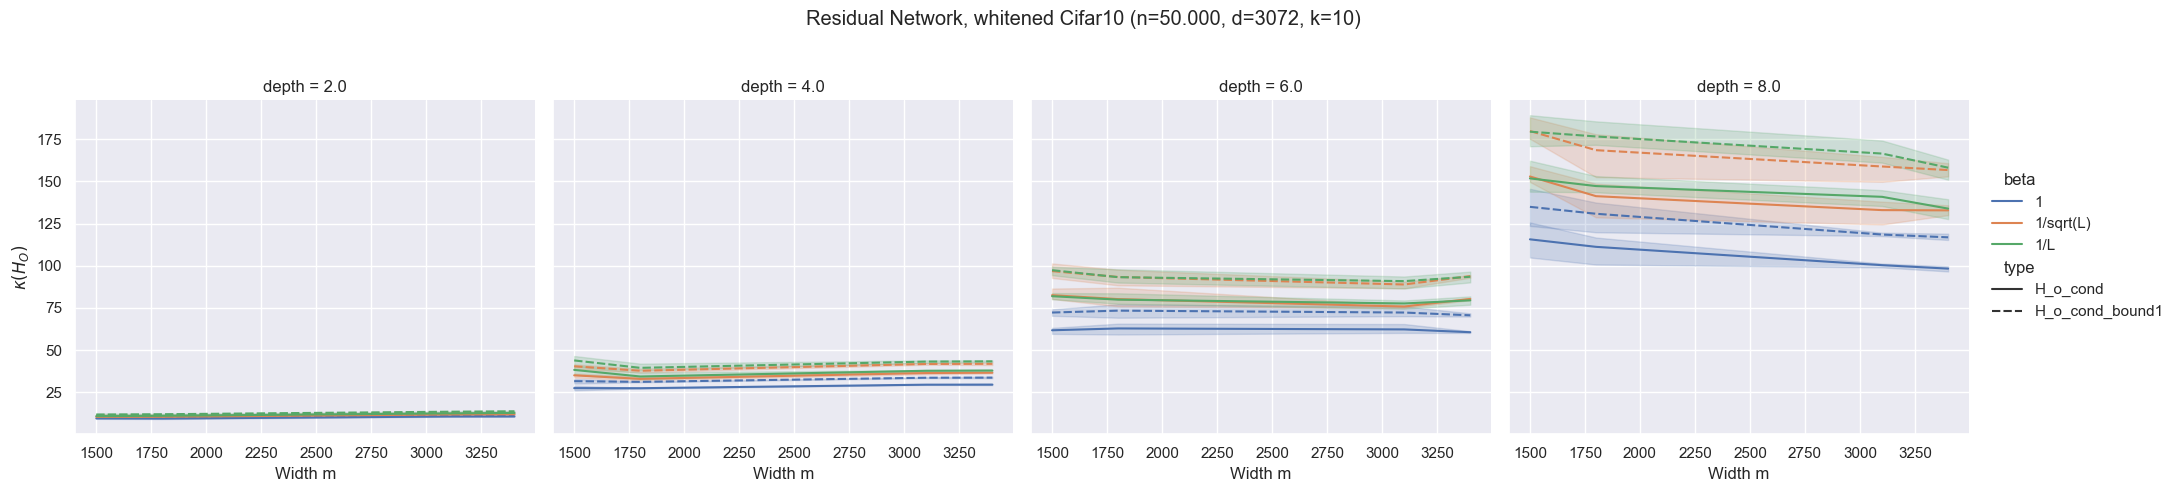

In [276]:
g = sns.relplot(data=df_resnet[df_resnet['depth']!= 1], x="width", y="value", style="type", hue='beta', col="depth", kind='line')
# g.set(yscale='log')
g.set_axis_labels('Width m','$\kappa(H_O)$')
# g.set(ylim=[1,10e16])

g.fig.suptitle(r'Residual Network, whitened Cifar10 (n=50.000, d=3072, k=10)')
g.fig.subplots_adjust(top=0.8)

g.fig.savefig('Residualnet_whitened_Cifar10_comparison_beta_depth.pdf')

In [277]:
file_name_cifar10_whitened_linnet = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_LinearNet_num_init=3.pkl'

In [283]:
file = file_path + '/' + file_name_cifar10_whitened_linnet

df_linnet_1 = pd.read_pickle(file)

In [284]:
df_linnet_1 = df_linnet_1[df_linnet_1['type'] != 'H_o_cond_bound2']
df_linnet_1 = df_linnet_1[df_linnet_1['type'] != 'H_o_cond_bound3']

In [285]:
df_linnet_1.insert(2,'beta','-')

In [286]:
df_networks = pd.concat([df_linnet_1,df_resnet_1])

In [287]:
df_networks

dataset               network beta  cond_cov_xx  input_dim  output_dim  \
0    cifar-10            sequential    -          1.0     3072.0        10.0   
1    cifar-10            sequential    -          1.0     3072.0        10.0   
4    cifar-10            sequential    -          1.0     3072.0        10.0   
5    cifar-10            sequential    -          1.0     3072.0        10.0   
8    cifar-10            sequential    -          1.0     3072.0        10.0   
..        ...                   ...  ...          ...        ...         ...   
229  cifar-10  lin_residual_network    1          1.0     3072.0        10.0   
232  cifar-10  lin_residual_network    1          1.0     3072.0        10.0   
233  cifar-10  lin_residual_network    1          1.0     3072.0        10.0   
236  cifar-10  lin_residual_network    1          1.0     3072.0        10.0   
237  cifar-10  lin_residual_network    1          1.0     3072.0        10.0   

      width  depth activ_f  epoch             type       value  
0    1500.0    1.0  linear    0.0         H_o_cond    4.608356  
1    1500.0    1.0  linear    0.0  H_o_cond_bound1    4.608356  
4    1500.0    1.0  linear    0.0         H_o_cond    4.515629  
5    1500.0    1.0  linear    0.0  H_o_cond_bound1    4.515629  
8    1500.0    1.0  linear    0.0         H_o_cond    4.598849  
..      ...    ...     ...    ...              ...         ...  
229  3400.0    8.0  linear    0.0  H_o_cond_bound1  119.060122  
232  3400.0    8.0  linear    0.0         H_o_cond   98.657822  
233  3400.0    8.0  linear    0.0  H_o_cond_bound1  116.306503  
236  3400.0    8.0  linear    0.0         H_o_cond   96.666672  
237  3400.0    8.0  linear    0.0  H_o_cond_bound1  115.332378  

[240 rows x 12 columns]

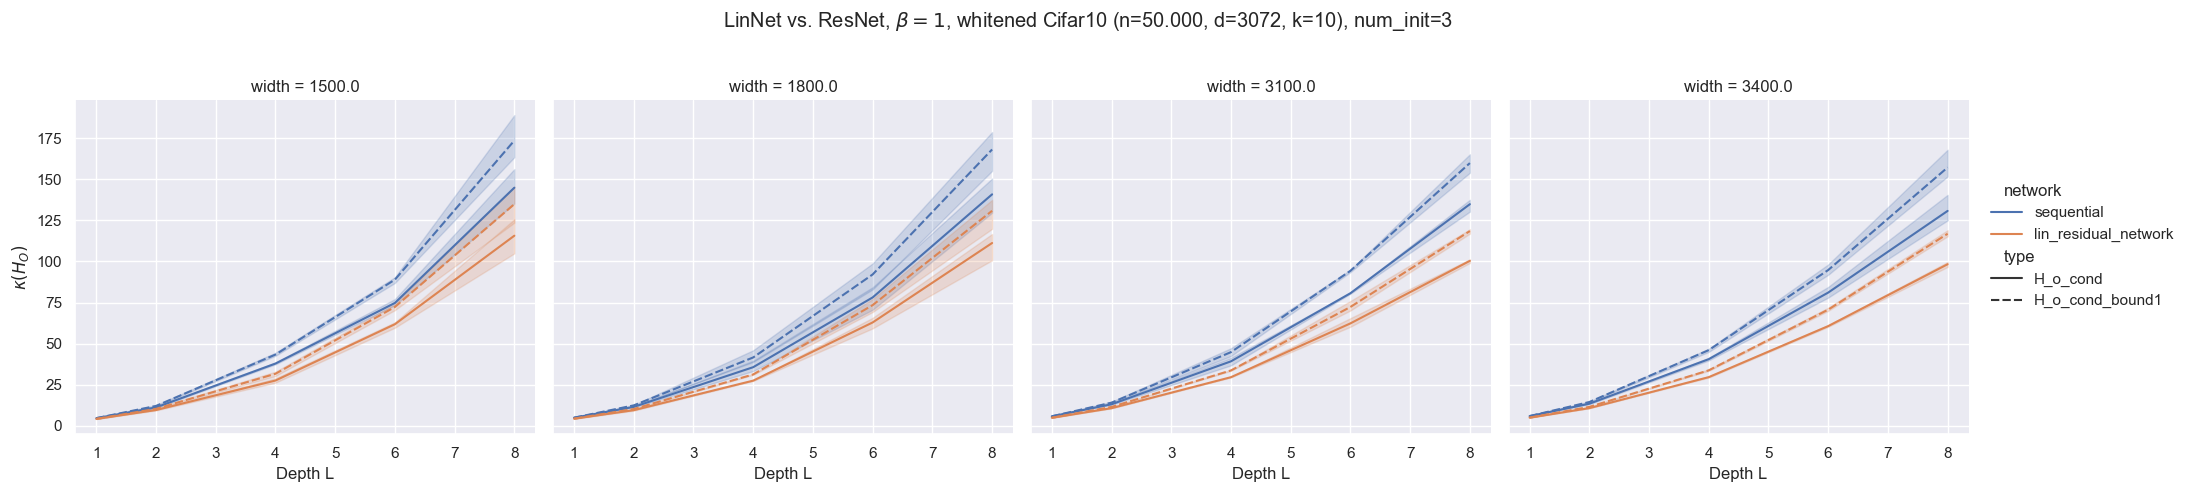

In [289]:
g = sns.relplot(data=df_networks, x="depth", y="value", style="type", hue='network', col="width", kind='line')
# g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
# g.set(ylim=[1,10e16])

g.fig.suptitle(r'LinNet vs. ResNet, $\beta=1$, whitened Cifar10 (n=50.000, d=3072, k=10), num_init=3')
g.fig.subplots_adjust(top=0.8)

g.fig.savefig('LinNet_vs_Resnet_beta=1_whitened_Cifar10.pdf')

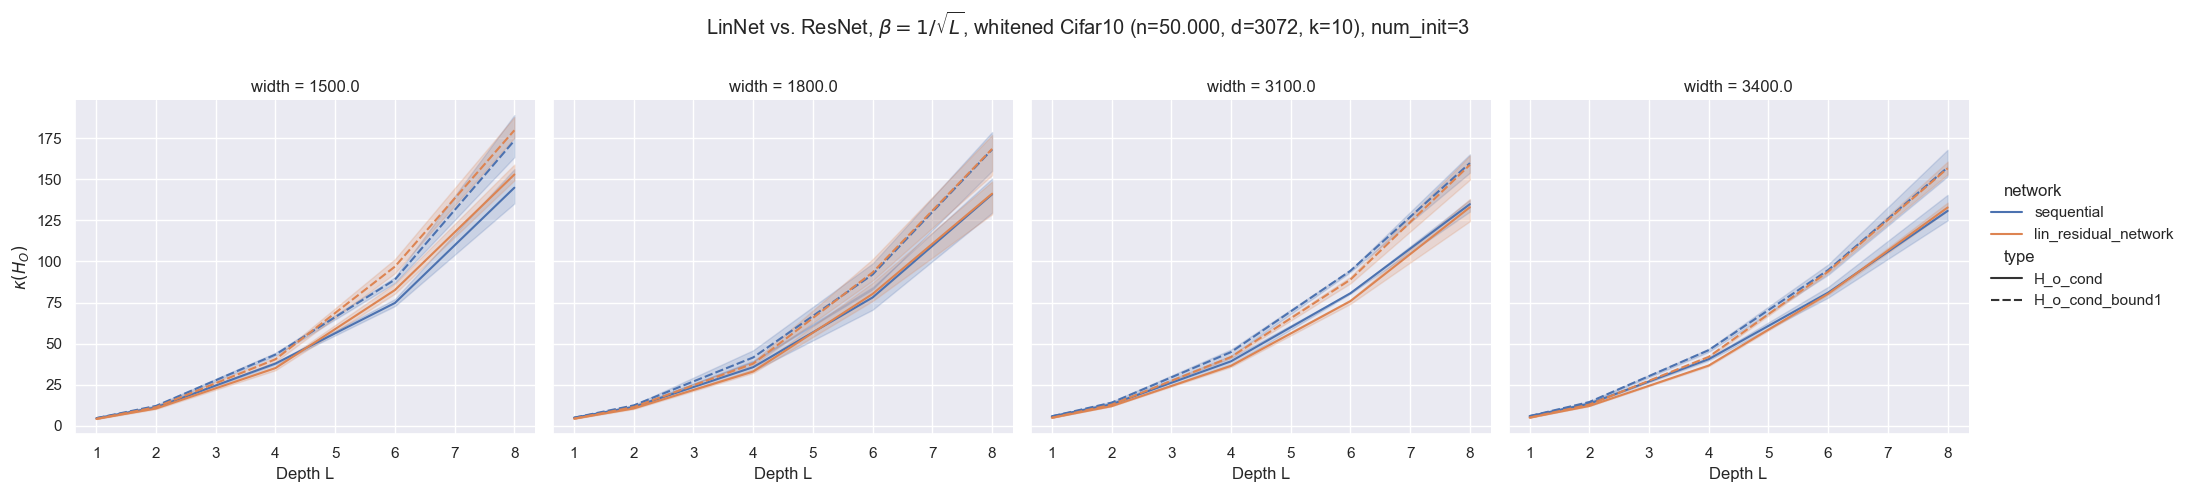

In [290]:
df_networks = pd.concat([df_linnet_1,df_resnet_1_sqrtL])

g = sns.relplot(data=df_networks, x="depth", y="value", style="type", hue='network', col="width", kind='line')
# g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
# g.set(ylim=[1,10e16])

g.fig.suptitle(r'LinNet vs. ResNet, $\beta=1/\sqrt{L}$, whitened Cifar10 (n=50.000, d=3072, k=10), num_init=3')
g.fig.subplots_adjust(top=0.8)

g.fig.savefig('LinNet_vs_Resnet_beta=1_sqrt(L)_whitened_Cifar10.pdf')

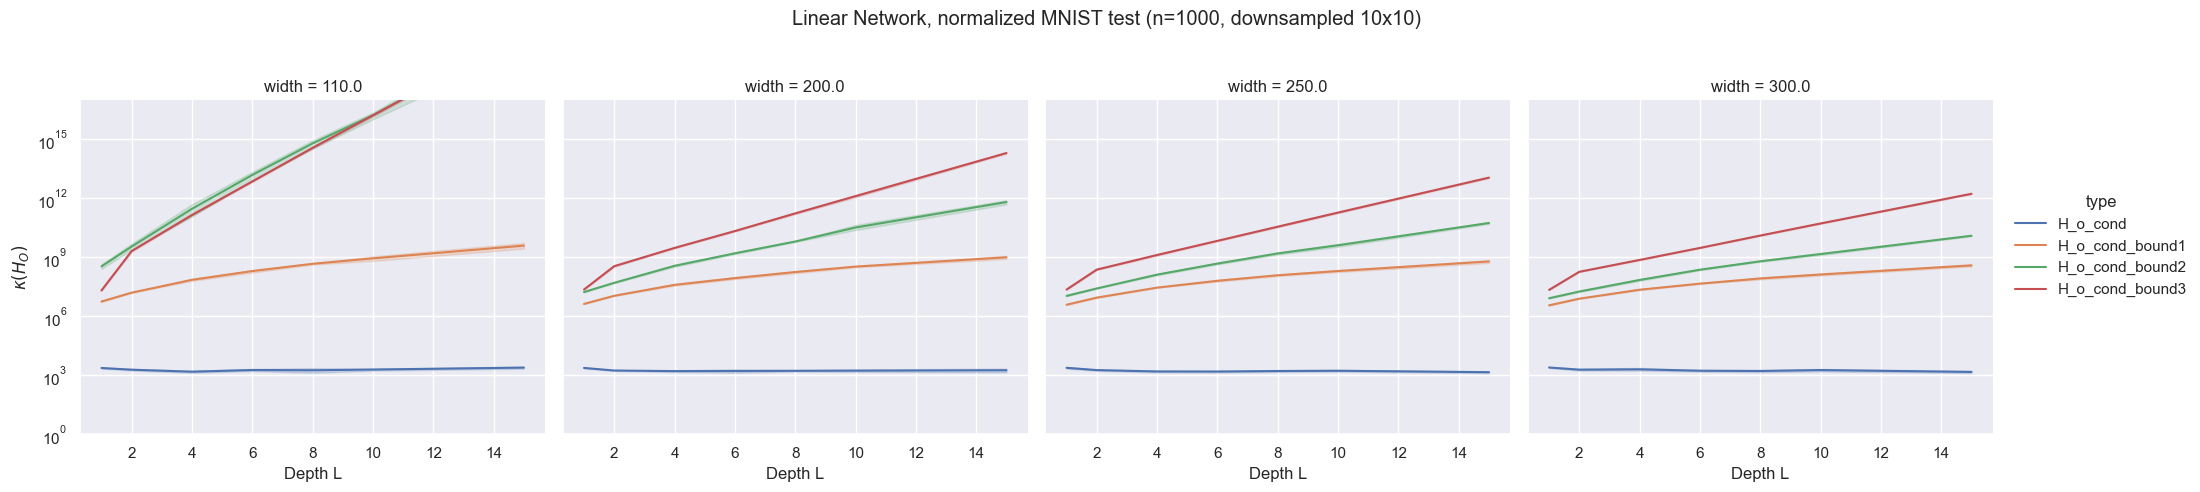

In [43]:
g = sns.relplot(data=df_mnist_normalized_test, x="depth", y="value", hue="type", col="width", kind='line')
g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
g.set(ylim=[1,10e16])

g.fig.suptitle(r'Linear Network, normalized MNIST test (n=1000, downsampled 10x10)')
g.fig.subplots_adjust(top=0.8)

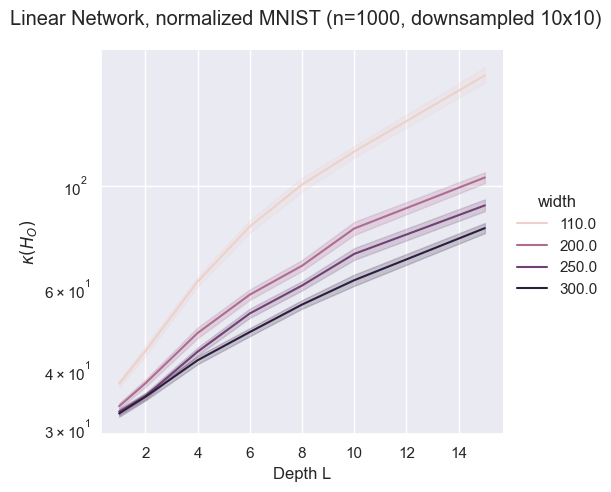

In [65]:
df_H_o_cond = df_mnist_normalized_lin[df_mnist_normalized_lin['type']=='H_o_cond']

g = sns.relplot(data=df_H_o_cond, x="depth", y="value", hue="width", kind='line')
g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
g.fig.suptitle('Linear Network, normalized MNIST (n=1000, downsampled 10x10)')
g.fig.subplots_adjust(top=0.9)
 

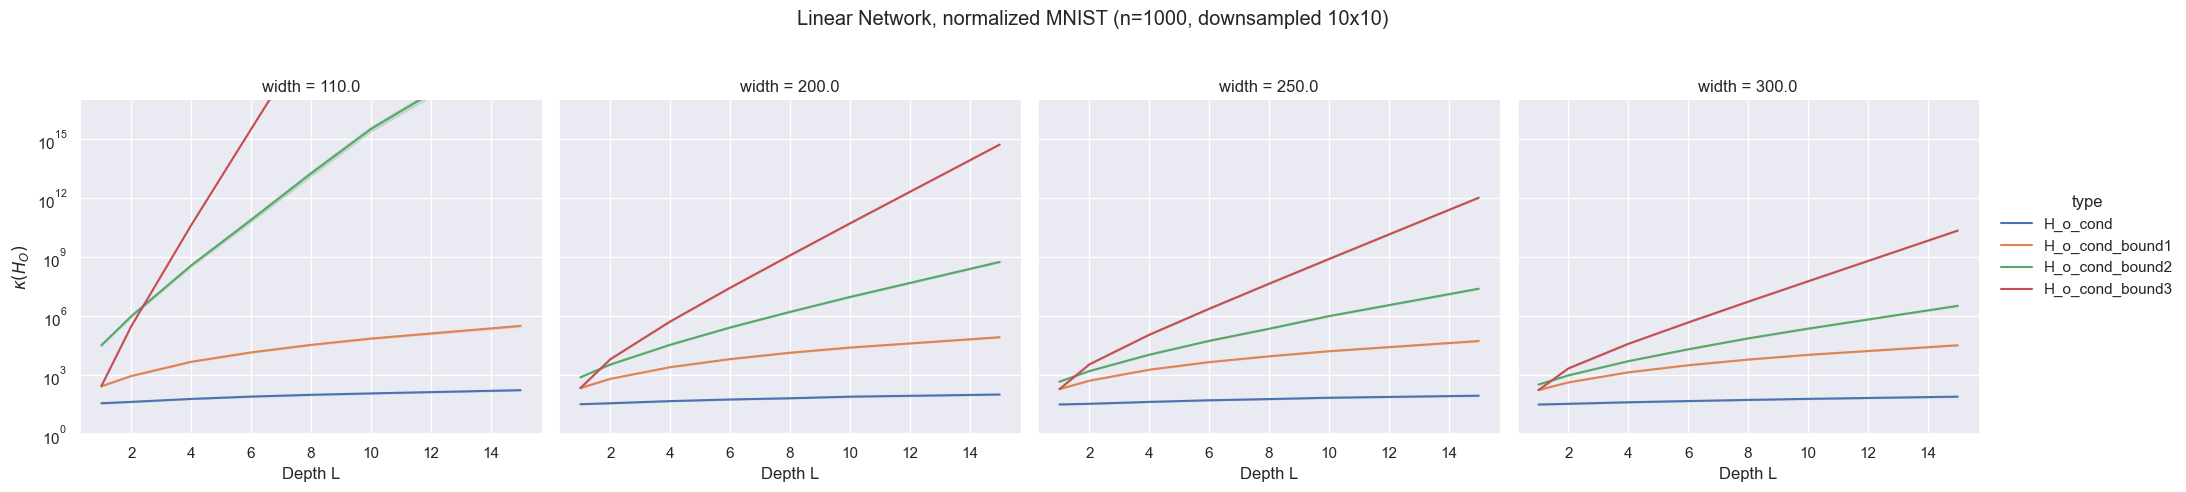

In [66]:
g = sns.relplot(data=df_mnist_normalized_lin, x="depth", y="value", hue="type", col="width", kind='line')
g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
g.set(ylim=[1,10e16])
g.fig.suptitle('Linear Network, normalized MNIST (n=1000, downsampled 10x10)')
g.fig.subplots_adjust(top=0.8)
g.savefig('LinearNetwork_MNIST_normalized_k(H_O)_bounds.pdf')

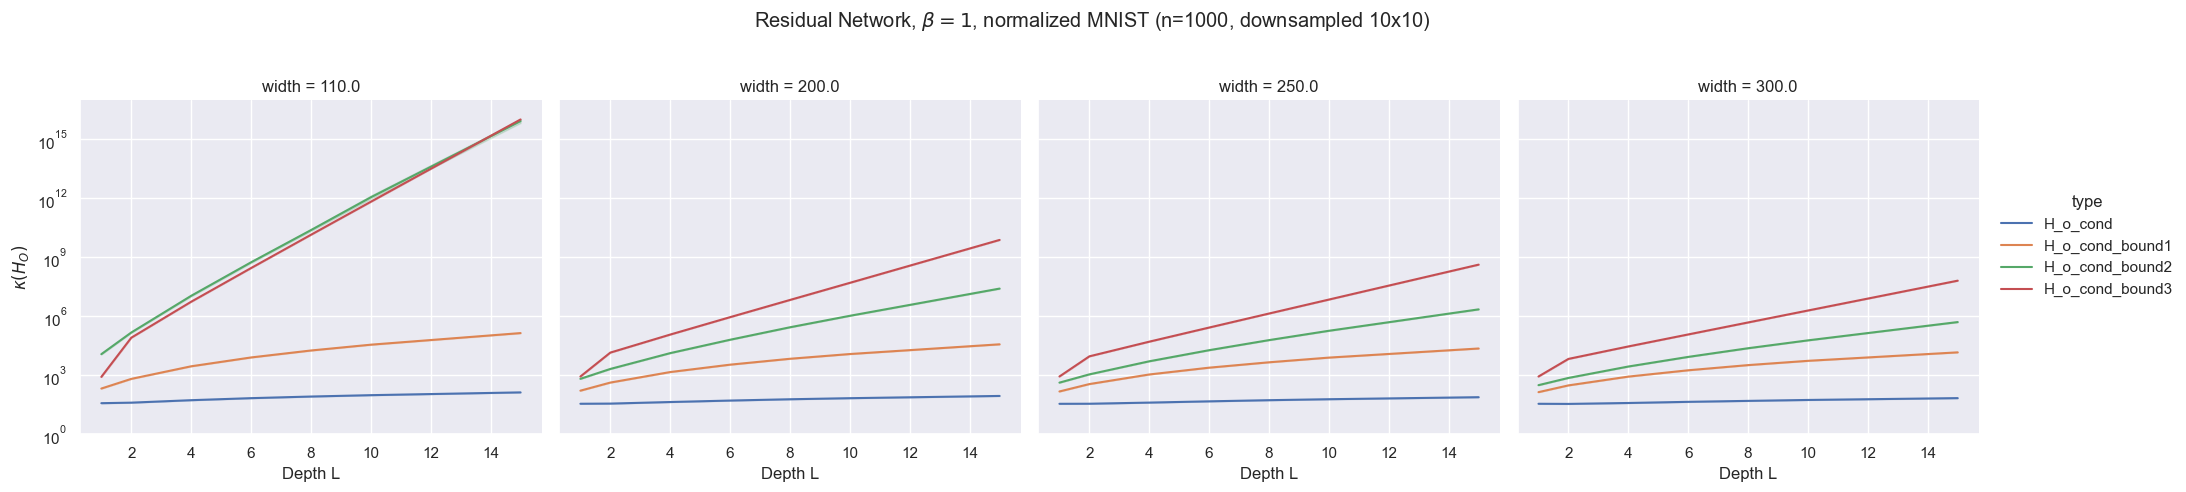

In [67]:
g = sns.relplot(data=df_mnist_normalized_resnet, x="depth", y="value", hue="type", col="width", kind='line')
g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
g.set(ylim=[1,10e16])

g.fig.suptitle(r'Residual Network, $\beta=1$, normalized MNIST (n=1000, downsampled 10x10)')
g.fig.subplots_adjust(top=0.8)
g.savefig('ResNetwork_MNIST_normalized_k(H_O)_bounds.pdf')

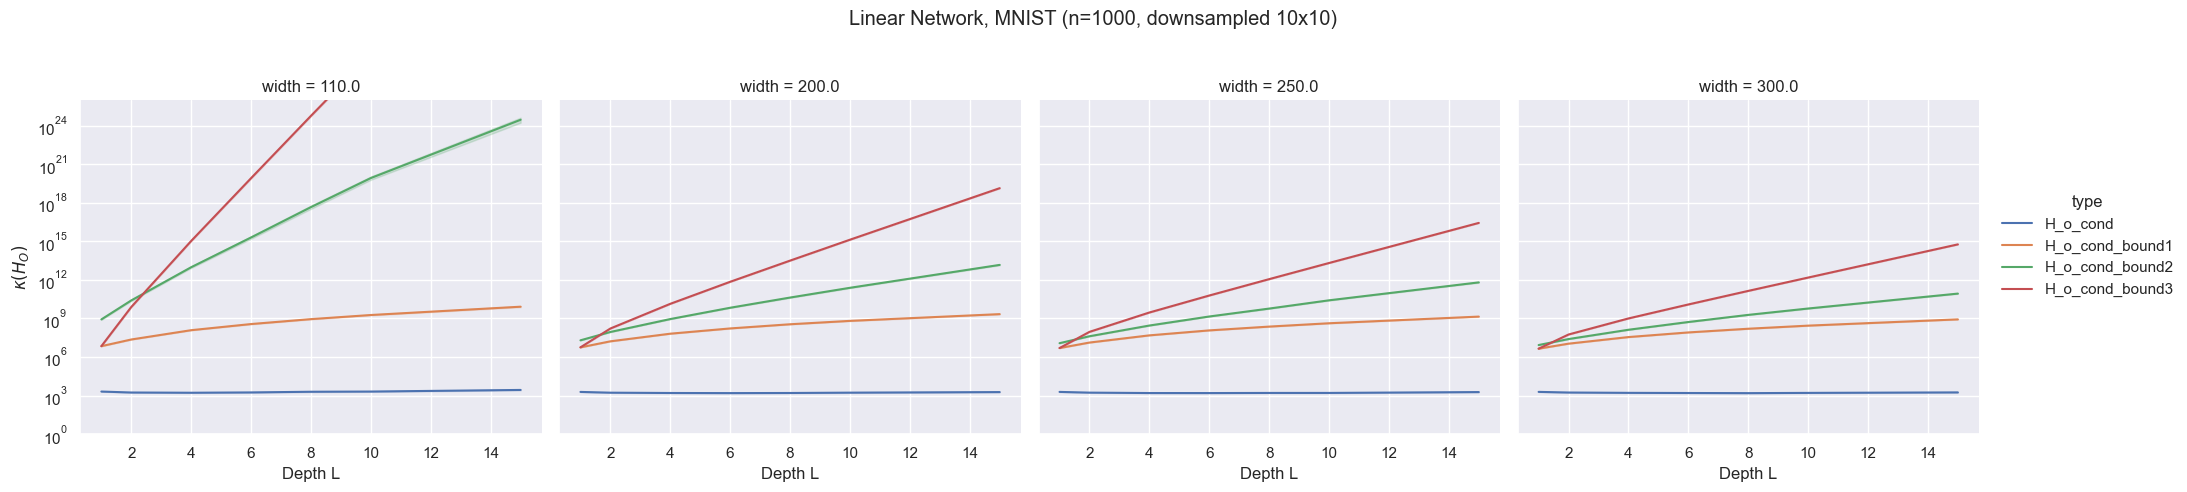

In [68]:
g = sns.relplot(data=df_mnist_lin, x="depth", y="value", hue="type", col="width", kind='line')
g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
g.set(ylim=[1,10e25])
g.fig.suptitle('Linear Network, MNIST (n=1000, downsampled 10x10)')
g.fig.subplots_adjust(top=0.8)
g.savefig('LinearNetwork_MNIST_k(H_O)_bounds.pdf')

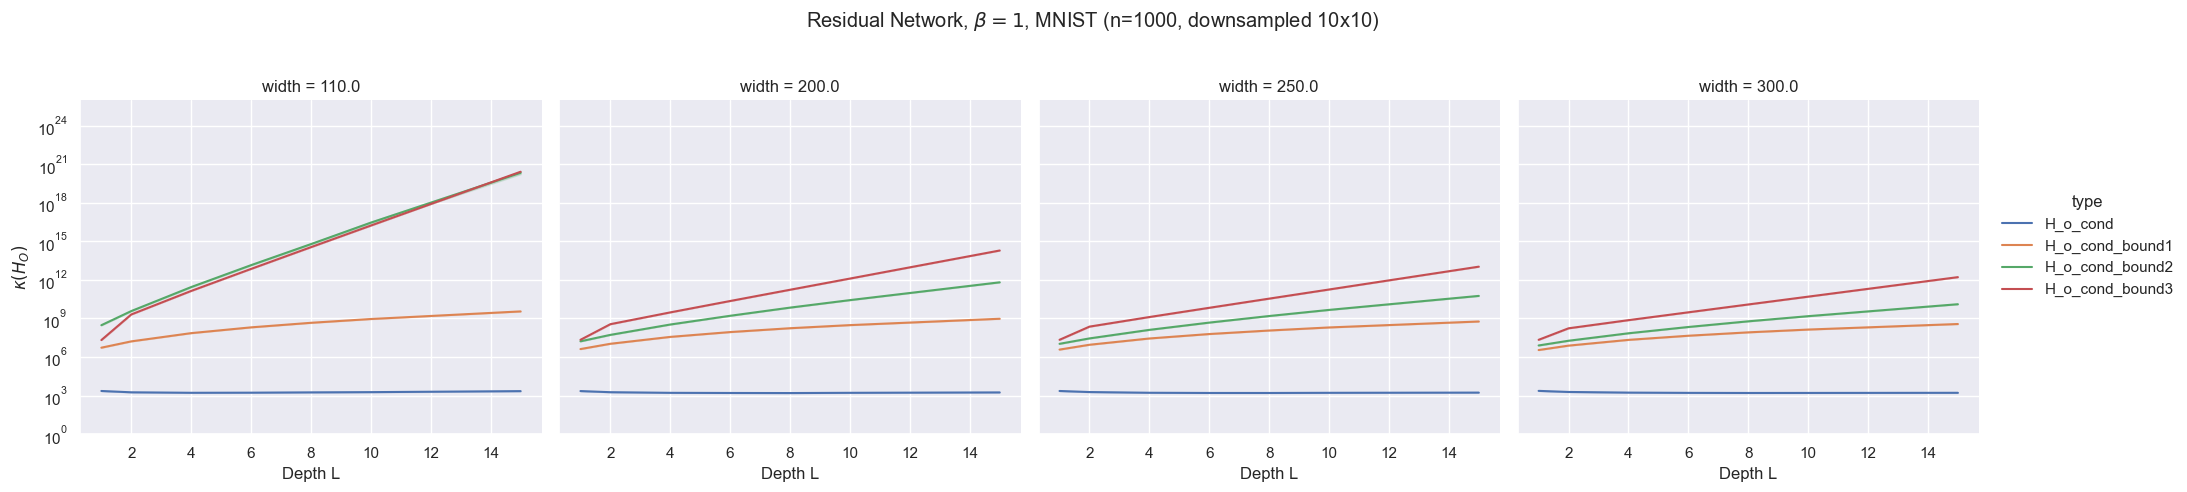

In [69]:
g = sns.relplot(data=df_mnist_resnet, x="depth", y="value", hue="type", col="width", kind='line')
g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
g.set(ylim=[1,10e25])
g.fig.suptitle(r'Residual Network, $\beta=1$, MNIST (n=1000, downsampled 10x10)')
g.fig.subplots_adjust(top=0.8)
g.savefig('ResNetwork_MNIST_k(H_O)_bounds.pdf')

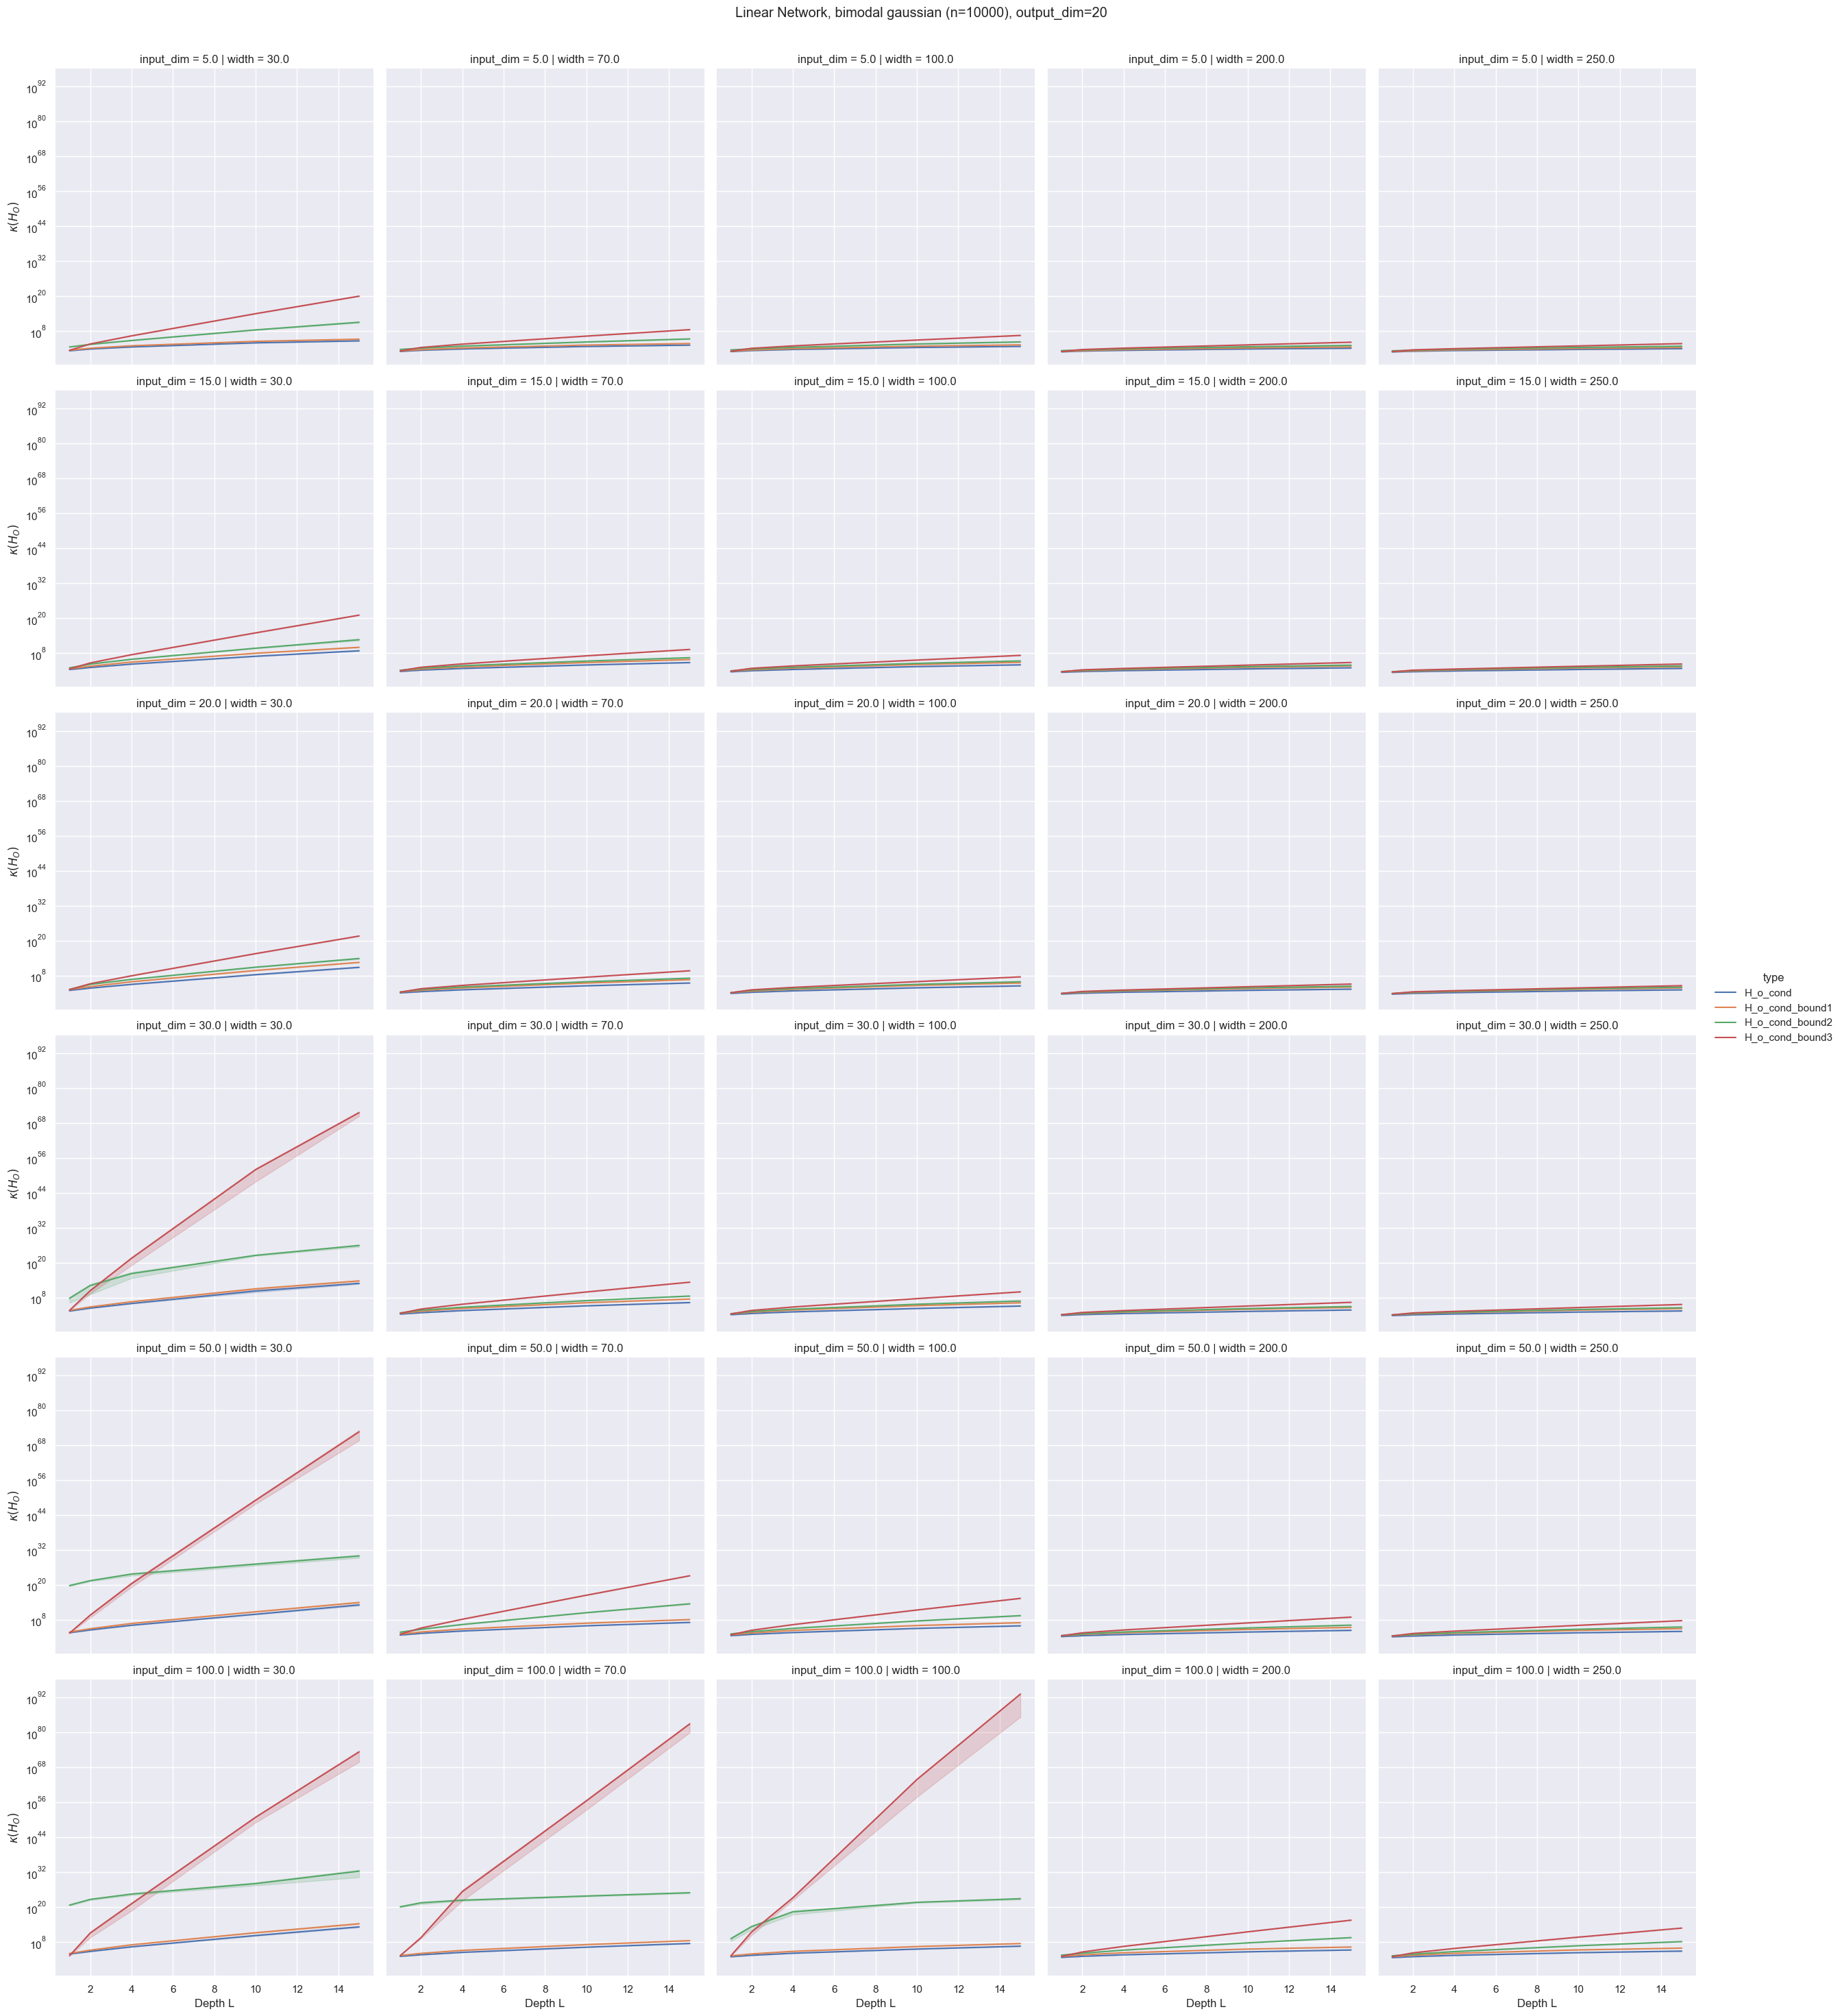

In [70]:
g = sns.relplot(data=df_gaussian_lin, x="depth", y="value", hue="type", col="width", row='input_dim', kind='line')
g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
# g.set(ylim=[1,10e25])
g.fig.suptitle(r'Linear Network, bimodal gaussian (n=10000), output_dim=20')
g.fig.subplots_adjust(top=0.95)

g.savefig('LinearNetwork_bimodal_gaussian_k(H_O)_bounds_1.pdf')

In [58]:
df_gaussian_lin_2 = df_gaussian_lin[df_gaussian_lin['input_dim'] < 60]
df_gaussian_lin_2 = df_gaussian_lin_2[df_gaussian_lin_2['width'] > 30]


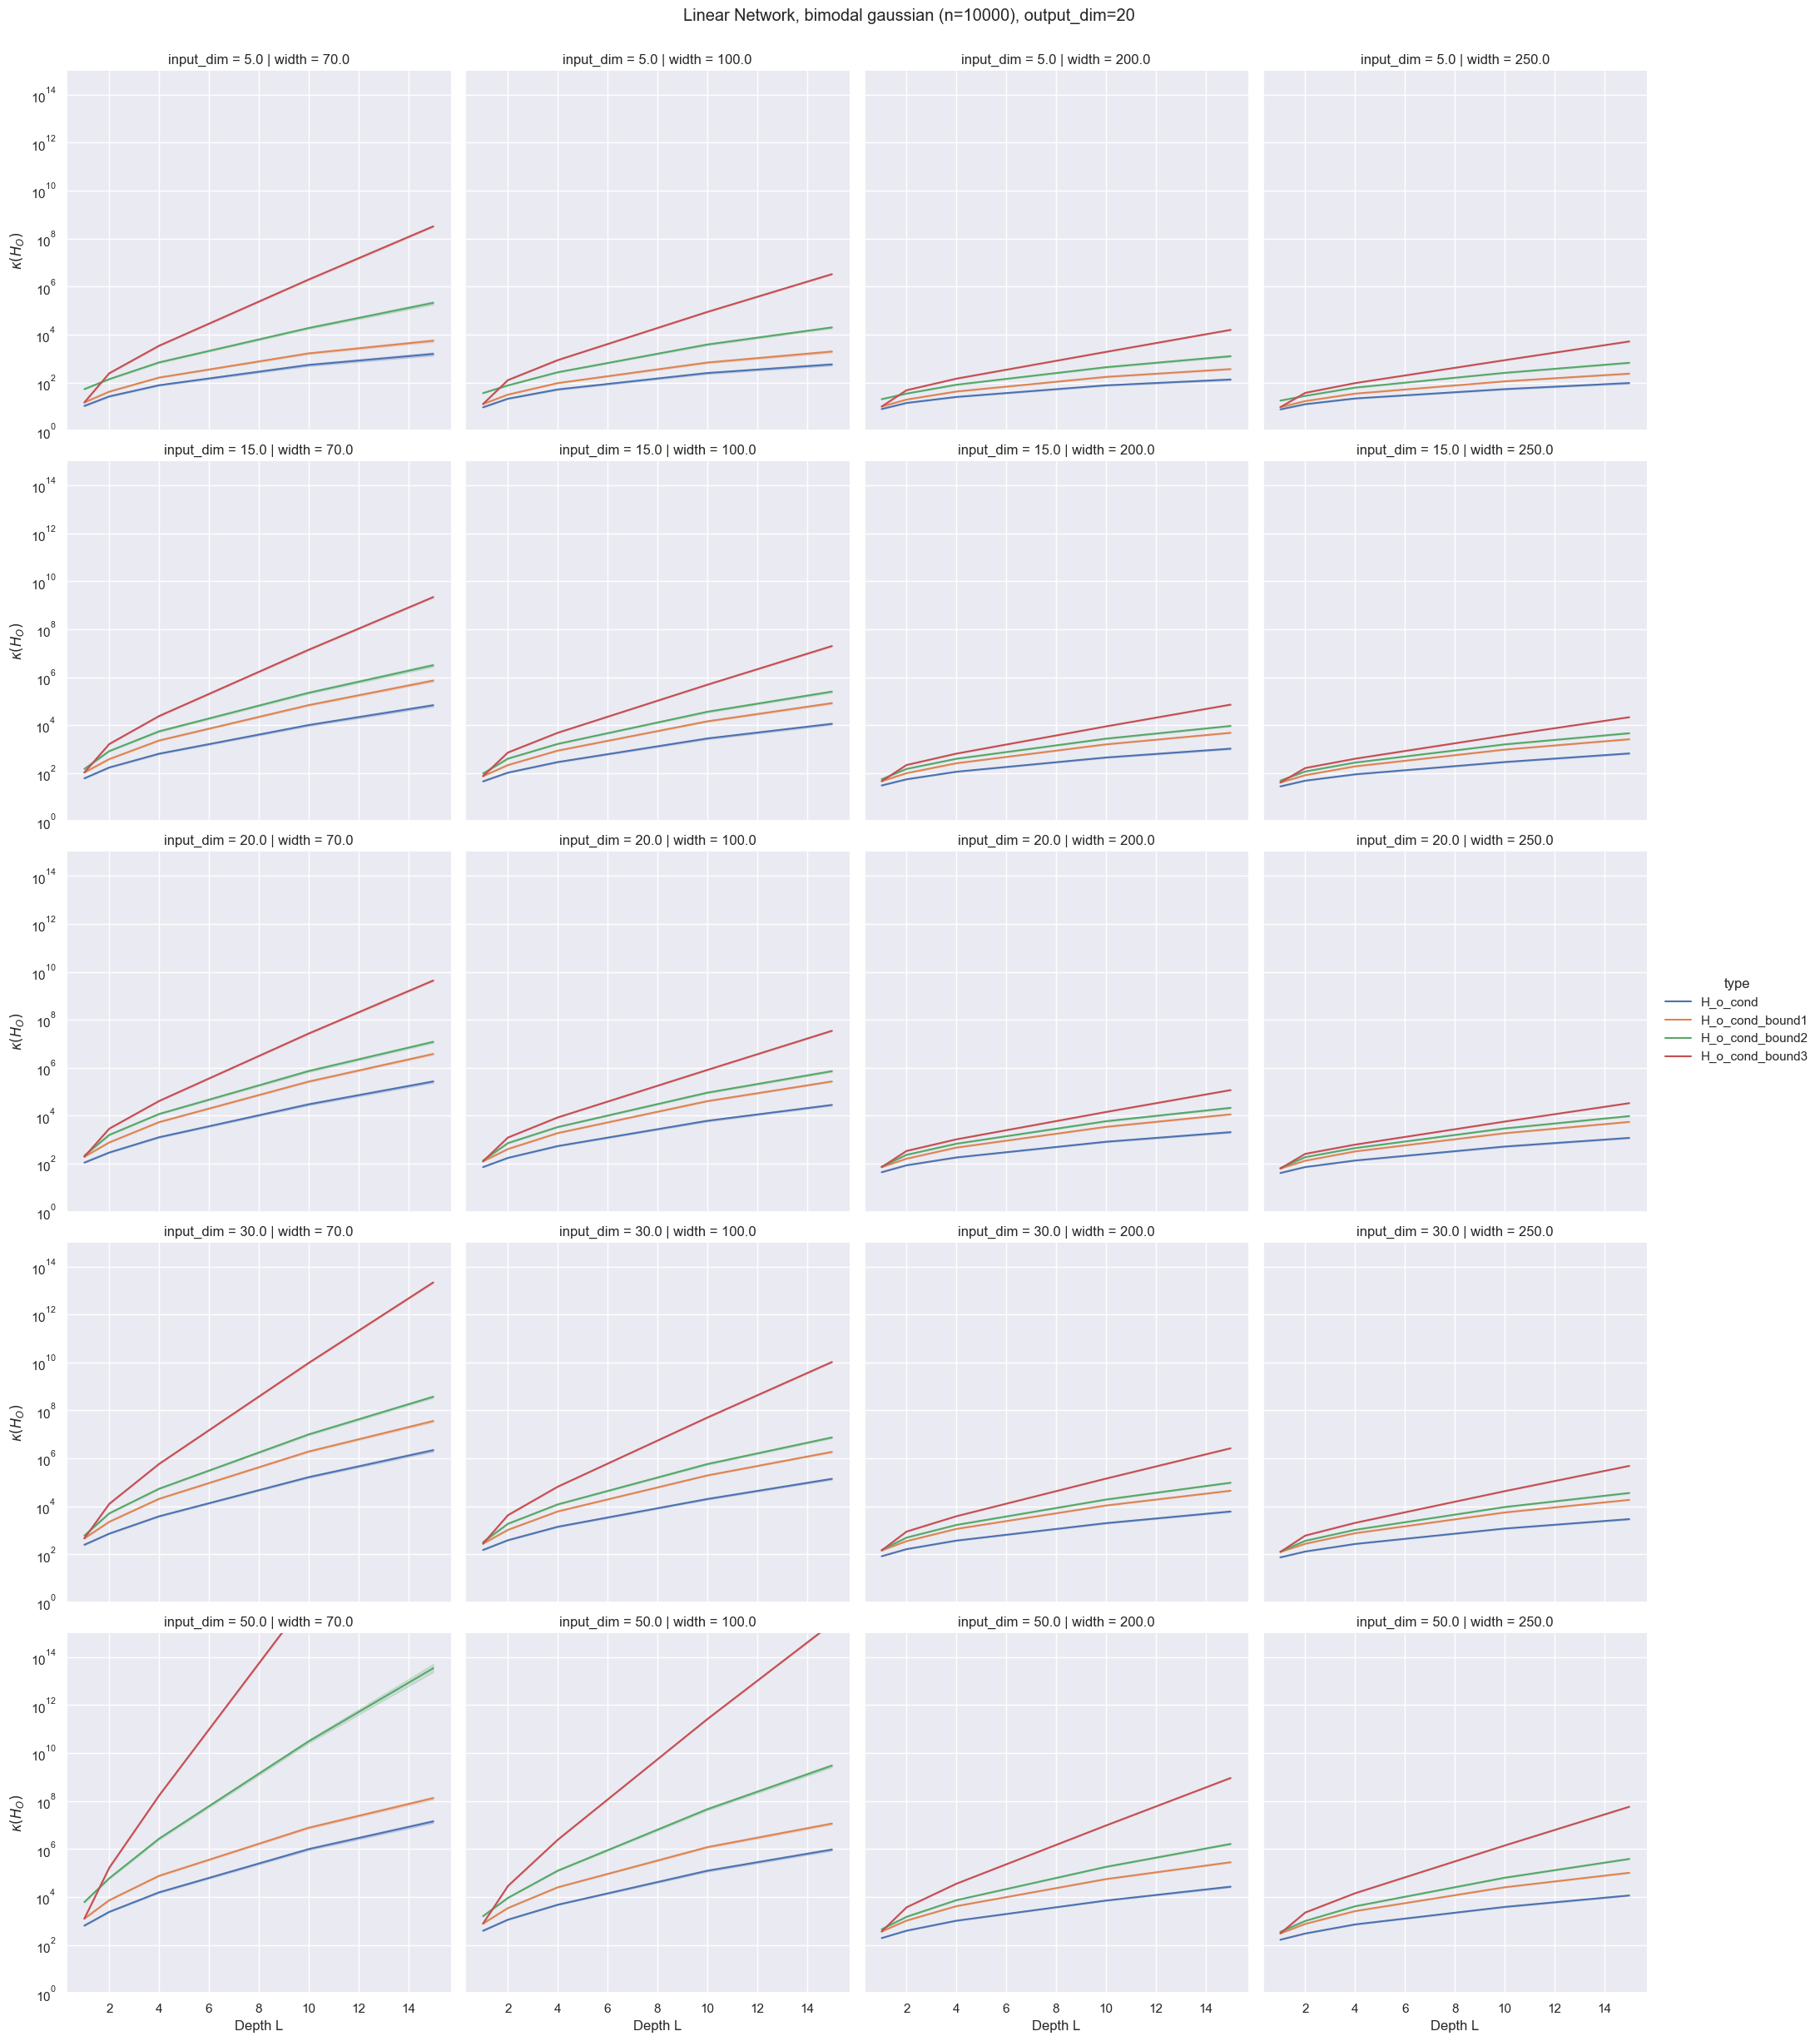

In [71]:
g = sns.relplot(data=df_gaussian_lin_2, x="depth", y="value", hue="type", col="width", row='input_dim', kind='line')
g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
g.set(ylim=[1,10e14])
g.fig.suptitle(r'Linear Network, bimodal gaussian (n=10000), output_dim=20')
g.fig.subplots_adjust(top=0.95)
g.savefig('LinearNetwork_bimodal_gaussian_k(H_O)_bounds_2.pdf')

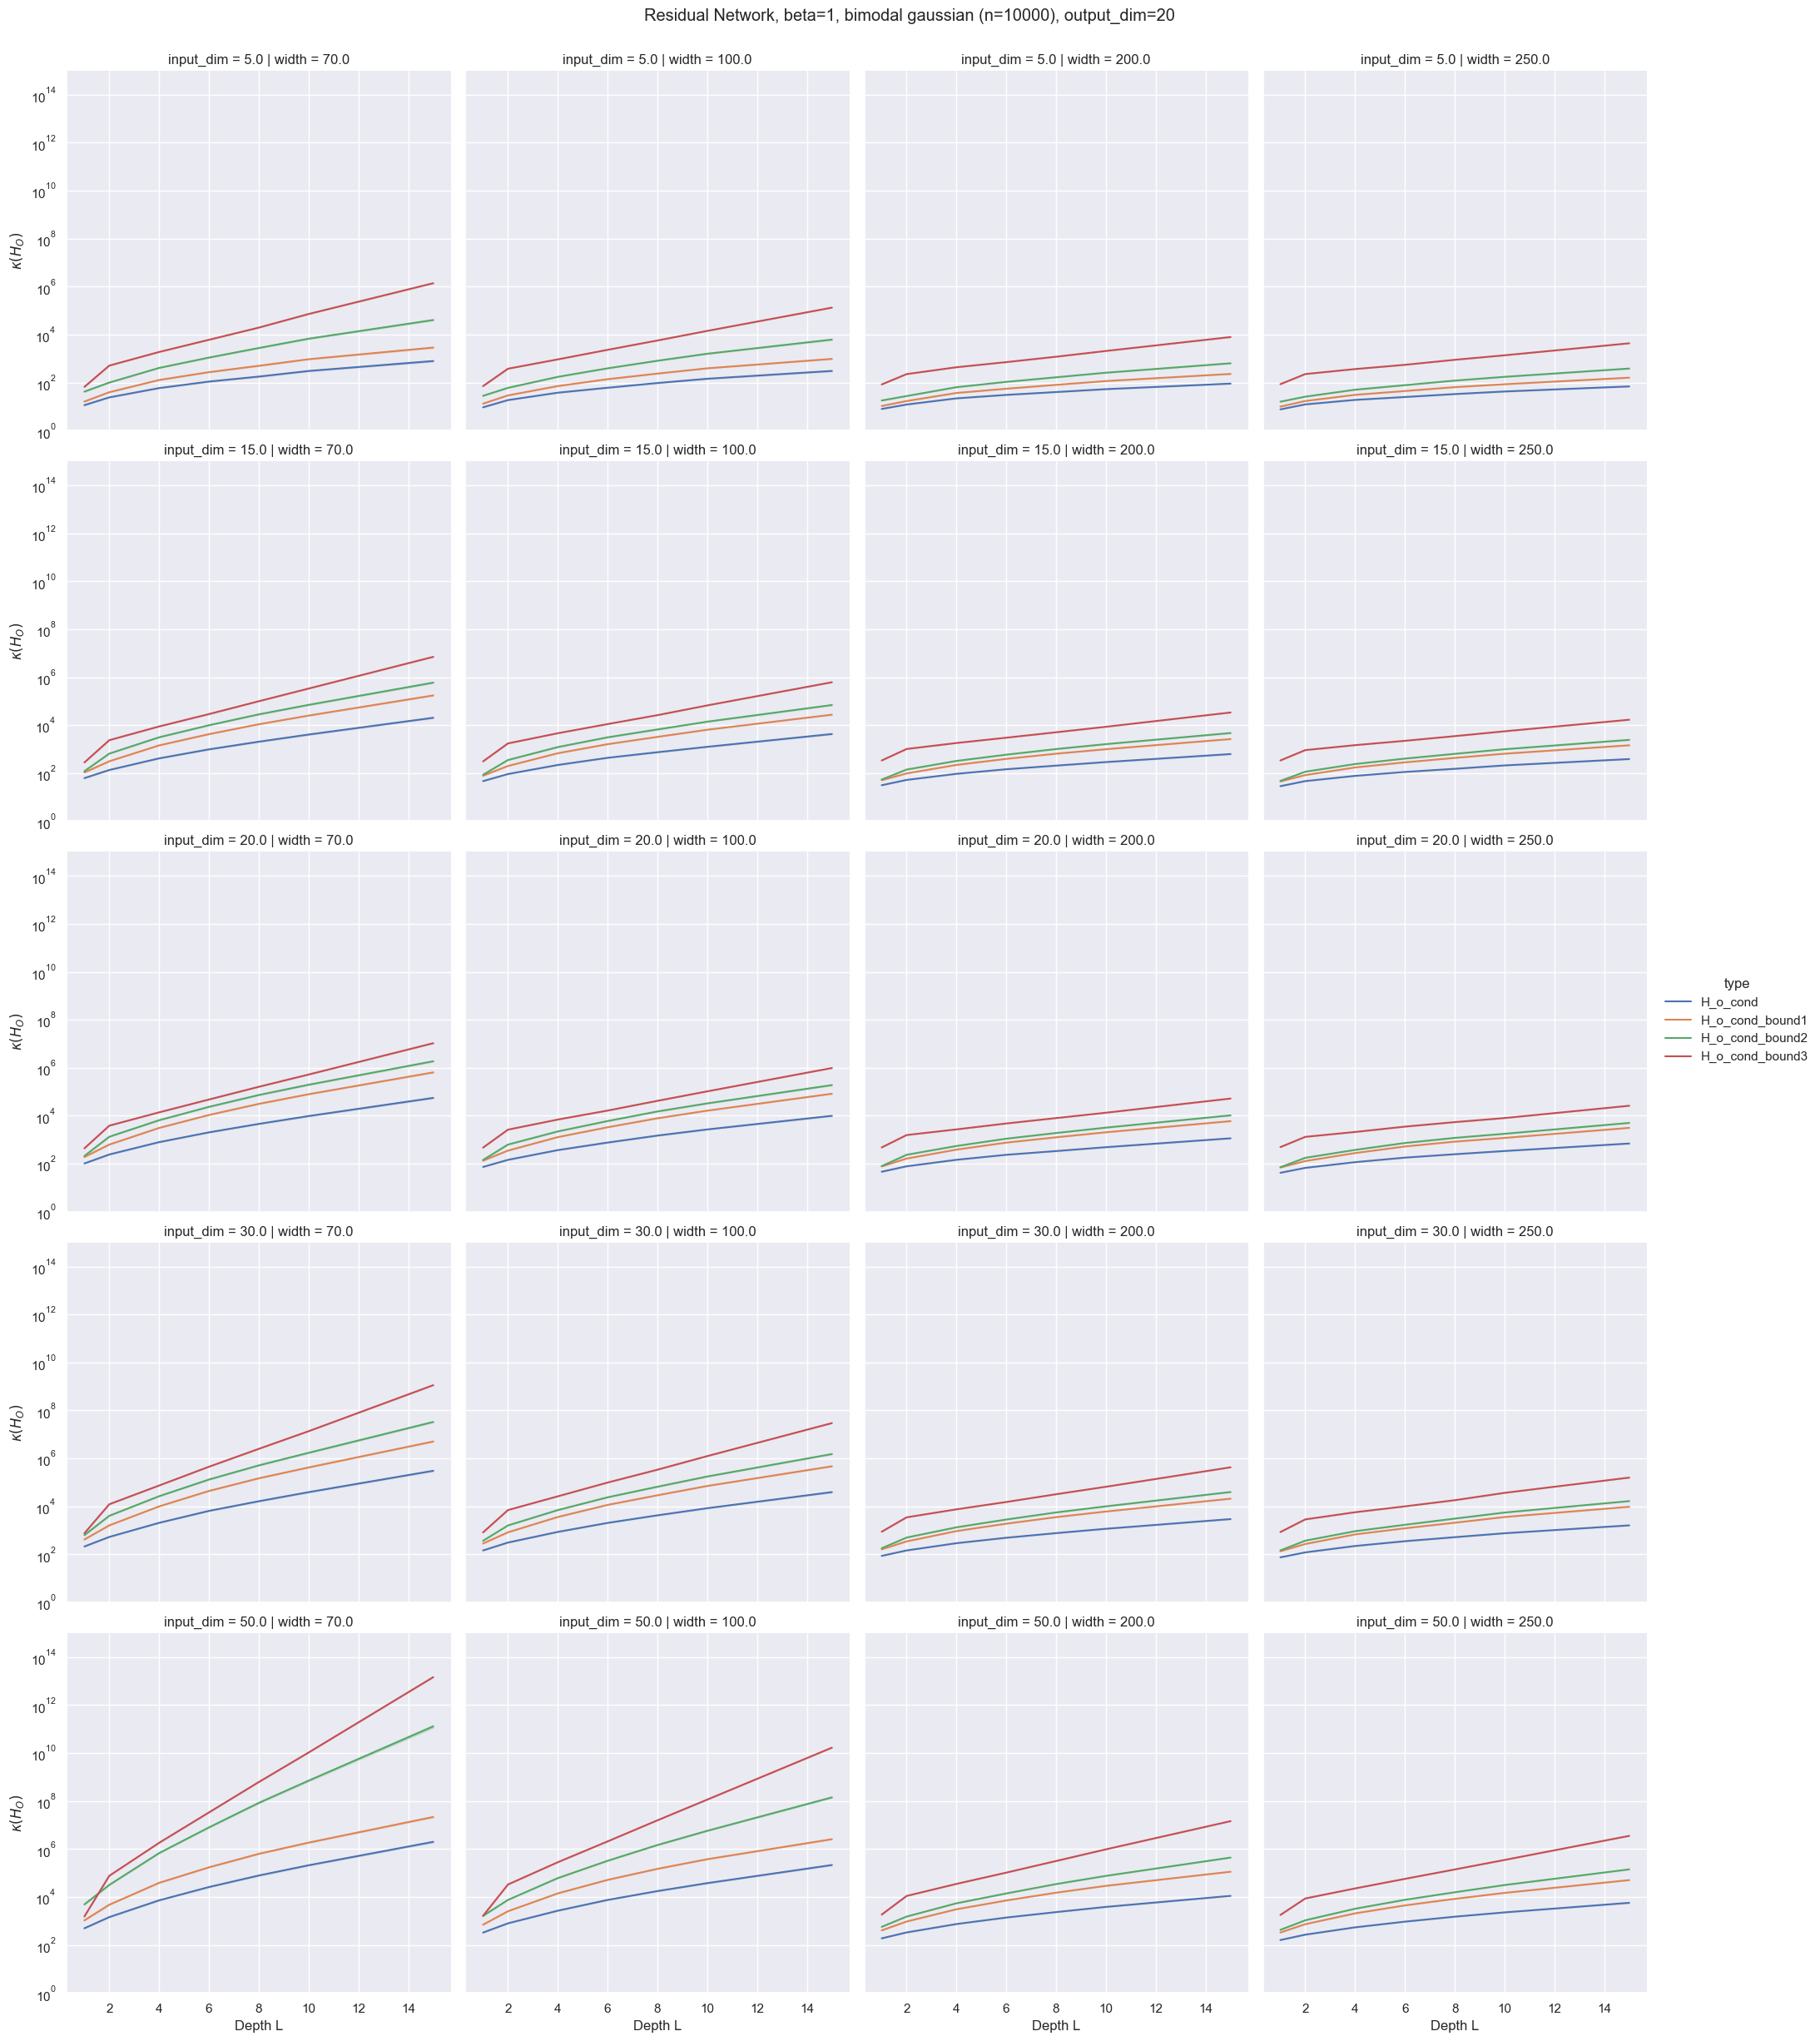

In [72]:
df_gaussian_resnet_2 = df_gaussian_resnet[df_gaussian_resnet['input_dim'] < 60]
df_gaussian_resnet_2 = df_gaussian_resnet_2[df_gaussian_resnet_2['width'] > 30]


g = sns.relplot(data=df_gaussian_resnet_2, x="depth", y="value", hue="type", col="width", row='input_dim', kind='line')
g.set(yscale='log')
g.set_axis_labels('Depth L','$\kappa(H_O)$')
g.set(ylim=[1,10e14])
g.fig.suptitle(r'Residual Network, beta=1, bimodal gaussian (n=10000), output_dim=20')
g.fig.subplots_adjust(top=0.95)
g.savefig('ResNetwork_bimodal_gaussian_k(H_O)_bounds.pdf')

Text(0.5, 0, 'width')

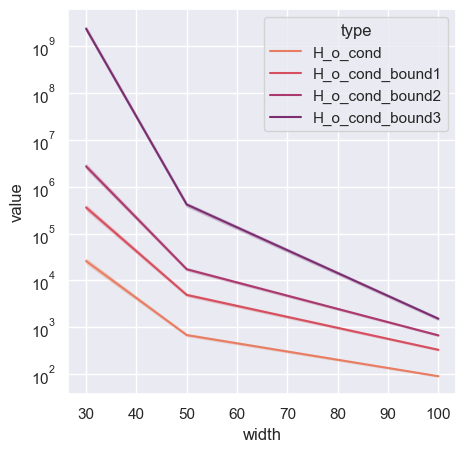

In [146]:
plt.figure(figsize=(5,5))
    
sns.set_theme()

g = sns.lineplot(data=df, x='width', y= 'value', 
                 markers=True,
                 hue='type',
                 palette='flare',
                )
g.set(yscale='log')

plt.xlabel('width')